# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ganang Setyo Hadi
- **Email:** ganangsetyohadi@gmail.com
- **ID Dicoding:** MC322D5Y2301

## Menentukan Pertanyaan Bisnis

### **🚲 Pertanyaan Bisnis Utama untuk Analisis Bike Sharing**

#### 1️⃣ **Bagaimana faktor waktu dan musim mempengaruhi permintaan rental sepeda?**
Analisis ini akan membantu mengoptimalkan distribusi armada dan meningkatkan ketersediaan sepeda saat dibutuhkan.

#### 2️⃣ **Apa perbedaan pola penggunaan antara pengguna kasual dan terdaftar berdasarkan kondisi cuaca?**
Pemahaman ini akan membantu mengembangkan strategi untuk mengubah pengguna sesekali menjadi pelanggan tetap.

*Kedua pertanyaan ini akan menghasilkan insight yang dapat ditindaklanjuti untuk meningkatkan efisiensi operasional dan pertumbuhan bisnis.*

## Import Semua Packages/Library yang Digunakan

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.colors import LinearSegmentedColormap

# Konfigurasi visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette('viridis')

## Data Wrangling

### Gathering Data

In [4]:
def load_csv_files(folder='data'):
    """
    Memuat semua file CSV dalam folder yang diberikan.
    Setiap file akan disimpan dalam variabel DataFrame dengan nama yang sesuai.
    Memberikan log dengan emoji untuk status pemuatan.
    """
    if not os.path.exists(folder):
        print("❌ Folder tidak ditemukan!")
        return
    
    files = [f for f in os.listdir(folder) if f.endswith('.csv')]
    
    if not files:
        print("⚠️ Tidak ada file CSV yang ditemukan di folder!")
        return
    
    print(f"📂 Menemukan {len(files)} file CSV. Memulai proses impor...\n")
    
    for file in files:
        file_path = os.path.join(folder, file)
        var_name = f"df_{os.path.splitext(file)[0]}"
        try:
            globals()[var_name] = pd.read_csv(file_path)
            df = globals()[var_name]
            print(f"✅ {file} berhasil dimuat sebagai {var_name}! ({df.shape[0]} baris, {df.shape[1]} kolom)")
        except Exception as e:
            print(f"❌ Gagal memuat {file}: {e}")
    
    print("\n🚀 Semua file telah diproses!")

load_csv_files()

📂 Menemukan 2 file CSV. Memulai proses impor...

✅ day.csv berhasil dimuat sebagai df_day! (731 baris, 16 kolom)
✅ hour.csv berhasil dimuat sebagai df_hour! (17379 baris, 17 kolom)

🚀 Semua file telah diproses!


#### 📊 **Insight dari Proses Gathering Data**  

1. **Proses Berjalan dengan Baik ✅**  
   - Sistem berhasil menemukan dan mengimpor **2 file CSV** (`day.csv` dan `hour.csv`).  
   - Masing-masing file disimpan dalam variabel **df_day** dan **df_hour** sesuai dengan namanya.  

2. **Detail Data yang Diimpor 📂**  
   - **`day.csv`** → **731 baris**, **16 kolom**  
   - **`hour.csv`** → **17,379 baris**, **17 kolom**  

3. **Struktur Logging yang Jelas 📝**  
   - Menggunakan emoji untuk meningkatkan keterbacaan log.  
   - Memberikan informasi jumlah baris dan kolom setelah data berhasil dimuat.  

### Assessing Data

In [5]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- ✅ **Tidak ada missing value**, bagus. Nilai numerik juga disimpan dengan **sesuai** (sebagai `float64`).

- **Kategorikal value juga disimpan sebagai `int64`**, yang mana benar karena mereka **di-encoded**. **Jumlah row juga sesuai** dengan deskripsi dataset, **good🎯**. Namun, beberapa variabel (**season, weathersit, etc**) akan lebih **helpful** jika dikembalikan menjadi nilai **kategori aslinya** jika ingin membuat visualisasi yang lebih **human-readable**. 📊✨ 

- **Beberapa hal yang mungkin menjadi masalah adalah `dteday` yang disimpan sebagai `object` daripada `datetime`.** Memang tidak akan **"error"**, tetapi merubah nilai ini menjadi `datetime`📅 akan membuat analisis yang time-based jadi **lebih mudah**.

- **🌡️ Nilai temperature juga dapat di denormalisasi** untuk interpretasi yang lebih baik pada analisis selanjutnya.

In [7]:
print("Jumlah duplikasi: ", df_day.duplicated().sum())
print("Jumlah duplikasi: ", df_hour.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


- Good, tidak ada yang duplikat 🔥

In [8]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


- Berdasarkan hasil `describe()` dari kedua dataset, terlihat bahwa data sangat sesuai dengan deskripsi yang diberikan dalam dokumentasi. Dimana rentang nilai untuk setiap variabel/kolom sesuai dengan yang dijelaskan di dokumentasi.
- Disini juga terlihat beberapa informasi seperti:
    1. Komuter `registered` mendominasi
    2. Kondisi cuaca cenderung sedang. Nilai rata - rata `weathersit` 1,4 menunjukkan bahwa sebagian besar hari mengalami kondisi cerah hingga berawan sebagian, dengan lebih sedikit kejadian cuaca ekstrim.
    3. Nilai kecepatan angin berkisar dari 0,0 hingga 0,5, dengan sebagian besar nilai di ujung skala yang lebih rendah, menunjukkan kondisi angin yang umumnya tenang.

Sekarang ayo cek outlier

In [10]:
def detect_outliers_iqr(df, column):
    """
    Mendeteksi outlier menggunakan metode IQR (Interquartile Range)
    
    Args:
        df: DataFrame
        column: Nama kolom yang akan dianalisis
        
    Returns:
        Tuple dari (lower_bound, upper_bound, outliers_df)
    """
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return lower_bound, upper_bound, outliers

In [11]:
def visualize_boxplot(df, column, title=None):
    """
    Membuat visualisasi boxplot untuk menampilkan outlier
    
    Args:
        df: DataFrame
        column: Nama kolom yang akan divisualisasikan
        title: Judul plot (opsional)
    """
    plt.figure(figsize=(10, 6))
    
    sns.boxplot(x=df[column], palette='Set2')
    
    if title:
        plt.title(title, fontsize=14, fontweight='bold')
    else:
        plt.title(f'Boxplot untuk {column}', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()


In [12]:
def visualize_distribution_with_outliers(df, column, lower_bound, upper_bound):
    """
    Membuat visualisasi distribusi data dengan outlier yang disorot
    
    Args:
        df: DataFrame
        column: Nama kolom yang akan divisualisasikan
        lower_bound: Batas bawah untuk outlier
        upper_bound: Batas atas untuk outlier
    """
    plt.figure(figsize=(12, 6))
    
    sns.histplot(df[column], kde=True, color='skyblue', alpha=0.7, label='Semua Data')
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    if not outliers.empty:
        sns.histplot(outliers, color='red', kde=True, alpha=0.5, label='Outlier')
    
    plt.axvline(x=lower_bound, color='red', linestyle='--', label=f'Batas Bawah: {lower_bound:.2f}')
    plt.axvline(x=upper_bound, color='red', linestyle='--', label=f'Batas Atas: {upper_bound:.2f}')
    
    plt.title(f'Distribusi dan Outlier untuk {column}', fontsize=14, fontweight='bold')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [13]:
def visualize_outlier_context(df, column, context_column, lower_bound, upper_bound):
    """
    Visualisasi scatter plot outlier dalam konteks variabel lain
    
    Args:
        df: DataFrame
        column: Nama kolom yang dianalisis untuk outlier
        context_column: Kolom konteks untuk perbandingan
        lower_bound: Batas bawah outlier
        upper_bound: Batas atas outlier
    """
    plt.figure(figsize=(10, 6))
    
    normal = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  
    plt.scatter(normal[context_column], normal[column], alpha=0.5, color='blue', label='Normal')
    
    plt.scatter(outliers[context_column], outliers[column], alpha=0.7, color='red', label='Outlier')
    
    plt.axhline(y=lower_bound, color='red', linestyle='--')
    plt.axhline(y=upper_bound, color='red', linestyle='--')
    
    plt.title(f'Outlier {column} vs {context_column}', fontsize=14, fontweight='bold')
    plt.xlabel(context_column)
    plt.ylabel(column)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [14]:
def analyze_outliers(df, columns_to_check, title_prefix=""):
    """
    Menganalisis outlier untuk beberapa kolom
    
    Args:
        df: DataFrame
        columns_to_check: List kolom yang akan dianalisis
        title_prefix: Awalan judul untuk plot
    """
    result_summary = []
    
    for column in columns_to_check:
        lower_bound, upper_bound, outliers = detect_outliers_iqr(df, column)
        
        outlier_percentage = (len(outliers) / len(df)) * 100
        
        result = {
            'Kolom': column,
            'Batas Bawah': lower_bound,
            'Batas Atas': upper_bound,
            'Jumlah Outlier': len(outliers),
            'Persentase': outlier_percentage
        }
        result_summary.append(result)
        
        visualize_boxplot(df, column, title=f'{title_prefix} Boxplot {column}')
        visualize_distribution_with_outliers(df, column, lower_bound, upper_bound)
        
        if len(outliers) > 0:
            print(f"\n{title_prefix} Outlier pada kolom {column}:")
            print(f"Batas bawah: {lower_bound:.2f}, Batas atas: {upper_bound:.2f}")
            print(f"Jumlah outlier: {len(outliers)} ({outlier_percentage:.2f}%)")
            
            print("\nSampel outlier:")
            print(outliers.sample(min(5, len(outliers))).sort_values(by=column, ascending=False))
            
            if 'season' in df.columns:
                season_counts = outliers['season'].value_counts()
                print("\nDistribusi outlier berdasarkan musim:")
                season_map = {1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'}
                for season, count in season_counts.items():
                    print(f"{season_map.get(season, season)}: {count} outlier ({count/len(outliers)*100:.2f}%)")
                
                visualize_outlier_context(df, column, 'season', lower_bound, upper_bound)
            
            print("-" * 80)
    
    summary_df = pd.DataFrame(result_summary)
    summary_df = summary_df.set_index('Kolom')
    print("\nRingkasan Hasil Deteksi Outlier:")
    print(summary_df)
    
    return summary_df


ANALISIS OUTLIER PADA DATASET HARIAN


/tmp/ipykernel_63014/3794431285.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='Set2')


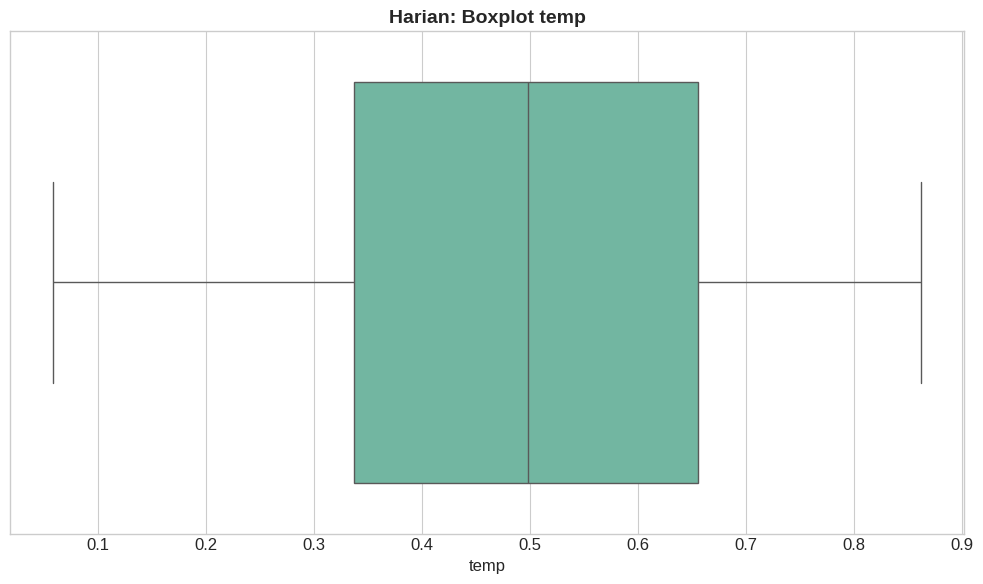

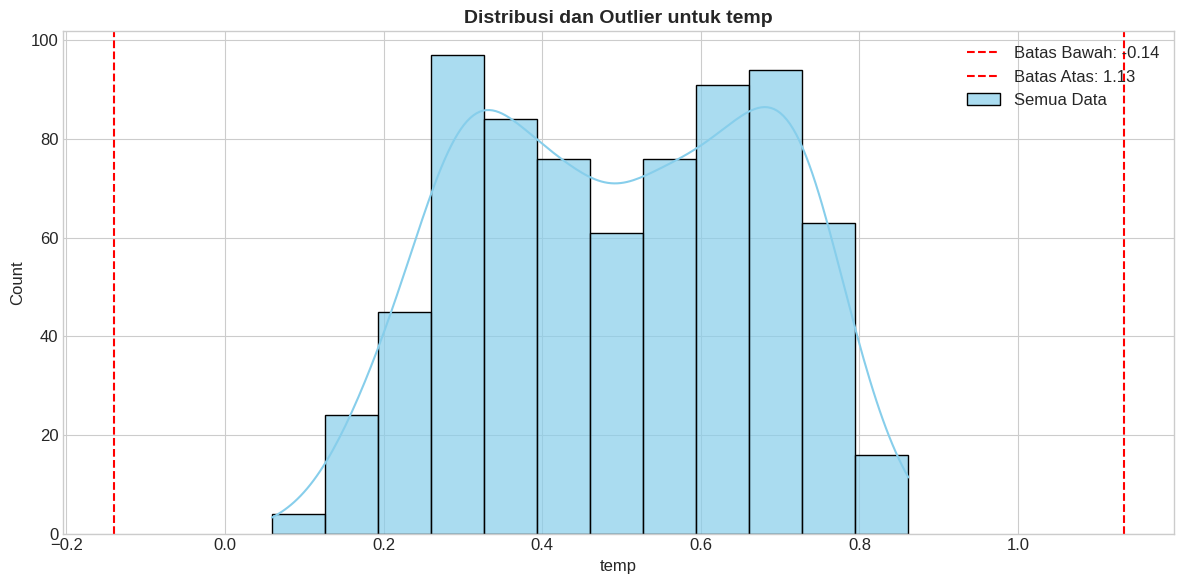

/tmp/ipykernel_63014/3794431285.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='Set2')


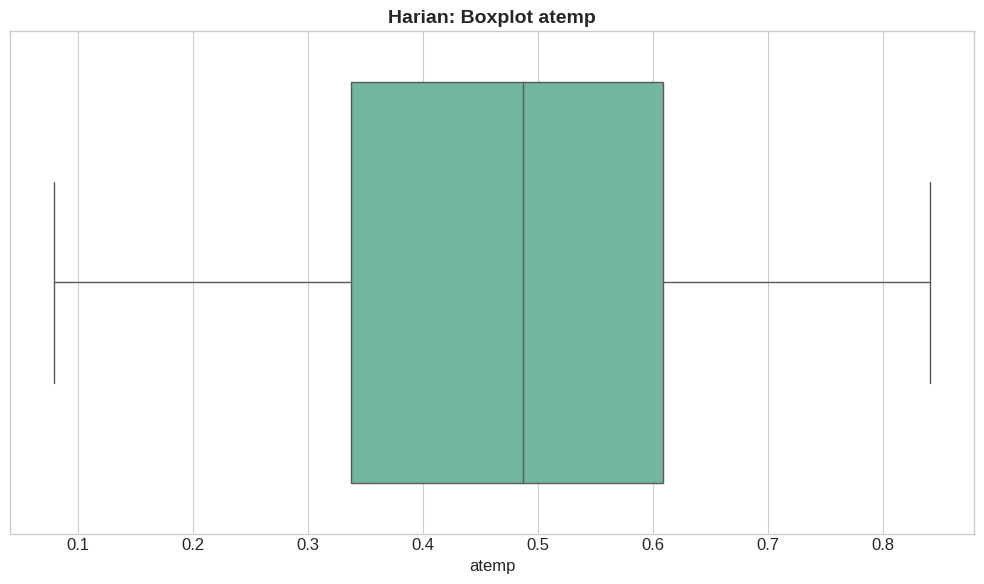

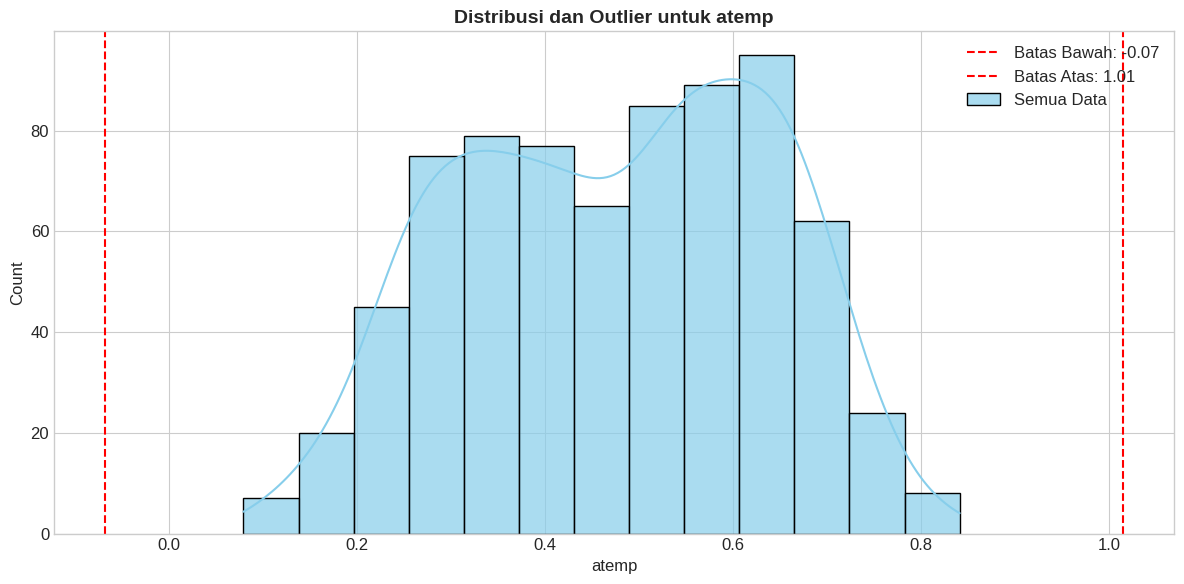

/tmp/ipykernel_63014/3794431285.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='Set2')


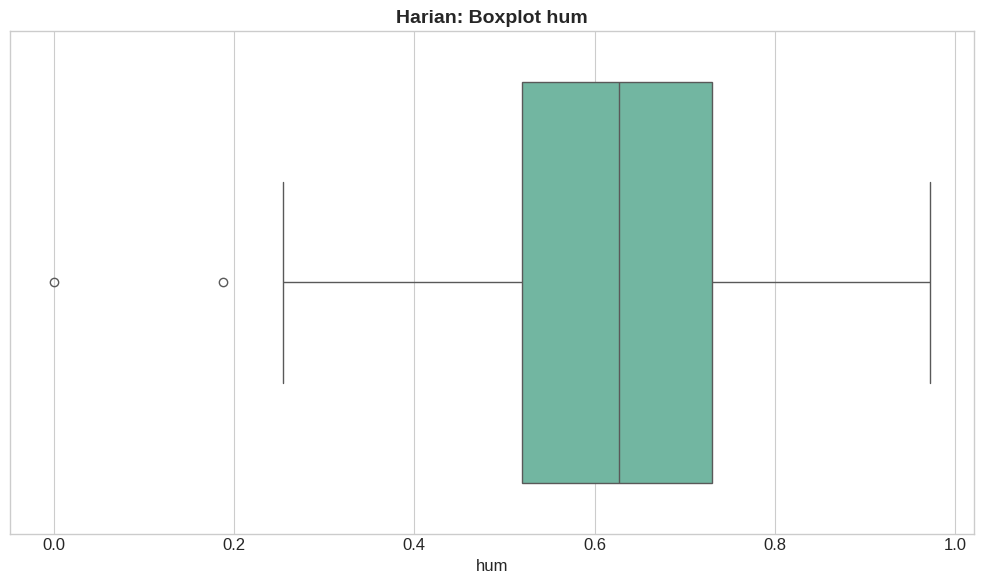

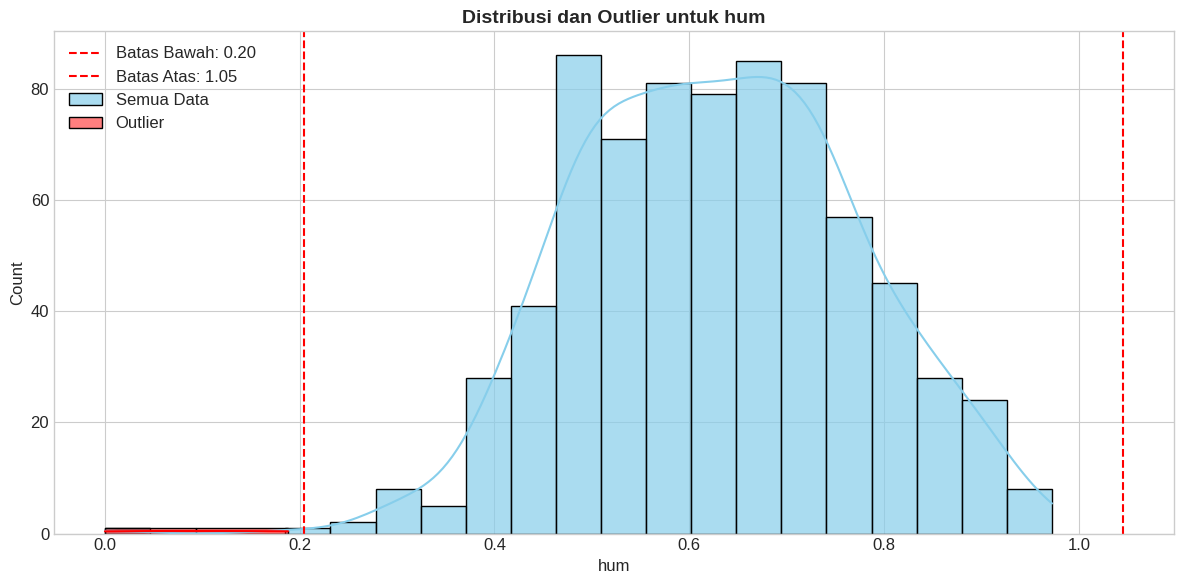


Harian: Outlier pada kolom hum:
Batas bawah: 0.20, Batas atas: 1.05
Jumlah outlier: 2 (0.27%)

Sampel outlier:
    instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
49       50  2011-02-19       1   0     2        0        6           0   
68       69  2011-03-10       1   0     3        0        4           1   

    weathersit      temp     atemp       hum  windspeed  casual  registered  \
49           1  0.399167  0.391404  0.187917   0.507463     532        1103   
68           3  0.389091  0.385668  0.000000   0.261877      46         577   

     cnt  
49  1635  
68   623  

Distribusi outlier berdasarkan musim:
Musim Semi: 2 outlier (100.00%)


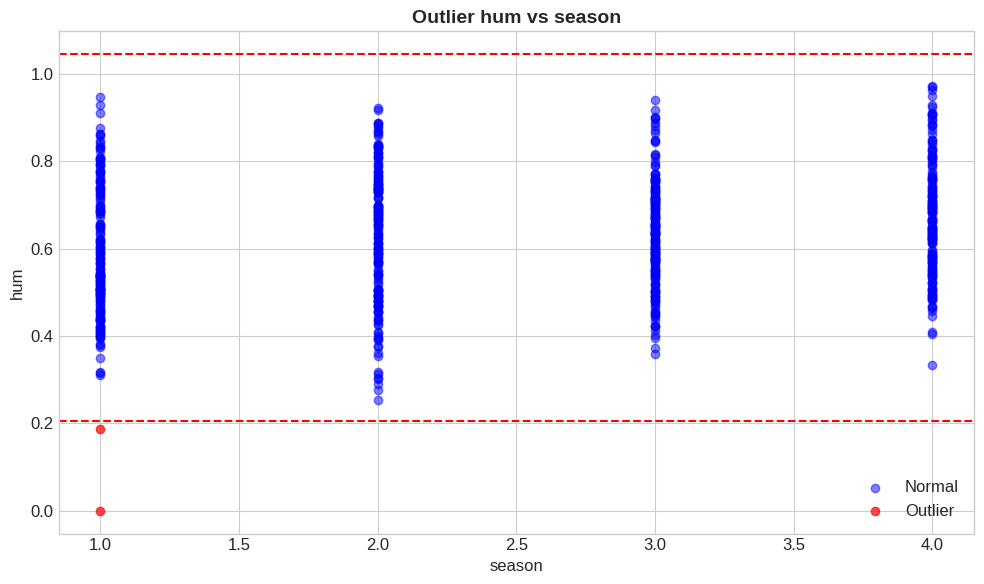

--------------------------------------------------------------------------------


/tmp/ipykernel_63014/3794431285.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='Set2')


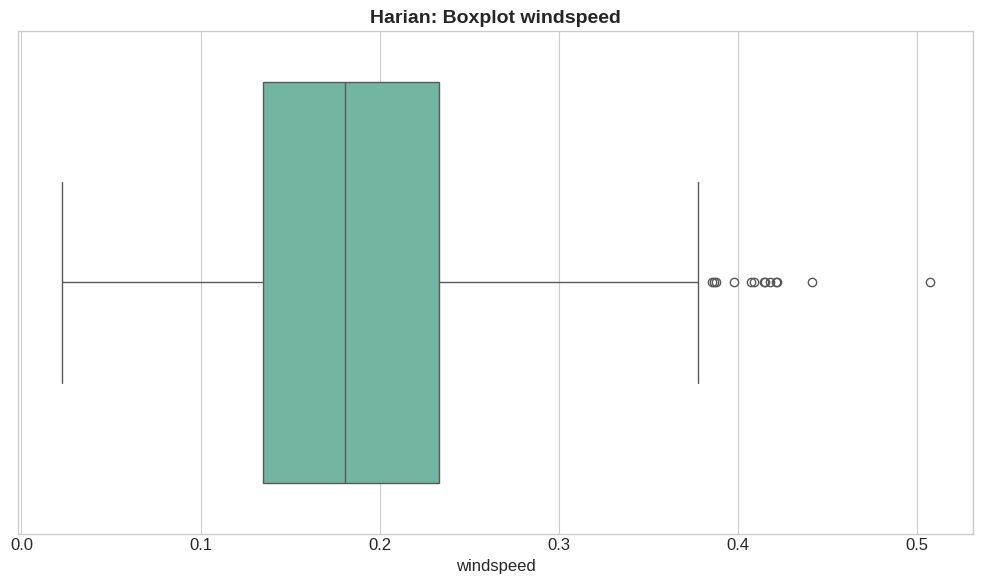

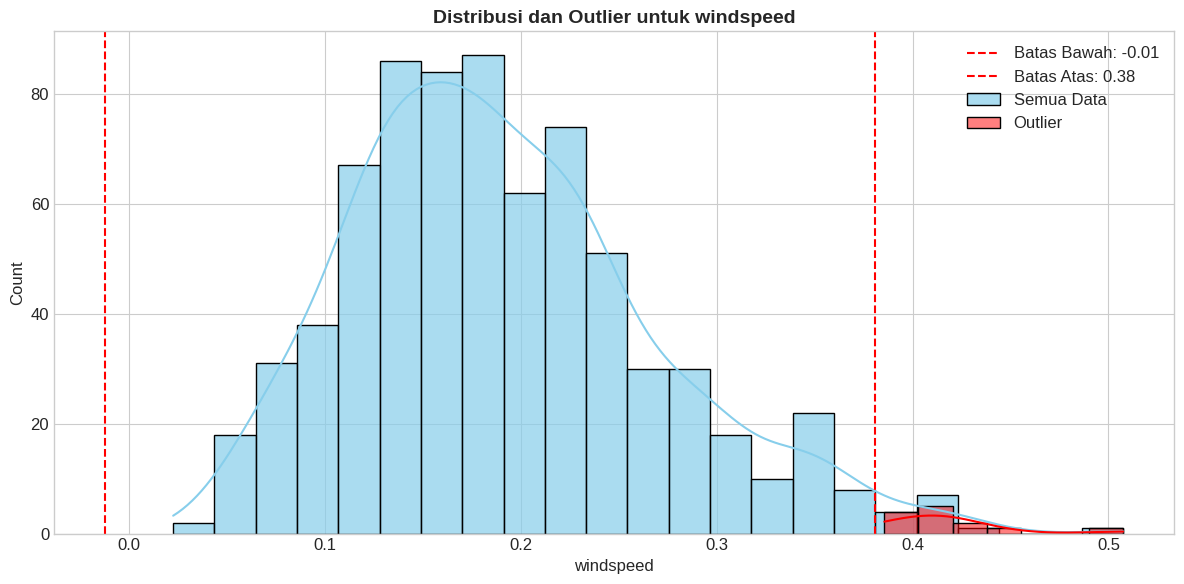


Harian: Outlier pada kolom windspeed:
Batas bawah: -0.01, Batas atas: 0.38
Jumlah outlier: 13 (1.78%)

Sampel outlier:
     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
49        50  2011-02-19       1   0     2        0        6           0   
432      433  2012-03-08       1   1     3        0        4           1   
292      293  2011-10-20       4   0    10        0        4           1   
94        95  2011-04-05       2   0     4        0        2           1   
450      451  2012-03-26       2   1     3        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
49            1  0.399167  0.391404  0.187917   0.507463     532        1103   
432           1  0.527500  0.524604  0.567500   0.441563     486        4896   
292           1  0.475833  0.466525  0.636250   0.422275     471        3724   
94            2  0.414167  0.398350  0.642083   0.388067     167        1628   
450           1  0.4458

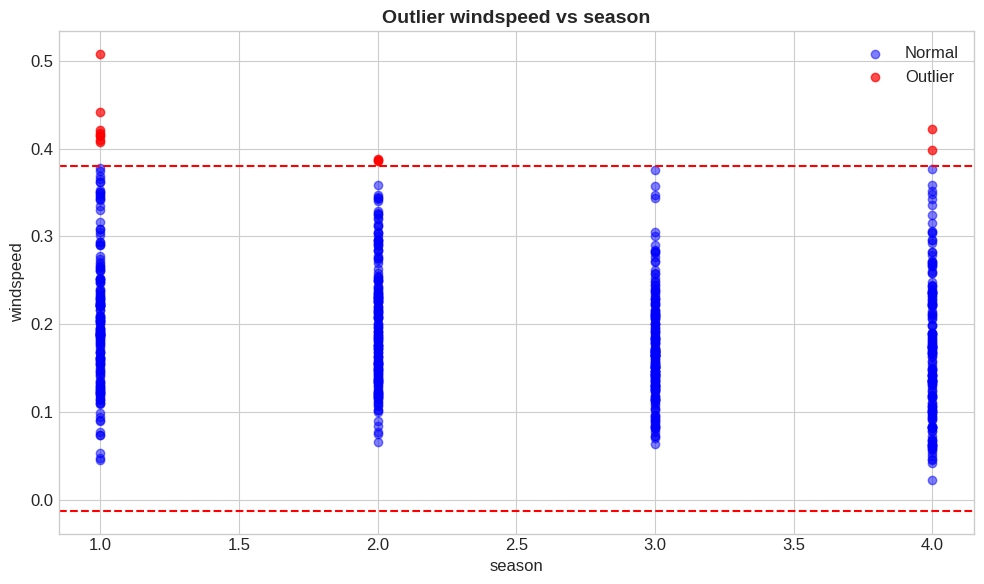

--------------------------------------------------------------------------------


/tmp/ipykernel_63014/3794431285.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='Set2')


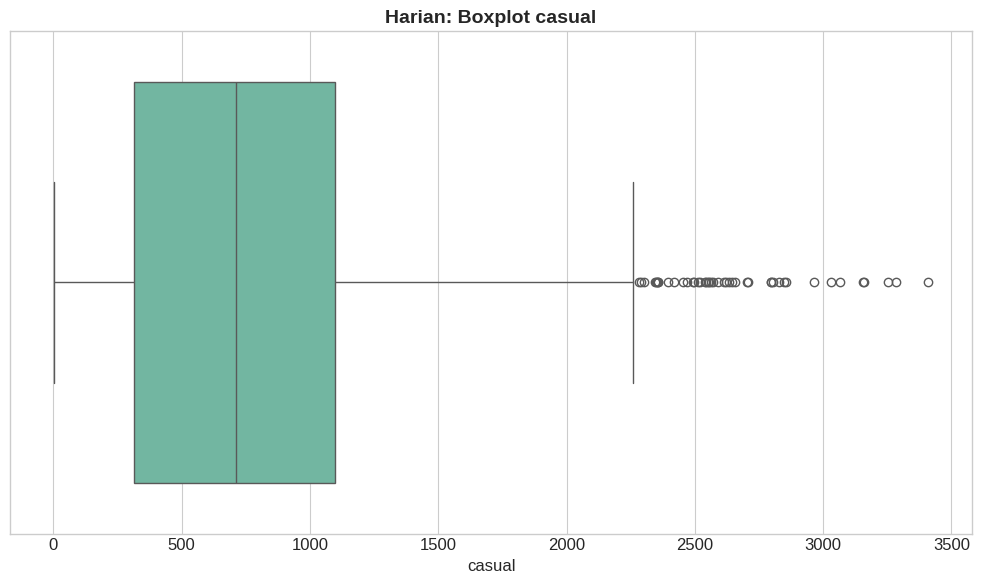

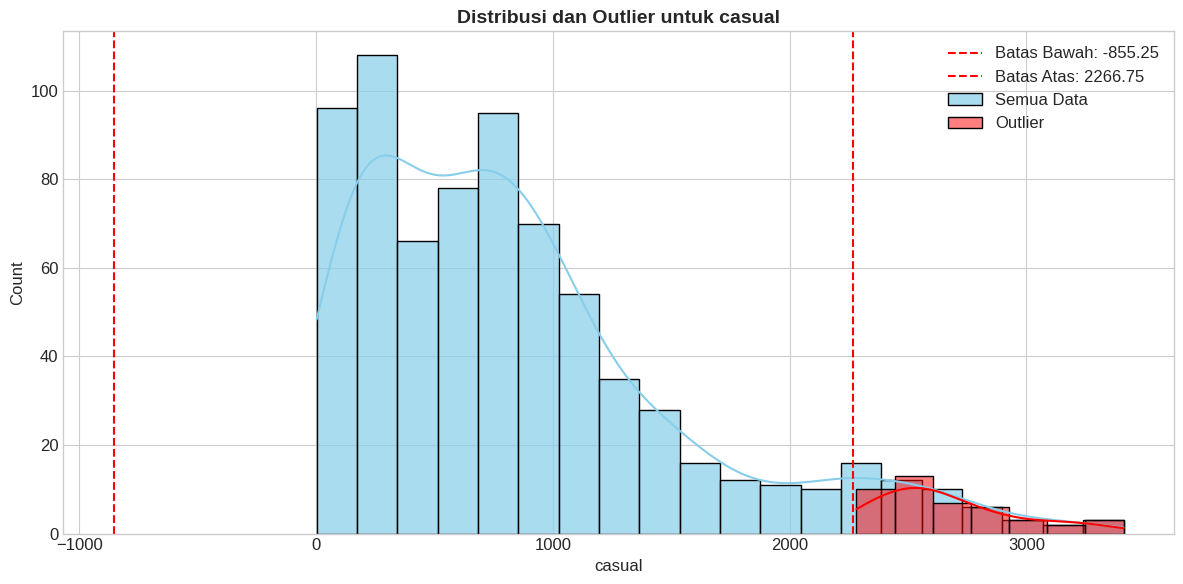


Harian: Outlier pada kolom casual:
Batas bawah: -855.25, Batas atas: 2266.75
Jumlah outlier: 44 (6.02%)

Sampel outlier:
     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
504      505  2012-05-19       2   1     5        0        6           0   
532      533  2012-06-16       2   1     6        0        6           0   
595      596  2012-08-18       3   1     8        0        6           0   
497      498  2012-05-12       2   1     5        0        6           0   
183      184  2011-07-03       3   0     7        0        0           0   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
504           1  0.600000  0.566908  0.456250   0.083975    3410        4884   
532           1  0.631667  0.594708  0.504167   0.166667    2963        4739   
595           1  0.678333  0.618071  0.603333   0.177867    2827        5038   
497           1  0.564167  0.544817  0.480417   0.123133    2622        4807   
183           2  0.71

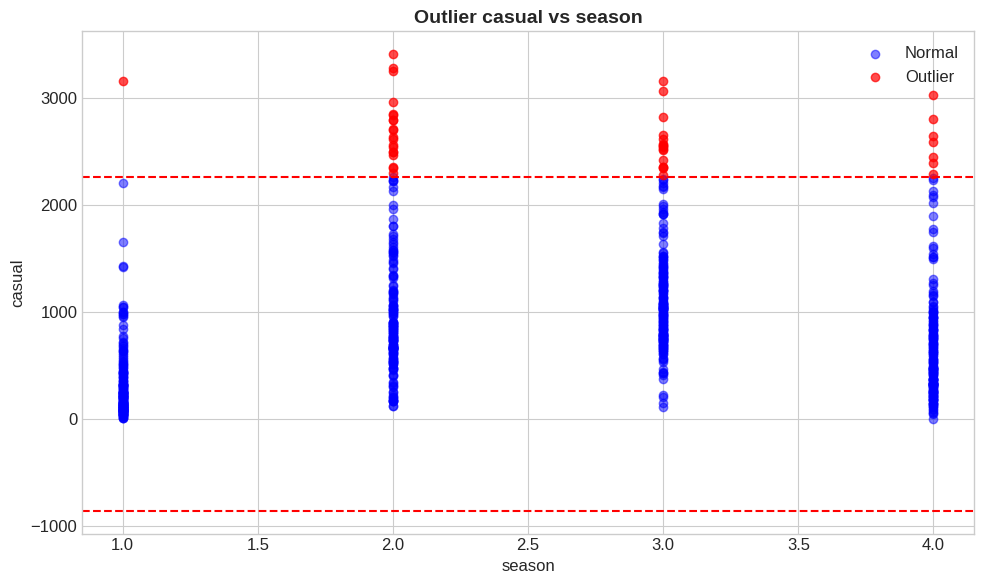

--------------------------------------------------------------------------------


/tmp/ipykernel_63014/3794431285.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='Set2')


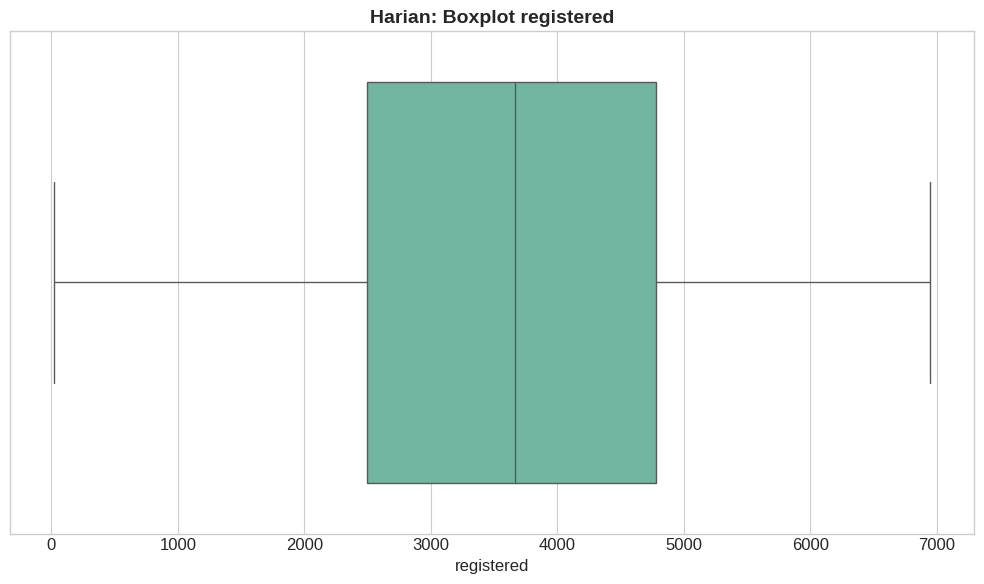

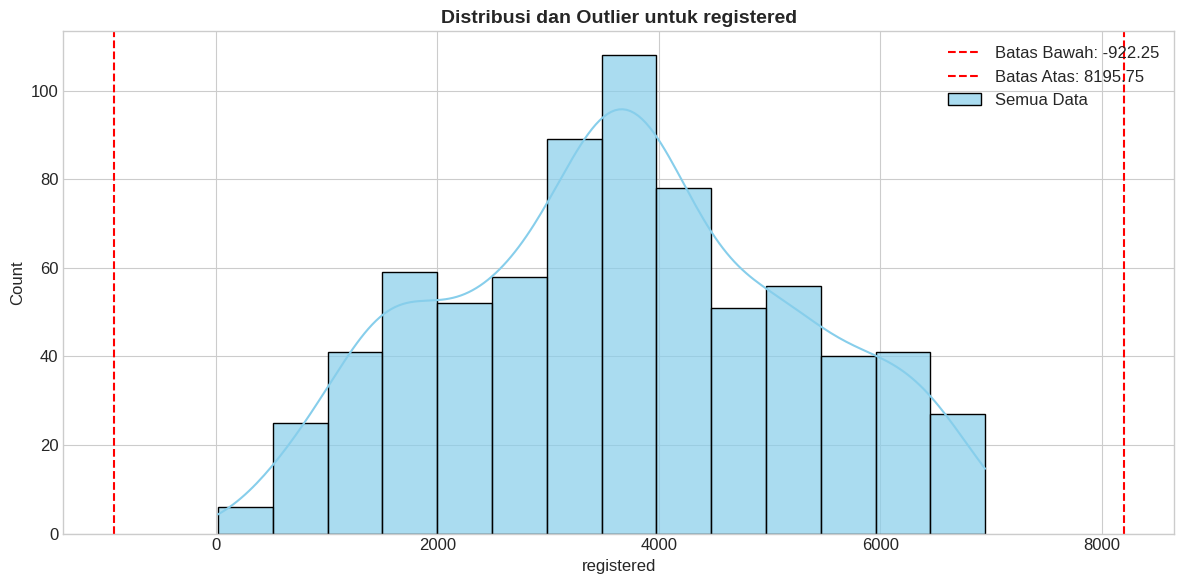

/tmp/ipykernel_63014/3794431285.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='Set2')


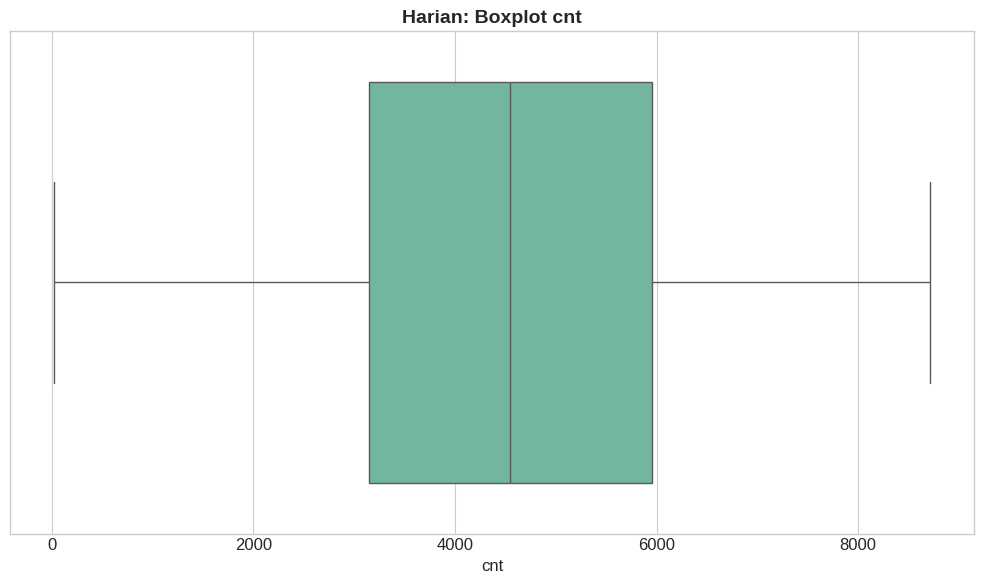

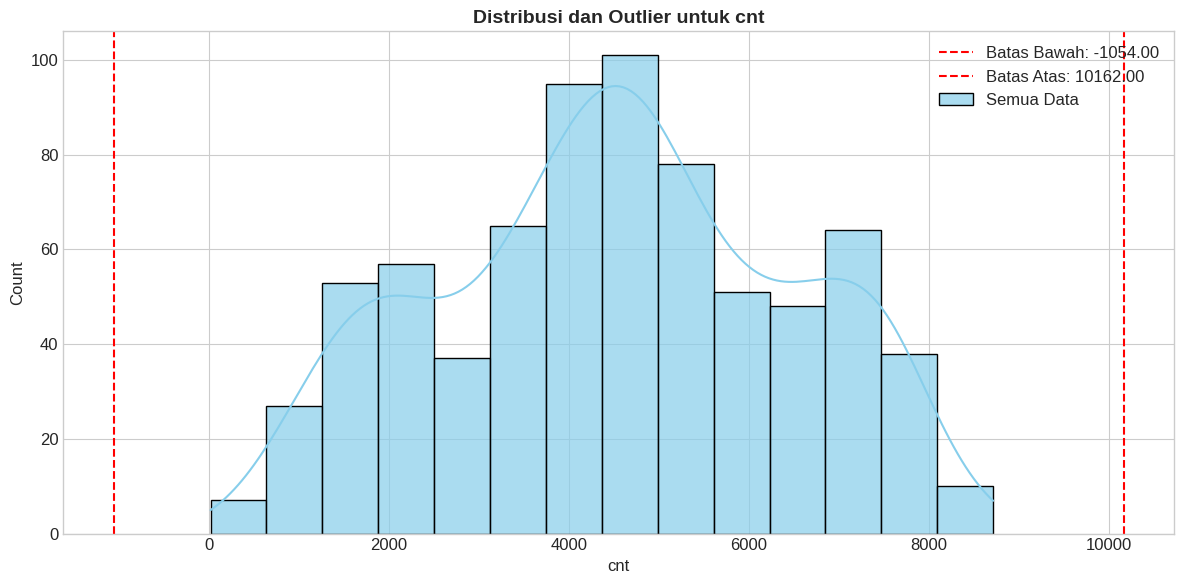


Ringkasan Hasil Deteksi Outlier:
            Batas Bawah    Batas Atas  Jumlah Outlier  Persentase
Kolom                                                            
temp          -0.140416      1.132916               0    0.000000
atemp         -0.068297      1.014741               0    0.000000
hum            0.204687      1.045521               2    0.273598
windspeed     -0.012447      0.380611              13    1.778386
casual      -855.250000   2266.750000              44    6.019152
registered  -922.250000   8195.750000               0    0.000000
cnt        -1054.000000  10162.000000               0    0.000000

ANALISIS OUTLIER PADA DATASET PER JAM


/tmp/ipykernel_63014/3794431285.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='Set2')


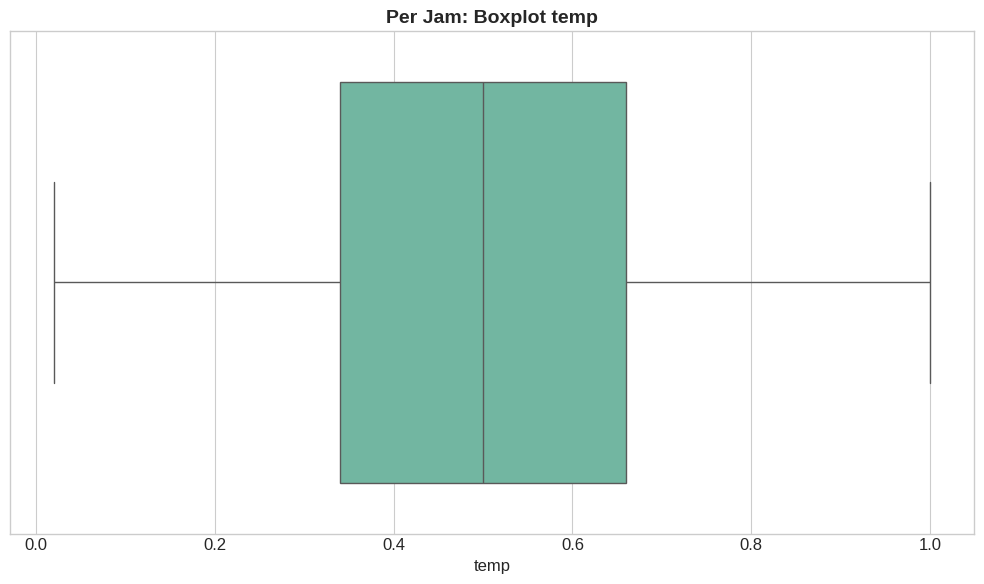

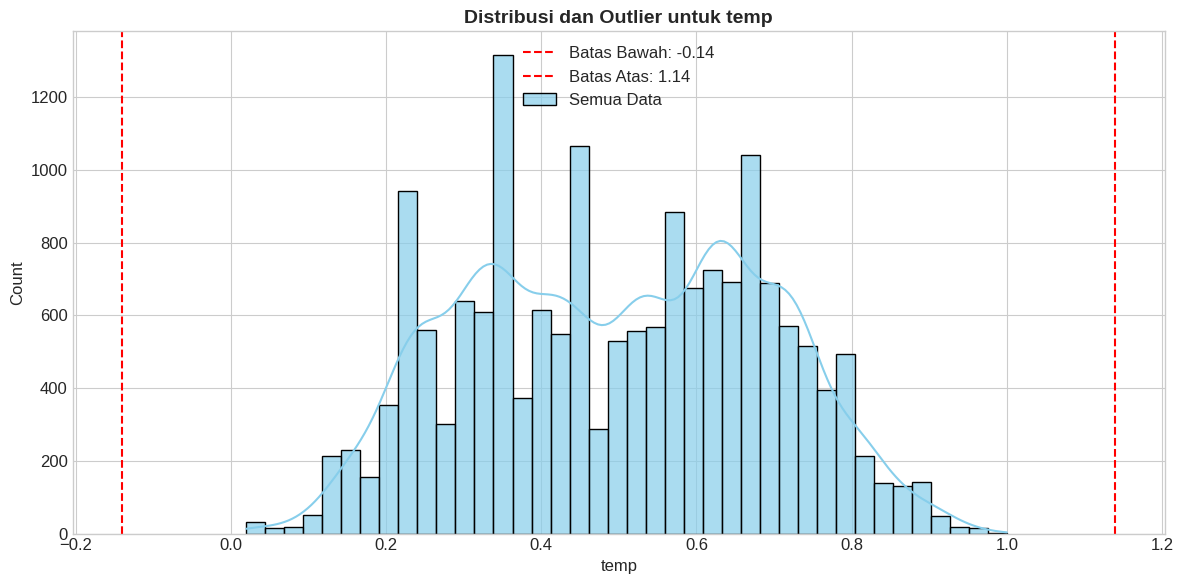

/tmp/ipykernel_63014/3794431285.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='Set2')


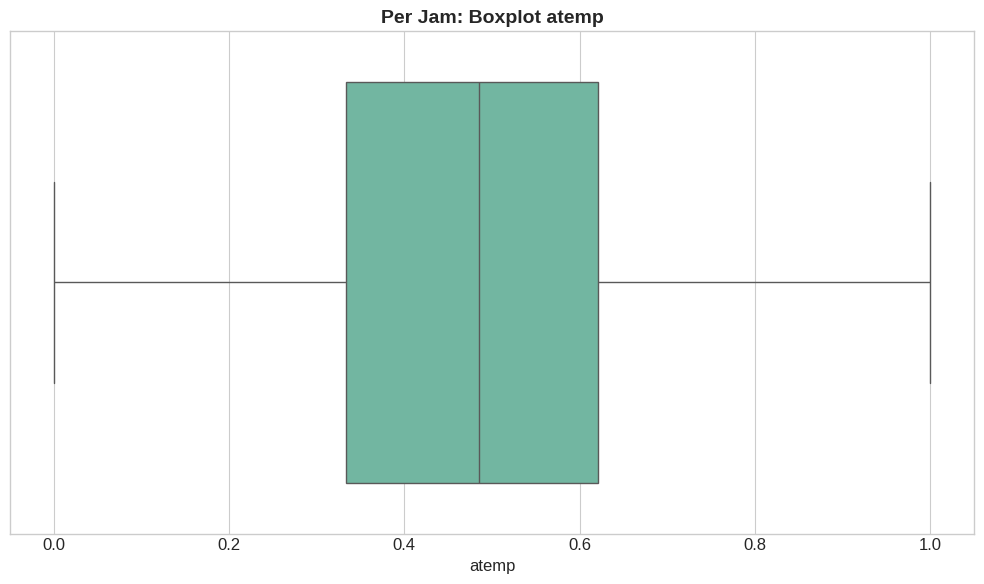

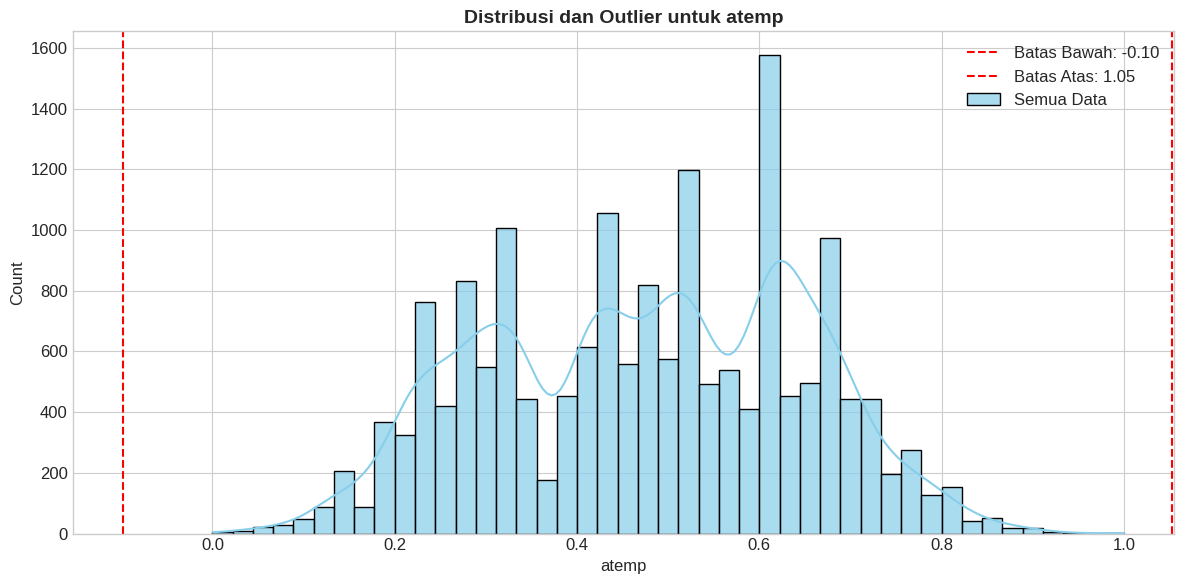

/tmp/ipykernel_63014/3794431285.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='Set2')


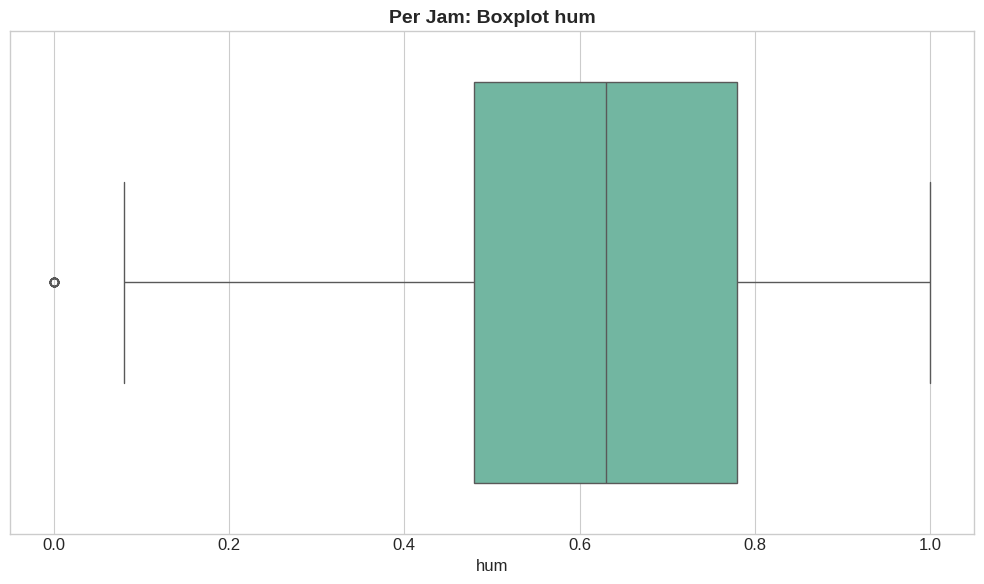

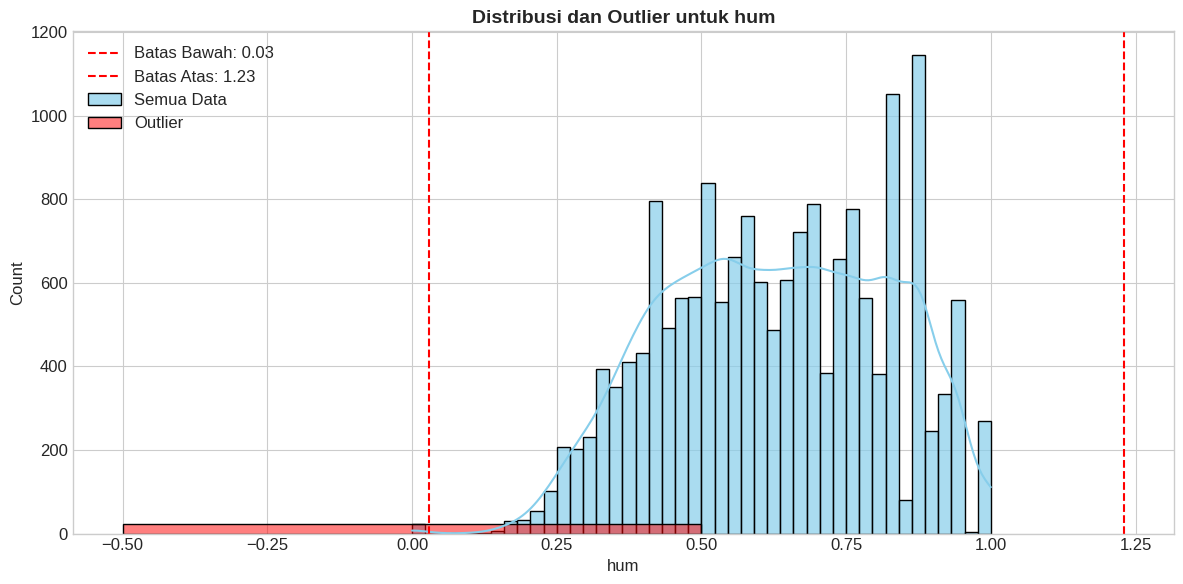


Per Jam: Outlier pada kolom hum:
Batas bawah: 0.03, Batas atas: 1.23
Jumlah outlier: 22 (0.13%)

Sampel outlier:
      instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
1562     1563  2011-03-10       1   0     3  13        0        4           1   
1559     1560  2011-03-10       1   0     3  10        0        4           1   
1563     1564  2011-03-10       1   0     3  14        0        4           1   
1554     1555  2011-03-10       1   0     3   5        0        4           1   
1560     1561  2011-03-10       1   0     3  11        0        4           1   

      weathersit  temp   atemp  hum  windspeed  casual  registered  cnt  
1562           3  0.42  0.4242  0.0     0.2239       1          11   12  
1559           3  0.40  0.4091  0.0     0.1642       0          17   17  
1563           3  0.44  0.4394  0.0     0.2985       0          12   12  
1554           3  0.36  0.3485  0.0     0.1940       1           2    3  
1560           3  0.40  0.409

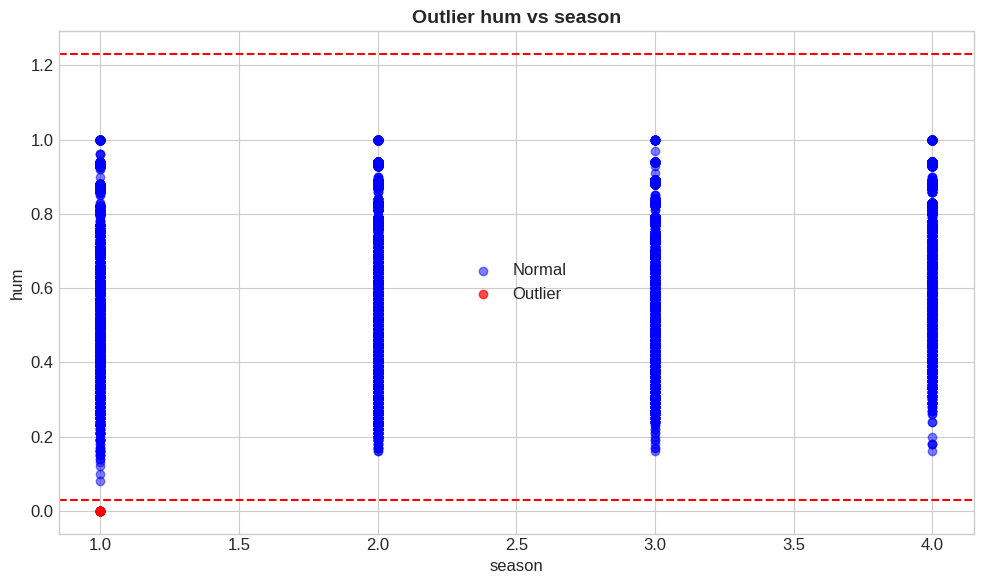

--------------------------------------------------------------------------------


/tmp/ipykernel_63014/3794431285.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='Set2')


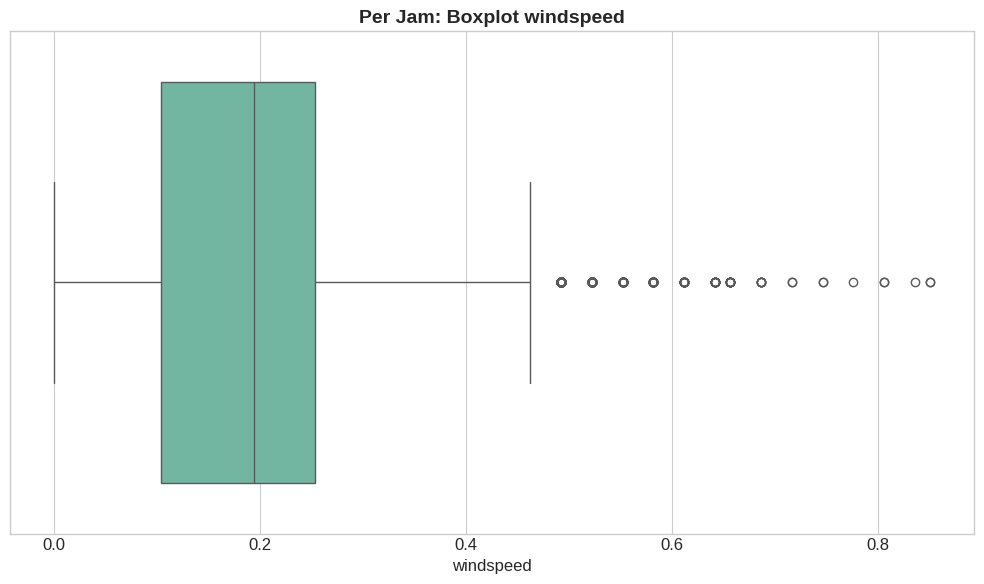

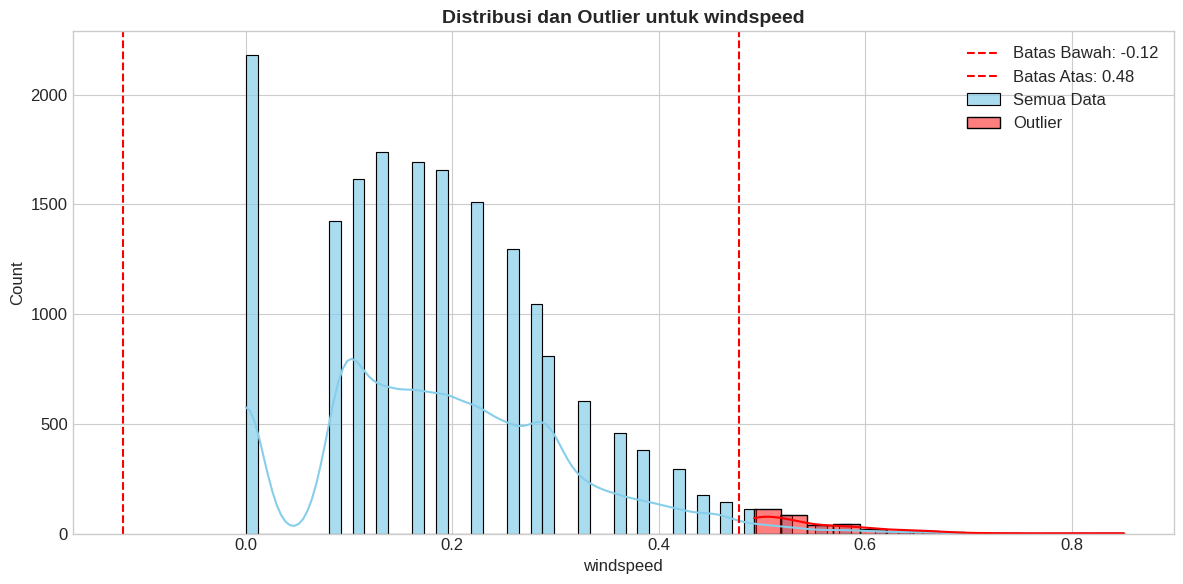


Per Jam: Outlier pada kolom windspeed:
Batas bawah: -0.12, Batas atas: 0.48
Jumlah outlier: 342 (1.97%)

Sampel outlier:
       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
16207    16208  2012-11-13       4   1    11   1        0        2   
1333      1334  2011-02-28       1   0     2  20        0        1   
9282      9283  2012-01-27       1   1     1  16        0        5   
8679      8680  2012-01-02       1   1     1  11        1        1   
15447    15448  2012-10-10       4   1    10  20        0        3   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
16207           1           3  0.44  0.4394  0.88     0.6418       0   
1333            1           3  0.44  0.4394  0.88     0.6119       0   
9282            1           1  0.44  0.4394  0.51     0.5522      26   
8679            0           1  0.26  0.2121  0.35     0.4925      33   
15447           1           1  0.52  0.5000  0.48     0.4925      21   

       registered  cnt  

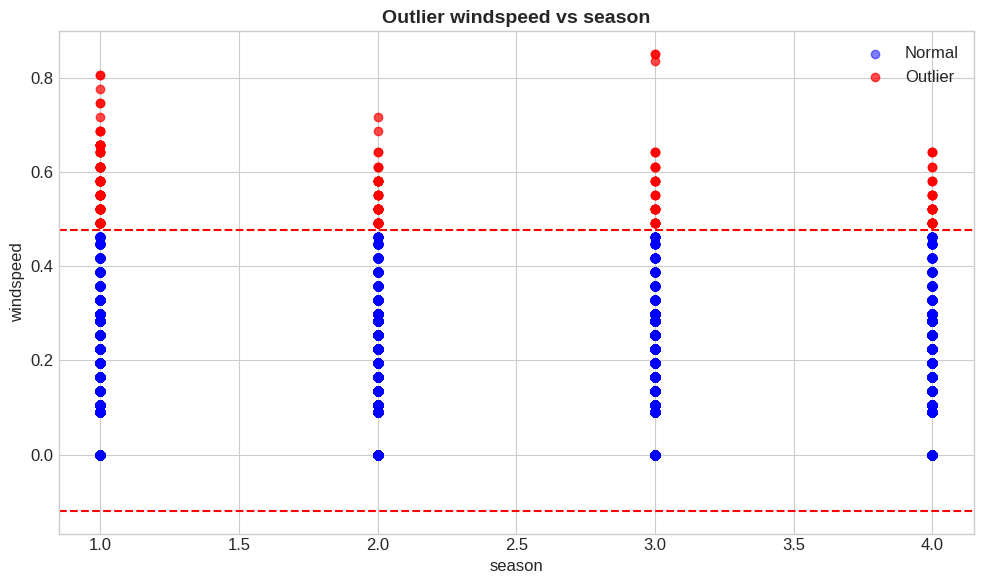

--------------------------------------------------------------------------------


/tmp/ipykernel_63014/3794431285.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='Set2')


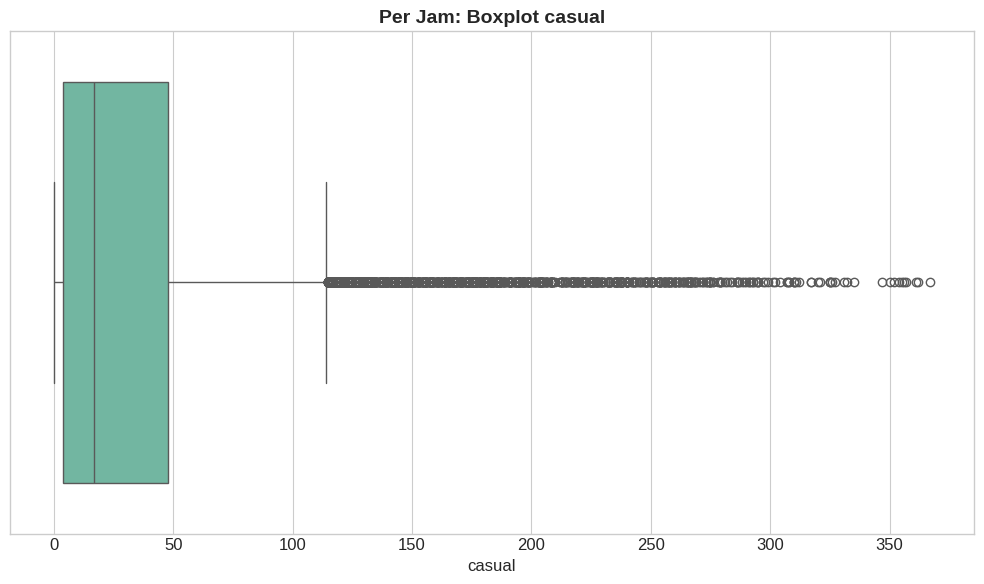

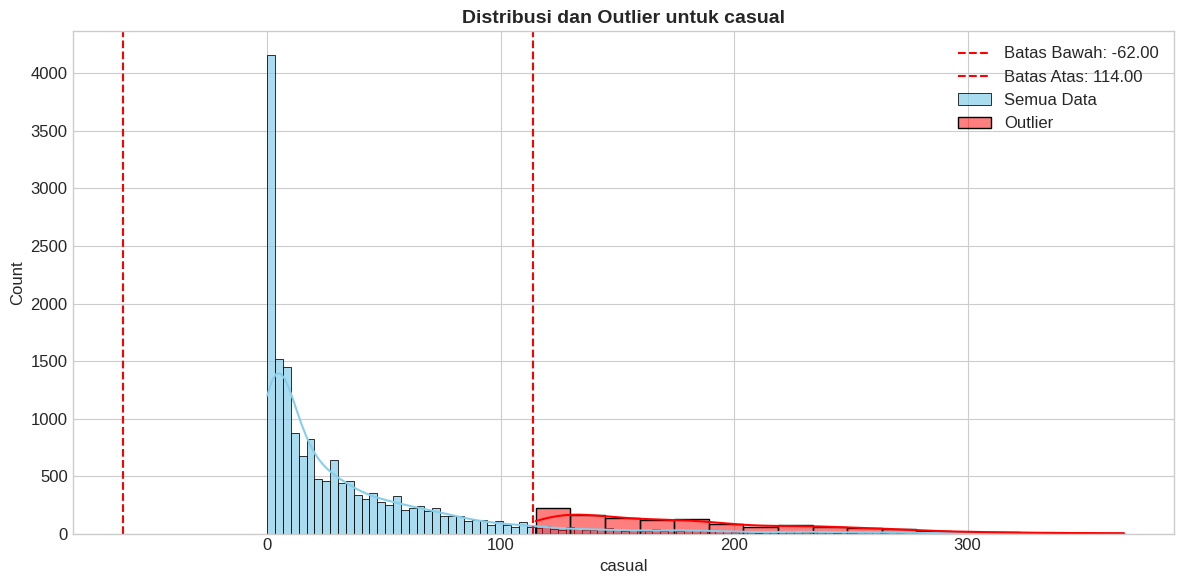


Per Jam: Outlier pada kolom casual:
Batas bawah: -62.00, Batas atas: 114.00
Jumlah outlier: 1192 (6.86%)

Sampel outlier:
       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
4312      4313  2011-07-03       3   0     7  14        0        0   
3496      3497  2011-05-30       2   0     5  14        1        1   
14145    14146  2012-08-17       3   1     8  14        0        5   
2296      2297  2011-04-10       2   0     4  13        0        0   
8659      8660  2012-01-01       1   1     1  14        0        0   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
4312            0           1  0.82  0.7879  0.56     0.2537     225   
3496            0           1  0.88  0.8030  0.39     0.0000     142   
14145           1           1  0.86  0.2424  0.34     0.4179     128   
2296            0           1  0.46  0.4545  0.82     0.1045     121   
8659            0           1  0.44  0.4394  0.54     0.2985     120   

       registered  cnt 

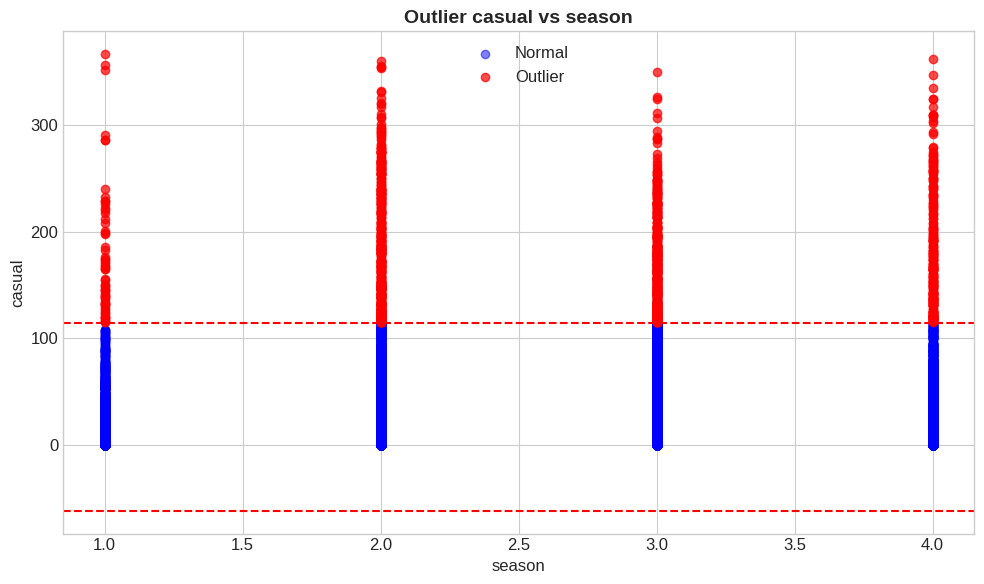

--------------------------------------------------------------------------------


/tmp/ipykernel_63014/3794431285.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='Set2')


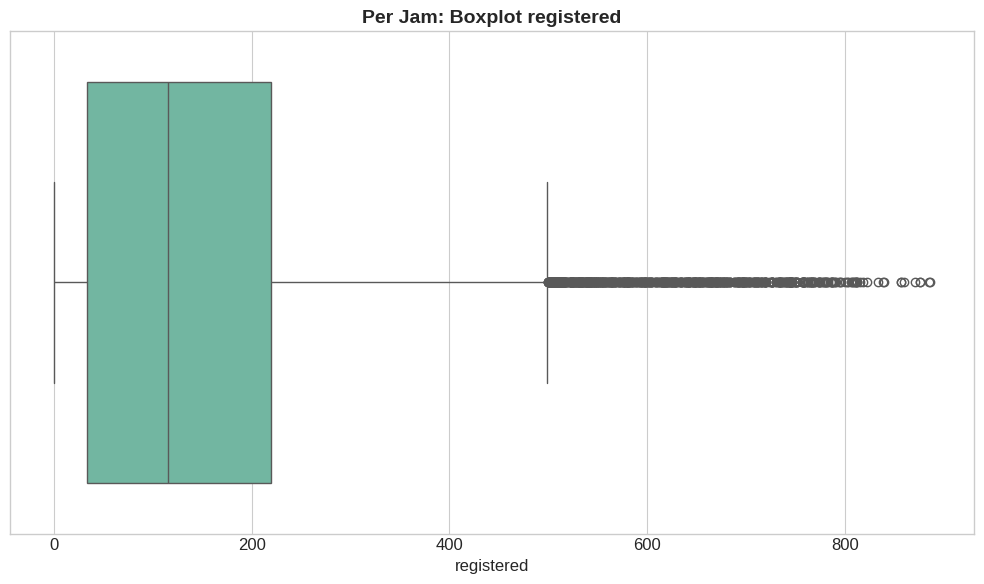

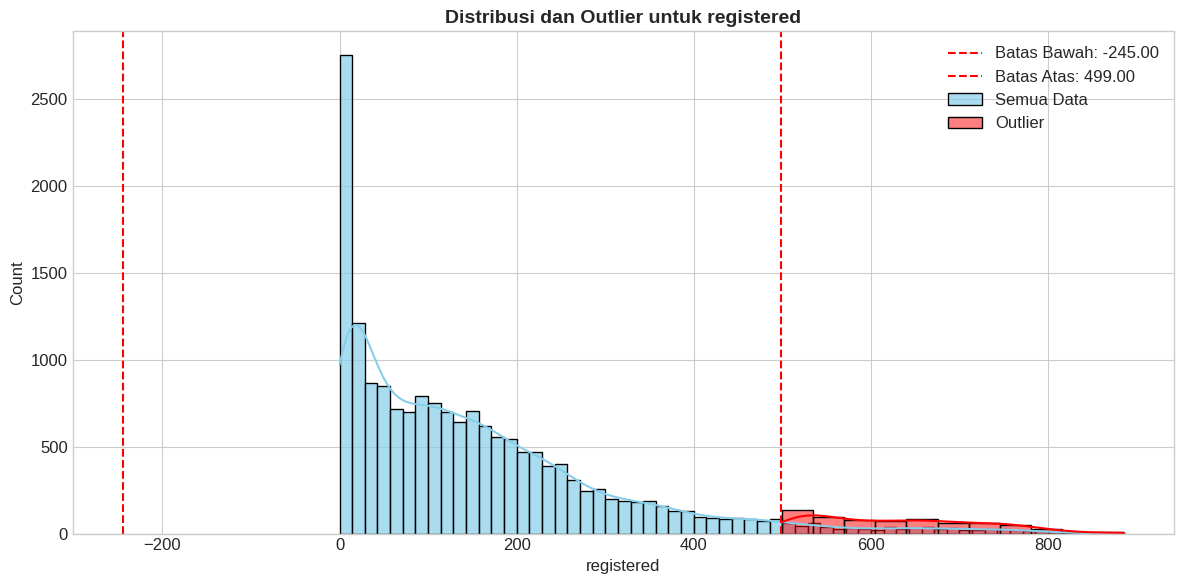


Per Jam: Outlier pada kolom registered:
Batas bawah: -245.00, Batas atas: 499.00
Jumlah outlier: 680 (3.91%)

Sampel outlier:
       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
12541    12542  2012-06-11       2   1     6  18        0        1   
12075    12076  2012-05-23       2   1     5   8        0        3   
13059    13060  2012-07-03       3   1     7   8        0        2   
12795    12796  2012-06-22       3   1     6   8        0        5   
6867      6868  2011-10-18       4   0    10  17        0        2   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
12541           1           2  0.80  0.7273  0.43     0.2985     105   
12075           1           1  0.58  0.5455  0.83     0.0000      38   
13059           1           1  0.74  0.6818  0.62     0.0896      42   
12795           1           1  0.76  0.6970  0.55     0.1343      49   
6867            1           1  0.60  0.6061  0.60     0.1343      72   

       registered  

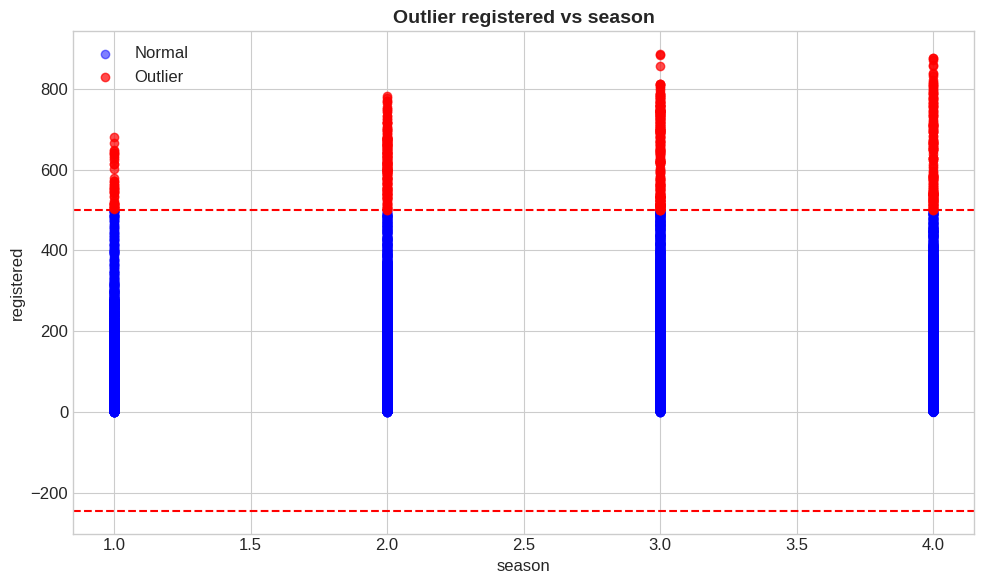

--------------------------------------------------------------------------------


/tmp/ipykernel_63014/3794431285.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette='Set2')


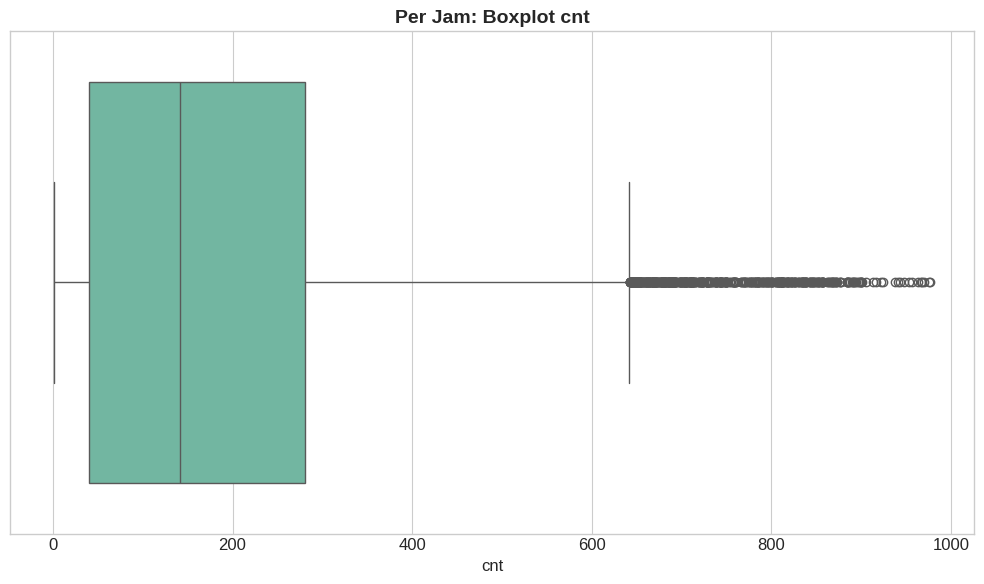

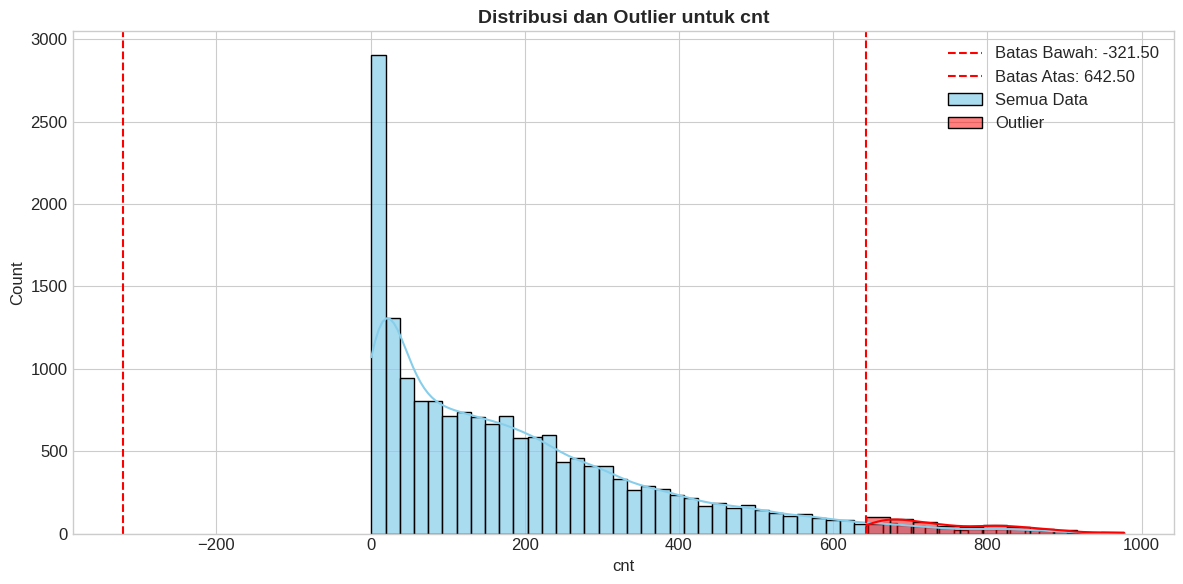


Per Jam: Outlier pada kolom cnt:
Batas bawah: -321.50, Batas atas: 642.50
Jumlah outlier: 505 (2.91%)

Sampel outlier:
       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
12588    12589  2012-06-13       2   1     6  17        0        3   
14955    14956  2012-09-20       3   1     9   8        0        4   
16173    16174  2012-11-11       4   1    11  15        0        0   
15951    15952  2012-11-02       4   1    11   8        0        5   
12345    12346  2012-06-03       2   1     6  14        0        0   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
12588           1           1  0.72  0.6515  0.32     0.4925      75   
14955           1           1  0.50  0.4848  0.68     0.0896      44   
16173           0           1  0.56  0.5303  0.37     0.2239     304   
15951           1           1  0.32  0.3333  0.57     0.1045      31   
12345           0           1  0.68  0.6364  0.36     0.3284     267   

       registered  cnt  
1

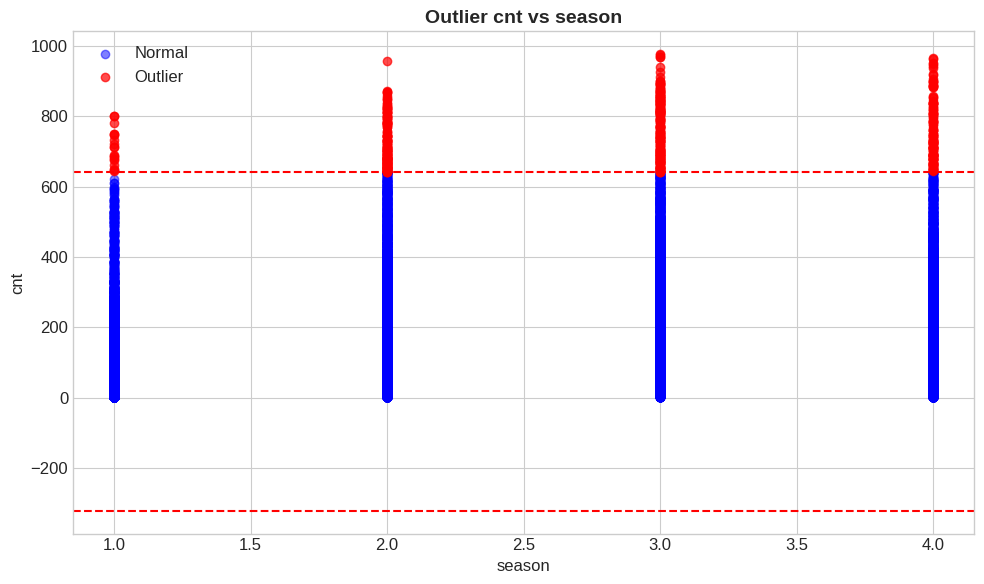

--------------------------------------------------------------------------------

Ringkasan Hasil Deteksi Outlier:
            Batas Bawah  Batas Atas  Jumlah Outlier  Persentase
Kolom                                                          
temp           -0.14000     1.14000               0    0.000000
atemp          -0.09855     1.05305               0    0.000000
hum             0.03000     1.23000              22    0.126590
windspeed      -0.11930     0.47750             342    1.967892
casual        -62.00000   114.00000            1192    6.858853
registered   -245.00000   499.00000             680    3.912768
cnt          -321.50000   642.50000             505    2.905806


In [15]:
if __name__ == "__main__":
    
    numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
    
    print("\n" + "="*80)
    print("ANALISIS OUTLIER PADA DATASET HARIAN")
    print("="*80)
    day_results = analyze_outliers(df_day, numerical_columns, "Harian:")
    
    print("\n" + "="*80)
    print("ANALISIS OUTLIER PADA DATASET PER JAM")
    print("="*80)
    
    hour_results = analyze_outliers(df_hour, numerical_columns, "Per Jam:")

#### **📊 Insight Analisis Kualitas Data Bike Sharing**  

##### **✨ Kualitas & Struktur Data**  

- **🟢 Kelengkapan Data**: Tidak ada *missing value*, dengan tipe data konsisten (*float64* untuk numerik, *int64* untuk kategorikal).  
- **🔗 Integritas Data**: Jumlah baris sesuai dokumentasi (731 hari, 17,379 jam) tanpa duplikasi.  
- **📅 Format Tanggal**: Kolom `dteday` masih dalam format *object*, perlu konversi ke *datetime* untuk analisis temporal yang lebih efektif.  
- **📏 Normalisasi**: Suhu dan variabel cuaca lainnya telah ternormalisasi, sehingga memerlukan *denormalisasi* agar lebih mudah diinterpretasikan.  

---

##### **🔍 Karakteristik Data**  

- **👥 Dominasi Pengguna**: Pengguna **terdaftar (*registered*)** secara konsisten mendominasi total penyewaan.  
- **🌤️ Kondisi Cuaca**: Mayoritas waktu dalam kondisi **cerah hingga berawan sebagian** (*rata-rata `weathersit` = 1.4*).  
- **🌬️ Pola Angin**: Kecepatan angin cenderung **rendah (0.0 - 0.5)**, mengindikasikan kondisi yang umumnya tenang.  

---

##### **⚠️ Pola Outlier**  

###### **🗓 Dataset Harian**  

| Variabel  | Jumlah Outlier | Persentase |
|-----------|---------------|------------|
| **Penyewa Kasual (`casual`)** | 44 | 6.02% |
| **Kecepatan Angin (`windspeed`)** | 13 | 1.78% |
| **Kelembaban (`hum`)** | 2 | 0.27% |
| **Suhu (`temp`), Pengguna Terdaftar (`registered`), Total Penyewaan (`cnt`)** | ❌ | Tidak ada outlier |

---

###### **⏳ Dataset Per Jam**  

| Variabel  | Jumlah Outlier | Persentase |
|-----------|---------------|------------|
| **Penyewa Kasual (`casual`)** | 1,192 | 6.86% |
| **Pengguna Terdaftar (`registered`)** | 680 | 3.91% |
| **Total Penyewaan (`cnt`)** | 505 | 2.91% |
| **Kecepatan Angin (`windspeed`)** | 342 | 1.97% |
| **Kelembaban (`hum`)** | 22 | 0.13% |

---

##### 💡 **Kesimpulan Utama**  

📌 **Data memiliki kualitas baik**, tetapi menunjukkan **variabilitas signifikan pada pengguna kasual**, mengindikasikan **faktor eksternal** yang memengaruhi pola penyewaan.  

📌 **Granularitas waktu penting**:  
- Outlier pada dataset **per jam** lebih menonjol dibandingkan dataset **harian**, menyoroti **variasi intra-hari** yang tidak terlihat pada analisis harian.  

📌 **Fokus Analisis Lanjutan**:  
- Investigasi faktor eksternal yang mempengaruhi penyewa kasual.  
- Analisis lebih dalam terhadap pola cuaca dan dampaknya terhadap penyewaan sepeda.  


### Cleaning Data

Konversi kolom date menjadi format datetime

In [16]:
df_hour ['dteday'] = pd.to_datetime(df_hour  ['dteday'])
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

Membuat fitur waktu tambahan untuk `df_hour`

In [17]:
df_hour['year'] = df_hour['dteday'].dt.year
df_hour['month'] = df_hour['dteday'].dt.month
df_hour['day'] = df_hour['dteday'].dt.day
df_hour['hour_of_day'] = df_hour['hr']
df_hour['day_of_week'] = df_hour['dteday'].dt.dayofweek
df_hour['is_weekend'] = df_hour['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

Membuat fitur waktu tambahan untuk `df_day`

In [18]:
df_day['year'] = df_day['dteday'].dt.year
df_day['month'] = df_day['dteday'].dt.month
df_day['day'] = df_day['dteday'].dt.day
df_day['day_of_week'] = df_day['dteday'].dt.dayofweek
df_day['is_weekend'] = df_day['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

Denormalisasi temperatur

Berdasarkan dokumentasinya, temp itu dinormalisasi dengan cara (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39

In [19]:
df_hour['temp_actual'] = df_hour['temp'] * (39 - (-8)) + (-8)
df_day['temp_actual'] = df_day['temp'] * (39 - (-8)) + (-8)

Denormalisasi feeling temperatur (atemp)

Berdasarkan dokumentasinya, temp itu dinormalisasi dengan cara (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50

In [20]:
df_hour['atemp_actual'] = df_hour['atemp'] * (50 - (-16)) + (-16)
df_day['atemp_actual'] = df_day['atemp'] * (50 - (-16)) + (-16)

Denormalisasi Humidity(hum)

Berdasarkan dokumentasinya, nilai humidity dibagi dengan 100

In [21]:
df_hour['hum_actual'] = df_hour['hum'] * 100
df_day['hum_actual'] = df_day['hum'] * 100

Denormalisasi Windspeed

Berdasarkan dokumentasinya, nilai humidity dibagi dengan 67

In [22]:
df_hour['windspeed_actual'] = df_hour['windspeed'] * 67
df_day['windspeed_actual'] = df_day['windspeed'] * 67

Sekarang kita akan buat fitur yang lebih deskriptif untuk kondisi cuaca

In [23]:
weather_dict = {
    1: "Clear/Partly Cloudy",
    2: "Misty/Cloudy",
    3: "Light Rain/Snow",
    4: "Heavy Rain/Snow/Fog"
}

df_hour['weather_desc'] = df_hour['weathersit'].map(weather_dict)
df_day['weather_desc'] = df_day['weathersit'].map(weather_dict)

season_dict = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}

df_hour['season_desc'] = df_hour['season'].map(season_dict)
df_day['season_desc'] = df_day['season'].map(season_dict)

sekarang kita akan lakukan outliers handling sesuai dengan insight yang sudah kita dapatkan sebelumnya.

In [24]:
def handle_bike_count_outliers(df):
    """
    Handle outliers in casual, registered, and cnt columns while maintaining their relationship
    and preserving integer data types
    
    Parameters:
    df (DataFrame): Input dataframe with casual, registered, and cnt columns
    
    Returns:
    DataFrame: DataFrame with outliers handled consistently
    dict: Information about outliers
    """
    df_cleaned = df.copy()
    
    def detect_outliers(column):
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        lower_bound = int(np.ceil(lower_bound))
        upper_bound = int(np.floor(upper_bound))
        
        outlier_mask = (df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)
        outlier_count = outlier_mask.sum()
        
        return lower_bound, upper_bound, outlier_mask, outlier_count
    
    outlier_info = {}
    
    lb_casual, ub_casual, mask_casual, count_casual = detect_outliers('casual')
    
    if count_casual > 0:
        original_casual = df_cleaned.loc[mask_casual, 'casual'].copy()
        
        for idx in df_cleaned[mask_casual].index:
            if df_cleaned.loc[idx, 'casual'] < lb_casual:
                df_cleaned.loc[idx, 'casual'] = lb_casual
            elif df_cleaned.loc[idx, 'casual'] > ub_casual:
                df_cleaned.loc[idx, 'casual'] = ub_casual
        
        for idx in df_cleaned[mask_casual].index:
            original_value = original_casual[idx]
            new_value = df_cleaned.loc[idx, 'casual']
            adjustment = original_value - new_value  
            
            df_cleaned.loc[idx, 'cnt'] = df_cleaned.loc[idx, 'cnt'] - adjustment
        
        outlier_info['casual'] = {
            'count': count_casual,
            'percent': (count_casual / len(df_cleaned)) * 100,
            'lower_bound': lb_casual,
            'upper_bound': ub_casual
        }
    
    lb_reg, ub_reg, mask_reg, count_reg = detect_outliers('registered')
    
    if count_reg > 0:
        original_reg = df_cleaned.loc[mask_reg, 'registered'].copy()
        
        for idx in df_cleaned[mask_reg].index:
            if df_cleaned.loc[idx, 'registered'] < lb_reg:
                df_cleaned.loc[idx, 'registered'] = lb_reg
            elif df_cleaned.loc[idx, 'registered'] > ub_reg:
                df_cleaned.loc[idx, 'registered'] = ub_reg
        
        for idx in df_cleaned[mask_reg].index:
            original_value = original_reg[idx]
            new_value = df_cleaned.loc[idx, 'registered']
            adjustment = original_value - new_value  
            
            df_cleaned.loc[idx, 'cnt'] = df_cleaned.loc[idx, 'cnt'] - adjustment
        
        outlier_info['registered'] = {
            'count': count_reg,
            'percent': (count_reg / len(df_cleaned)) * 100,
            'lower_bound': lb_reg,
            'upper_bound': ub_reg
        }
    
    inconsistent = (df_cleaned['casual'] + df_cleaned['registered'] != df_cleaned['cnt'])
    inconsistent_count = inconsistent.sum()
    
    if inconsistent_count > 0:
        print(f"Found {inconsistent_count} rows with count inconsistency after outlier handling")
        
        df_cleaned.loc[inconsistent, 'cnt'] = df_cleaned.loc[inconsistent, 'casual'] + df_cleaned.loc[inconsistent, 'registered']
    
    return df_cleaned, outlier_info

def handle_weather_outliers(df, column):
    """
    Detect and handle outliers in weather-related columns
    
    Parameters:
    df (DataFrame): Input dataframe
    column (str): Column to check for outliers
    
    Returns:
    DataFrame: DataFrame with outliers handled
    dict: Information about outliers
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(df)) * 100
    
    outlier_info = {
        'count': outlier_count,
        'percent': outlier_percent,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    
    df_cleaned = df.copy()
    
    df_cleaned.loc[df_cleaned[column] < lower_bound, column] = lower_bound
    df_cleaned.loc[df_cleaned[column] > upper_bound, column] = upper_bound
    
    return df_cleaned, outlier_info

In [25]:
print("Handling count-related outliers...")

df_hour, hour_count_outlier_info = handle_bike_count_outliers(df_hour)
print("\nOutlier Information - Hourly Count Data:")
for column, info in hour_count_outlier_info.items():
    print(f"{column}: {info['count']} outliers ({info['percent']:.2f}%)")

df_day, day_count_outlier_info = handle_bike_count_outliers(df_day)
print("\nOutlier Information - Daily Count Data:")
for column, info in day_count_outlier_info.items():
    print(f"{column}: {info['count']} outliers ({info['percent']:.2f}%)")

print("\nHandling weather-related outliers...")

weather_columns = ['windspeed', 'hum']

hour_weather_outlier_info = {}
for column in weather_columns:
    df_hour, outlier_info = handle_weather_outliers(df_hour, column)
    hour_weather_outlier_info[column] = outlier_info

print("\nOutlier Information - Hourly Weather Data:")
for column, info in hour_weather_outlier_info.items():
    print(f"{column}: {info['count']} outliers ({info['percent']:.2f}%)")

day_weather_outlier_info = {}
for column in weather_columns:
    df_day, outlier_info = handle_weather_outliers(df_day, column)
    day_weather_outlier_info[column] = outlier_info

print("\nOutlier Information - Daily Weather Data:")
for column, info in day_weather_outlier_info.items():
    print(f"{column}: {info['count']} outliers ({info['percent']:.2f}%)")

Handling count-related outliers...

Outlier Information - Hourly Count Data:
casual: 1192 outliers (6.86%)
registered: 680 outliers (3.91%)

Outlier Information - Daily Count Data:
casual: 44 outliers (6.02%)

Handling weather-related outliers...

Outlier Information - Hourly Weather Data:
windspeed: 342 outliers (1.97%)
hum: 22 outliers (0.13%)

Outlier Information - Daily Weather Data:
windspeed: 13 outliers (1.78%)
hum: 2 outliers (0.27%)


Mari lakukan beberapa feature engineering untuk analisis

In [26]:
df_hour['casual_ratio'] = df_hour['casual'] / (df_hour['registered'] + df_hour['casual'])
df_hour['casual_ratio'] = df_hour['casual_ratio'].fillna(0)  

df_day['casual_ratio'] = df_day['casual'] / (df_day['registered'] + df_day['casual'])
df_day['casual_ratio'] = df_day['casual_ratio'].fillna(0)  

df_hour['time_category'] = pd.cut(
    df_hour['hr'], 
    bins=[0, 6, 12, 18, 24], 
    labels=['Night (0-6)', 'Morning (6-12)', 'Afternoon (12-18)', 'Evening (18-24)'],
    include_lowest=True
)

df_hour['season_weather'] = df_hour['season_desc'] + ' - ' + df_hour['weather_desc']
df_day['season_weather'] = df_day['season_desc'] + ' - ' + df_day['weather_desc']

df_hour['day_type'] = 'Regular Working Day'
df_hour.loc[df_hour['holiday'] == 1, 'day_type'] = 'Holiday'
df_hour.loc[(df_hour['is_weekend'] == 1) & (df_hour['holiday'] == 0), 'day_type'] = 'Weekend'

df_day['day_type'] = 'Regular Working Day'
df_day.loc[df_day['holiday'] == 1, 'day_type'] = 'Holiday'
df_day.loc[(df_day['is_weekend'] == 1) & (df_day['holiday'] == 0), 'day_type'] = 'Weekend'

sekarang mari kita verify hasil cleaning kita, tujuan kita adalah memastikan bahwa data tetap konsisten

In [27]:
print("\nMissing values in df_hour after transformations:")
print(df_hour.isnull().sum())

print("\nMissing values in df_day after transformations:")
print(df_day.isnull().sum())

df_hour['check_cnt'] = df_hour['casual'] + df_hour['registered']
df_day['check_cnt'] = df_day['casual'] + df_day['registered']

print("\nCheck if cnt equals casual + registered (hourly dataset):")
print((df_hour['cnt'] == df_hour['check_cnt']).all())

print("\nCheck if cnt equals casual + registered (daily dataset):")
print((df_day['cnt'] == df_day['check_cnt']).all())


Missing values in df_hour after transformations:
instant             0
dteday              0
season              0
yr                  0
mnth                0
hr                  0
holiday             0
weekday             0
workingday          0
weathersit          0
temp                0
atemp               0
hum                 0
windspeed           0
casual              0
registered          0
cnt                 0
year                0
month               0
day                 0
hour_of_day         0
day_of_week         0
is_weekend          0
temp_actual         0
atemp_actual        0
hum_actual          0
windspeed_actual    0
weather_desc        0
season_desc         0
casual_ratio        0
time_category       0
season_weather      0
day_type            0
dtype: int64

Missing values in df_day after transformations:
instant             0
dteday              0
season              0
yr                  0
mnth                0
holiday             0
weekday             0
workingd

saya akan buat report ala-ala for fun

In [28]:
def generate_data_quality_report(df, name):
    """Generate a basic data quality report"""
    print(f"\n----- Data Quality Report: {name} -----")
    print(f"Dataset shape: {df.shape}")
    print(f"Missing values: {df.isnull().sum().sum()}")
    
    print("\nData Types:")
    print(df.dtypes.value_counts())
    
    print("\nSample Data (5 rows):")
    print(df.head())
    
    print("\nSummary Statistics (Numeric):")
    print(df.describe().round(2))
    
    return

generate_data_quality_report(df_hour, "Hourly Dataset (Cleaned)")
generate_data_quality_report(df_day, "Daily Dataset (Cleaned)")


----- Data Quality Report: Hourly Dataset (Cleaned) -----
Dataset shape: (17379, 34)
Missing values: 0

Data Types:
int64             15
float64            9
int32              4
object             4
datetime64[ns]     1
category           1
Name: count, dtype: int64

Sample Data (5 rows):
   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  ...  atemp_actual  hum_actual  windspeed_actual  \
0           1  ...        3.0014        81.0               0.0   
1           1  ...        1.9982        80.0               0.0   
2           1  ...        1.9982        80.0   

In [29]:
df_day.to_csv('daily_cleaned.csv', index=False)
df_hour.to_csv('hourly_cleaned.csv', index=False)

### 📊 **Insight dari Proses Pembersihan Data Bike Sharing**

#### **🌟 Ringkasan Transformasi Data**

Proses pembersihan data telah berhasil menghasilkan dataset yang bersih, konsisten, dan siap untuk analisis mendalam. Berikut adalah rangkuman hasil transformasi yang telah dilakukan:

#### **📈 Struktur Dataset Final**

| Parameter | Dataset Per Jam | Dataset Harian |
|-----------|----------------|----------------|
| Jumlah Baris | 17.379 | 731 |
| Jumlah Kolom | 34 | 31 |
| Missing Values | 0 | 0 |
| Tipe Data | 6 jenis (int64, float64, datetime64, dll) | 5 jenis |

#### **🧹 Hasil Pembersihan & Pengayaan Data**

##### **✅ Normalisasi & Konsistensi Data**
* **Konversi Datetime**: Kolom `dteday` telah dikonversi ke format datetime yang tepat, memungkinkan analisis temporal yang lebih baik
* **Denormalisasi Variabel Cuaca**: Suhu (-7,06°C hingga 39°C), kelembaban, dan kecepatan angin telah dikembalikan ke satuan yang sebenarnya
* **Konsistensi Jumlah**: Hubungan `cnt = casual + registered` telah diverifikasi dan dipastikan terjaga

##### **🔍 Fitur Baru untuk Analisis Mendalam**
* **Fitur Temporal**: Penambahan `year`, `month`, `day`, `hour_of_day`, `day_of_week`, `is_weekend`
* **Kategori Waktu**: Pengelompokan jam menjadi kategori (Malam, Pagi, Siang, Malam)
* **Deskripsi Kategorikal**: Penambahan deskripsi yang mudah dibaca untuk `season` dan `weathersit`
* **Tipe Hari**: Pengelompokan hari menjadi "Hari Kerja Biasa", "Akhir Pekan", atau "Libur"
* **Rasio Pengguna**: Penambahan `casual_ratio` untuk menganalisis proporsi pengguna kasual

#### **💡 Insight Utama dari Dataset yang Telah Dibersihkan**

#### **🌡️ Kondisi Cuaca & Lingkungan**
* **Rentang Suhu**: Suhu berkisar dari -7,06°C hingga 39°C (per jam) dan -5,22°C hingga 32,50°C (harian)
* **Kelembaban Rata-rata**: Sekitar 63% dengan variasi dari 0% hingga 100%
* **Kecepatan Angin**: Mencapai 57 km/jam pada dataset per jam dan 34 km/jam pada dataset harian

#### **🚲 Pola Penggunaan Sepeda**
* **Rata-rata Penyewaan**:
  * **Per Jam**: Sekitar 180 sepeda
  * **Per Hari**: Sekitar 4.480 sepeda
* **Komposisi Pengguna**: Pengguna kasual menyumbang sekitar 17% dari total penyewaan
* **Rentang Penyewaan**:
  * **Per Jam**: 1 hingga 613 sepeda
  * **Per Hari**: 22 hingga 8.232 sepeda

#### **📅 Distribusi Temporal**
* **Musim**: Data terdistribusi merata di semua musim (rata-rata 2,5 dengan std 1,11)
* **Hari Kerja**: Sekitar 68% data adalah hari kerja, sisanya akhir pekan atau libur
* **Tahun**: Data tersebar merata antara 2011 (50%) dan 2012 (50%)

#### **🔮 Potensi Analisis Lanjutan**

Dengan dataset yang telah dibersihkan ini, kita dapat melakukan analisis mendalam untuk menjawab pertanyaan bisnis tentang:

1. **Pengaruh Waktu & Musim**: Menggunakan fitur temporal dan musim untuk mengidentifikasi pola permintaan sepeda
2. **Perbedaan Pola Pengguna**: Membandingkan perilaku pengguna kasual vs terdaftar berdasarkan kondisi cuaca menggunakan `casual_ratio` dan fitur cuaca yang telah dinormalisasi
3. **Segmentasi Pengguna**: Menggunakan fitur `day_type`, `time_category`, dan `season_weather` untuk mengidentifikasi segmen pengguna yang berbeda

---

**Kesimpulan**: Proses pembersihan data telah berhasil menyiapkan dataset yang kaya, konsisten, dan siap untuk analisis mendalam sesuai dengan pertanyaan bisnis yang ingin dijawab. Transformasi dari variabel dengan kode numerik menjadi deskripsi yang bermakna, serta penambahan fitur-fitur baru akan memudahkan pemahaman pola penggunaan sepeda dan faktor-faktor yang mempengaruhinya.

## Exploratory Data Analysis (EDA)

### **Ekspolari Distribusi Variabel Kategorik**

Pertama sekali, saya akan menampilkan distribusi berdasarkan musim

In [30]:
print("\nDistribusi data berdasarkan musim (dataset per jam):")
season_counts = df_hour['season_desc'].value_counts().sort_index()
print(season_counts)
print("\nPersentase data berdasarkan musim:")
print((season_counts / len(df_hour) * 100).round(2))


Distribusi data berdasarkan musim (dataset per jam):
season_desc
Fall      4496
Spring    4242
Summer    4409
Winter    4232
Name: count, dtype: int64

Persentase data berdasarkan musim:
season_desc
Fall      25.87
Spring    24.41
Summer    25.37
Winter    24.35
Name: count, dtype: float64


Distribusi data menunjukkan bahwa jumlah pemakaian sepeda relatif merata di semua musim, dengan sedikit dominasi pada musim Fall (25.87%) dan Summer (25.37%). Ini mengindikasikan bahwa penggunaan sepeda tidak terlalu dipengaruhi oleh musim secara drastis, tetapi mungkin ada faktor lain seperti suhu, kelembaban, atau cuaca ekstrem yang lebih menentukan pola permintaan rental. Untuk analisis lebih lanjut, perlu melihat tren jumlah penyewaan per musim dan hubungannya dengan kondisi cuaca spesifik. 🚲📊

In [31]:
print("\nDistribusi data berdasarkan kondisi cuaca (dataset per jam):")
weather_counts = df_hour['weather_desc'].value_counts().sort_index()
print(weather_counts)
print("\nPersentase data berdasarkan kondisi cuaca:")
print((weather_counts / len(df_hour) * 100).round(2))


Distribusi data berdasarkan kondisi cuaca (dataset per jam):
weather_desc
Clear/Partly Cloudy    11413
Heavy Rain/Snow/Fog        3
Light Rain/Snow         1419
Misty/Cloudy            4544
Name: count, dtype: int64

Persentase data berdasarkan kondisi cuaca:
weather_desc
Clear/Partly Cloudy    65.67
Heavy Rain/Snow/Fog     0.02
Light Rain/Snow         8.17
Misty/Cloudy           26.15
Name: count, dtype: float64


Mayoritas data datang dari cuaca **cerah/berawan sebagian (65.67%)**, sedangkan **cuaca ekstrem** kayak hujan lebat/salju hampir nggak ada (0.02%).  

🔹 **Apa artinya?**  
- Karena data cuaca ekstrem dikit banget, susah buat analisis dampaknya ke rental.  
- **Mendung/kabut (26.15%)** cukup sering, bisa jadi bikin orang males nyewa.  
- **Hujan ringan/salju (8.17%)** mungkin lebih ngaruh ke pengguna kasual dibanding terdaftar.  

selanjutnya ayo cek berdasarkan tipe hari.

In [32]:
print("\nDistribusi data berdasarkan tipe hari (dataset per jam):")
daytype_counts = df_hour['day_type'].value_counts().sort_index()
print(daytype_counts)
print("\nPersentase data berdasarkan tipe hari:")
print((daytype_counts / len(df_hour) * 100).round(2))


Distribusi data berdasarkan tipe hari (dataset per jam):
day_type
Holiday                  500
Regular Working Day    11865
Weekend                 5014
Name: count, dtype: int64

Persentase data berdasarkan tipe hari:
day_type
Holiday                 2.88
Regular Working Day    68.27
Weekend                28.85
Name: count, dtype: float64


Mayoritas data berasal dari **hari kerja (68.27%)**, sedangkan **akhir pekan (28.85%)** dan **hari libur (2.88%)** jauh dikit banget.  

🔹 **Apa artinya?**  
- Karena rental lebih banyak di hari kerja, kemungkinan besar banyak pengguna **terdaftar** yang pakai buat "commuting".  
- **Akhir pekan cukup signifikan (28.85%)**, bisa jadi lebih banyak pengguna **kasual** buat rekreasi.  
- **Hari libur minim (2.88%)**, mungkin karena jumlahnya memang lebih sedikit dalam setahun atau orang cenderung nggak pakai sepeda di hari libur.

Sekarang ayo coba kita lihat berdasarkan kategori waktu.

In [33]:
print("\nDistribusi data berdasarkan kategori waktu (dataset per jam):")
time_counts = df_hour['time_category'].value_counts().sort_index()
print(time_counts)
print("\nPersentase data berdasarkan kategori waktu:")
print((time_counts / len(df_hour) * 100).round(2))


Distribusi data berdasarkan kategori waktu (dataset per jam):
time_category
Night (0-6)          5001
Morning (6-12)       4363
Afternoon (12-18)    4375
Evening (18-24)      3640
Name: count, dtype: int64

Persentase data berdasarkan kategori waktu:
time_category
Night (0-6)          28.78
Morning (6-12)       25.11
Afternoon (12-18)    25.17
Evening (18-24)      20.94
Name: count, dtype: float64


Distribusi rental **cukup merata** di pagi (25.11%) dan sore (25.17%), tapi **lebih tinggi di malam (28.78%)** dan lebih rendah di malam awal (20.94%).  

🔹 **Apa artinya?**  
- **Malam (0-6) tertinggi** → Bisa jadi banyak pengguna **kasual** atau shift worker.  
- **Pagi (6-12) & Sore (12-18) mirip** → Mungkin pengguna **terdaftar** commuting ke/dari kerja.  
- **Malam awal (18-24) lebih rendah** → Bisa jadi orang lebih sedikit pakai sepeda buat aktivitas malam.  

### **Analisis Statistik Berdasarkan Variabel Ketegorik**

In [34]:
print("\nStatistik penyewaan berdasarkan musim:")

season_stats = df_hour.groupby('season_desc').agg({
    'casual': ['mean', 'sum'],
    'registered': ['mean', 'sum'],
    'cnt': ['mean', 'sum', 'std'],
    'casual_ratio': ['mean', 'std']
})
season_stats


Statistik penyewaan berdasarkan musim:


casual          registered                 cnt          \
                  mean     sum        mean     sum        mean     sum   
season_desc                                                              
Fall         44.604760  200543  177.451512  797822  222.056272  998365   
Spring       13.371759   56723   96.135314  407806  109.507072  464529   
Summer       38.750737  170852  156.898843  691767  195.649580  862619   
Winter       26.793715  113391  162.077032  685910  188.870747  799301   

                        casual_ratio            
                    std         mean       std  
season_desc                                     
Fall         169.934760     0.208108  0.116267  
Spring       113.364584     0.114530  0.126040  
Summer       163.467705     0.200785  0.130461  
Winter       158.976132     0.139118  0.110089

Dari analisis ini, terlihat bahwa **musim memang mempengaruhi permintaan rental sepeda**. Penyewaan paling tinggi terjadi di musim gugur dan musim panas, sedangkan musim semi memiliki jumlah penyewaan terendah. Ini bisa jadi karena cuaca yang lebih nyaman untuk bersepeda di dua musim tersebut, sementara musim semi mungkin masih terlalu dingin atau hujan.  

Dari sisi perbedaan pengguna, **pengguna terdaftar tetap aktif di semua musim**, tetapi **pengguna kasual lebih sensitif terhadap cuaca**. Di musim dingin, misalnya, jumlah pengguna kasual turun drastis, sementara pengguna terdaftar masih cukup stabil. Selain itu, rasio pengguna kasual di musim semi sangat rendah, artinya sebagian besar penyewa di musim ini adalah pelanggan tetap.  

Hal ini bisa jadi peluang untuk menarik lebih banyak pengguna kasual menjadi pelanggan tetap, misalnya dengan **promo atau program loyalitas di musim dingin dan semi**. Juga, karena permintaan melonjak di musim panas dan gugur, operator bisa menyesuaikan distribusi sepeda agar ketersediaannya optimal saat dibutuhkan.

In [35]:
print("\nStatistik penyewaan berdasarkan kondisi cuaca:")

weather_stats = df_hour.groupby('weather_desc').agg({
    'casual': ['mean', 'sum'],
    'registered': ['mean', 'sum'],
    'cnt': ['mean', 'sum', 'std'],
    'casual_ratio': ['mean', 'std']
})
weather_stats


Statistik penyewaan berdasarkan kondisi cuaca:


casual          registered                  cnt  \
                          mean     sum        mean      sum        mean   
weather_desc                                                              
Clear/Partly Cloudy  34.877859  398061  158.381670  1807610  193.259529   
Heavy Rain/Snow/Fog   2.666667       8   71.666667      215   74.333333   
Light Rain/Snow      14.904863   21150   93.630021   132861  108.534884   
Misty/Cloudy         26.912412  122290  141.421435   642619  168.333847   

                                         casual_ratio            
                         sum         std         mean       std  
weather_desc                                                     
Clear/Partly Cloudy  2205671  164.472487     0.175787  0.127604  
Heavy Rain/Snow/Fog      223   77.925178     0.035947  0.007870  
Light Rain/Snow       154011  122.734974     0.125238  0.128403  
Misty/Cloudy          764909  147.983769     0.156563  0.123182

Dari statistik ini, kondisi cuaca sangat mempengaruhi pola penyewaan sepeda, terutama bagi pengguna kasual. Saat cuaca cerah atau berawan sebagian, permintaan sepeda paling tinggi, dengan rata-rata sekitar 193 penyewaan per hari, didominasi oleh pengguna terdaftar. Sebaliknya, saat terjadi hujan atau salju deras, penyewaan anjlok drastis, terutama oleh pengguna kasual yang hampir tidak ada.

Pengguna kasual tampaknya lebih sensitif terhadap cuaca buruk dibandingkan pengguna terdaftar. Pada kondisi hujan ringan atau salju, penyewaan kasual turun cukup signifikan dibandingkan cuaca cerah, sementara pengguna terdaftar masih cukup stabil. Ini menunjukkan bahwa pengguna terdaftar lebih bergantung pada sepeda sebagai moda transportasi rutin, sedangkan pengguna kasual lebih cenderung bersepeda untuk rekreasi.

In [36]:
print("\nStatistik penyewaan berdasarkan tipe hari:")

daytype_stats = df_hour.groupby('day_type').agg({
    'casual': ['mean', 'sum'],
    'registered': ['mean', 'sum'],
    'cnt': ['mean', 'sum', 'std'],
    'casual_ratio': ['mean', 'std']
})

daytype_stats


Statistik penyewaan berdasarkan tipe hari:


casual          registered                  cnt  \
                          mean     sum        mean      sum        mean   
day_type                                                                  
Holiday              36.788000   18394  111.606000    55803  148.394000   
Regular Working Day  25.269364  299821  160.141509  1900079  185.410872   
Weekend              44.534105  223294  125.134224   627423  169.668329   

                                         casual_ratio            
                         sum         std         mean       std  
day_type                                                         
Holiday                74197  141.587828     0.228650  0.144828  
Regular Working Day  2199900  163.985065     0.138606  0.119334  
Weekend               850717  147.492617     0.226688  0.120914

Dapat dilihat, pola penyewaan sangat dipengaruhi oleh jenis hari. Pengguna kasual cenderung lebih banyak menyewa sepeda pada akhir pekan dan hari libur, dengan rata-rata sekitar 44 penyewaan per hari di akhir pekan dan 37 di hari libur, dibandingkan hanya 25 di hari kerja. Sebaliknya, pengguna terdaftar lebih dominan pada hari kerja, dengan rata-rata penyewaan tertinggi mencapai 160 per hari, yang menunjukkan bahwa mereka menggunakan sepeda lebih sebagai moda transportasi rutin.

Rasio pengguna kasual juga lebih tinggi di akhir pekan dan hari libur, menunjukkan bahwa sepeda lebih banyak digunakan untuk aktivitas santai atau rekreasi pada waktu-waktu tersebut. Sebaliknya, pada hari kerja, sebagian besar penyewa adalah pelanggan tetap, yang kemungkinan besar menggunakan sepeda untuk keperluan komuter.

In [37]:
print("\nStatistik penyewaan berdasarkan kategori waktu:")

timecat_stats = df_hour.groupby('time_category').agg({
    'casual': ['mean', 'sum'],
    'registered': ['mean', 'sum'],
    'cnt': ['mean', 'sum', 'std'],
    'casual_ratio': ['mean', 'std']
})

timecat_stats


Statistik penyewaan berdasarkan kategori waktu:


/tmp/ipykernel_63014/3092326967.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  timecat_stats = df_hour.groupby('time_category').agg({


casual          registered                  cnt  \
                        mean     sum        mean      sum        mean   
time_category                                                           
Night (0-6)         4.457508   22292   27.864227   139349   32.321736   
Morning (6-12)     35.679578  155670  191.490259   835472  227.169837   
Afternoon (12-18)  58.606171  256402  238.592229  1043841  297.198400   
Evening (18-24)    29.435440  107145  155.121703   564643  184.557143   

                                       casual_ratio            
                       sum         std         mean       std  
time_category                                                  
Night (0-6)         161641   39.334426     0.152986  0.166150  
Morning (6-12)      991142  140.029093     0.166851  0.115837  
Afternoon (12-18)  1300243  156.843532     0.196828  0.102760  
Evening (18-24)     671788  128.047944     0.148715  0.095513

Dari informasi ini, puncak penyewaan terjadi di siang hingga sore hari (12-18), dengan rata-rata 297 penyewaan per hari, didominasi oleh pengguna terdaftar. Sementara itu, pagi hari (6-12) juga cukup ramai, terutama oleh pengguna yang kemungkinan besar menggunakan sepeda untuk keperluan komuter.

Di malam hari (18-24), penyewaan menurun, tetapi masih cukup signifikan. Namun, saat dini hari (0-6), permintaan sangat rendah, terutama dari pengguna kasual. Ini wajar karena kebanyakan orang tidak beraktivitas di jam tersebut.

### **Analisis Pola Waktu Dasar**

In [38]:
print("\nStatistik penyewaan berdasarkan jam:")

hourly_stats = df_hour.groupby('hr').agg({
    'casual': ['mean', 'sum'],
    'registered': ['mean', 'sum'],
    'cnt': ['mean', 'sum', 'std'],
    'casual_ratio': ['mean', 'std']
})

hourly_stats


Statistik penyewaan berdasarkan jam:


casual         registered                 cnt                      \
         mean    sum        mean     sum        mean     sum         std   
hr                                                                         
0   10.158402   7375   43.739669   31755   53.898072   39130   42.307910   
1    6.504144   4709   26.871547   19455   33.375691   24164   33.538727   
2    4.772028   3412   18.097902   12940   22.869930   16352   26.578642   
3    2.715925   1893    9.011478    6281   11.727403    8174   13.239190   
4    1.253945    874    5.098996    3554    6.352941    4428    4.143818   
5    1.411437   1012   18.478382   13249   19.889819   14261   13.200765   
6    4.161379   3017   71.882759   52115   76.044138   55132   55.084348   
7   11.055021   8037  200.244842  145578  211.299862  153615  159.888325   
8   21.679505  15761  299.524072  217754  321.203576  233515  185.410281   
9   30.763411  22365  188.418157  136980  219.181568  159345   93.611603   
10  43.572215  31677  127.191197   92468  170.763411  124145   95.586916   
11  51.499312  37440  148.602476  108034  200.101788  145474  110.267784   
12  55.480769  40390  184.969780  134658  240.450549  175048  120.513312   
13  56.814815  41418  181.352538  132206  238.167353  173624  119.204953   
14  59.030178  43033  165.377229  120560  224.407407  163593  116.505648   
15  58.844993  42898  176.327846  128543  235.172840  171441  116.056081   
16  59.315068  43300  238.238356  173914  297.553425  217214  130.268133   
17  62.389041  45544  342.050685  249697  404.439726  295241  169.406395   
18  55.232143  40209  328.188187  238921  383.420330  279130  171.010161   
19  46.140110  33590  260.038462  189308  306.178571  222898  154.135049   
20  35.674451  25971  189.796703  138172  225.471154  164143  118.887966   
21  27.995879  20381  144.059066  104875  172.054945  125256   88.889216   
22  22.167582  16138  109.082418   79412  131.250000   95550   69.524584   
23  15.199176  11065   72.631868   52876   87.831044   63941   50.846889   

   casual_ratio            
           mean       std  
hr                         
0      0.173392  0.117750  
1      0.186952  0.153295  
2      0.195562  0.183174  
3      0.175963  0.197770  
4      0.161596  0.204080  
5      0.088657  0.127699  
6      0.089897  0.120072  
7      0.089597  0.103521  
8      0.094447  0.089702  
9      0.142067  0.099733  
10     0.228291  0.106684  
11     0.234978  0.101251  
12     0.211663  0.089352  
13     0.218684  0.091489  
14     0.241871  0.097995  
15     0.231017  0.096279  
16     0.188155  0.094204  
17     0.157850  0.099696  
18     0.143384  0.096122  
19     0.144104  0.098526  
20     0.147412  0.100473  
21     0.148010  0.094601  
22     0.150216  0.093149  
23     0.153833  0.090462

Dari pola penyewaan per jam, terlihat bahwa **aktivitas penyewaan mulai meningkat sejak pukul 6 pagi**, dengan lonjakan signifikan pada jam 7-9 pagi. Ini menunjukkan jam sibuk pagi, kemungkinan besar karena pengguna terdaftar yang berangkat kerja atau kuliah.  

Setelah penurunan singkat menjelang siang, penyewaan kembali meningkat pada jam 12-18, mencapai puncaknya pada **jam 17 dengan rata-rata 404 penyewaan per jam**. Ini menandakan jam pulang kerja sebagai periode penyewaan tertinggi.  

Di malam hari, permintaan turun drastis setelah pukul 19, dan mencapai titik terendah antara pukul 0-5. **Rasio pengguna kasual cenderung lebih tinggi pada siang dan sore hari**, mengindikasikan bahwa mereka lebih banyak menggunakan sepeda untuk rekreasi dibanding keperluan rutin seperti transportasi harian.

In [39]:
print("\nStatistik penyewaan berdasarkan hari dalam seminggu:")

day_mapping = {0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'}

weekday_stats = df_hour.groupby('weekday').agg({
    'casual': ['mean', 'sum'],
    'registered': ['mean', 'sum'],
    'cnt': ['mean', 'sum', 'std'],
    'casual_ratio': ['mean', 'std']
})
weekday_stats.index = [day_mapping[day] for day in weekday_stats.index]

weekday_stats


Statistik penyewaan berdasarkan hari dalam seminggu:


casual          registered                 cnt                      \
             mean     sum        mean     sum        mean     sum         std   
Minggu  43.980815  110040  121.290168  303468  165.270983  413508  145.423129   
Senin   27.263009   67585  148.847519  368993  176.110528  436578  159.777991   
Selasa  23.457807   57542  159.748879  391864  183.206686  449406  166.040567   
Rabu    22.782222   56386  159.146263  393887  181.928485  450273  166.102726   
Kamis   24.743019   61140  163.135168  403107  187.878187  464247  164.923514   
Jumat   30.382791   75562  160.044632  398031  190.427423  473593  159.302700   
Sabtu   45.085191  113254  128.962978  323955  174.048169  437209  149.425731   

       casual_ratio            
               mean       std  
Minggu     0.233721  0.122790  
Senin      0.166529  0.140303  
Selasa     0.137477  0.125026  
Rabu       0.122425  0.108082  
Kamis      0.132231  0.112896  
Jumat      0.152425  0.114903  
Sabtu      0.219683  0.118625

Pola penyewaan berdasarkan hari menunjukkan **lonjakan permintaan di akhir pekan**, terutama pada **Sabtu dan Minggu**, dengan rata-rata penyewaan tertinggi. Pengguna kasual lebih dominan pada hari-hari ini, terlihat dari **rasio penyewaan kasual tertinggi (~23%)**.  

Pada hari kerja, penyewaan lebih stabil, dengan puncak terjadi pada **Kamis dan Jumat**, didorong oleh pengguna terdaftar. **Rasio pengguna kasual cenderung lebih rendah (~12-16%)** di hari kerja, mengindikasikan dominasi penggunaan untuk keperluan transportasi dibanding rekreasi.

In [40]:
print("\nStatistik penyewaan berdasarkan bulan:")
# mapping bulan buat display
month_mapping = {1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
                 7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'}
monthly_stats = df_day.groupby('mnth').agg({
    'casual': ['mean', 'sum'],
    'registered': ['mean', 'sum'],
    'cnt': ['mean', 'sum', 'std'],
    'casual_ratio': ['mean', 'std']
})
# buat indeks baru dengan nama bulan
monthly_stats.index = [month_mapping[month] for month in monthly_stats.index]

monthly_stats


Statistik penyewaan berdasarkan bulan:


casual          registered                  cnt          \
                  mean    sum         mean     sum         mean     sum   
Januari     194.225806  12042  1982.112903  122891  2176.338710  134933   
Februari    262.508772  14963  2392.789474  136389  2655.298246  151352   
Maret       698.661290  43317  2975.419355  184476  3674.080645  227793   
April       972.516667  58351  3471.533333  208292  4444.050000  266643   
Mei        1147.274194  71131  4135.500000  256401  5282.774194  327532   
Juni       1182.766667  70966  4540.600000  272436  5723.366667  343402   
Juli       1234.306452  76527  4303.080645  266791  5537.387097  343318   
Agustus    1151.596774  71399  4502.500000  279155  5654.096774  350554   
September  1128.000000  67680  4594.466667  275668  5722.466667  343348   
Oktober     934.629032  57947  4235.354839  262592  5169.983871  320539   
November    609.650000  36579  3637.133333  218228  4246.783333  254807   
Desember    349.887097  21693  3053.919355  189343  3403.806452  211036   

                       casual_ratio            
                   std         mean       std  
Januari    1161.674370     0.087570  0.066156  
Februari   1145.313307     0.103773  0.083526  
Maret      1861.688721     0.183265  0.103453  
April      1724.086163     0.213243  0.112170  
Mei        1221.765001     0.215896  0.101651  
Juni       1176.183255     0.204659  0.082832  
Juli       1258.084015     0.225887  0.093303  
Agustus    1481.638323     0.207836  0.072926  
September  1766.676900     0.194736  0.103769  
Oktober    1953.238358     0.175077  0.095302  
November   1284.892056     0.148704  0.111136  
Desember   1549.639353     0.117309  0.084289

Pola penyewaan berdasarkan bulan menunjukkan tren **tertinggi pada Mei-September**, dengan puncaknya di **Juni dan Juli**. Ini mengindikasikan peningkatan aktivitas luar ruangan pada bulan-bulan musim panas. **Rasio pengguna kasual tertinggi terjadi pada Juli (~22.6%)**, menandakan lebih banyak penyewaan untuk rekreasi.  

Sebaliknya, penyewaan **paling rendah terjadi di Januari dan Desember**, dengan dominasi pengguna terdaftar. **Rasio pengguna kasual juga paling rendah (~8-11%)**, menunjukkan bahwa kondisi cuaca mungkin menjadi faktor pembatas.

In [41]:
print("\nStatistik penyewaan berdasarkan tahun:")
year_mapping = {0: '2011', 1: '2012'}
yearly_stats = df_day.groupby('yr').agg({
    'casual': ['mean', 'sum'],
    'registered': ['mean', 'sum'],
    'cnt': ['mean', 'sum', 'std'],
    'casual_ratio': ['mean', 'std']
})

yearly_stats.index = [year_mapping[year] for year in yearly_stats.index]

yearly_stats


Statistik penyewaan berdasarkan tahun:


casual           registered                   cnt           \
            mean     sum         mean      sum         mean      sum   
2011  673.452055  245810  2728.358904   995851  3401.810959  1241661   
2012  974.822404  356785  4581.450820  1676811  5556.273224  2033596   

                  casual_ratio            
              std         mean       std  
2011  1372.909816     0.180528  0.110393  
2012  1748.556304     0.166391  0.095528

In [42]:
growth_casual = ((yearly_stats.loc['2012', ('casual', 'sum')] - yearly_stats.loc['2011', ('casual', 'sum')]) / 
                yearly_stats.loc['2011', ('casual', 'sum')]) * 100
growth_registered = ((yearly_stats.loc['2012', ('registered', 'sum')] - yearly_stats.loc['2011', ('registered', 'sum')]) / 
                    yearly_stats.loc['2011', ('registered', 'sum')]) * 100
growth_total = ((yearly_stats.loc['2012', ('cnt', 'sum')] - yearly_stats.loc['2011', ('cnt', 'sum')]) / 
                yearly_stats.loc['2011', ('cnt', 'sum')]) * 100

print(f"\nPertumbuhan penyewaan dari 2011 ke 2012:")
print(f"- Pengguna kasual: {growth_casual:.2f}%")
print(f"- Pengguna terdaftar: {growth_registered:.2f}%")
print(f"- Total: {growth_total:.2f}%")



Pertumbuhan penyewaan dari 2011 ke 2012:
- Pengguna kasual: 45.15%
- Pengguna terdaftar: 68.38%
- Total: 63.78%


Pada tahun 2012, terjadi **peningkatan signifikan dalam penyewaan** dibandingkan 2011, dengan **pertumbuhan 63.78% secara total**.  

- **Pengguna terdaftar tumbuh lebih pesat (+68.38%)** dibanding pengguna kasual (+45.15%), menunjukkan peningkatan adopsi layanan oleh pelanggan tetap.  
- **Rasio pengguna kasual sedikit menurun (dari 18.05% ke 16.64%)**, menandakan pergeseran ke basis pelanggan yang lebih loyal.  
- **Standar deviasi penyewaan meningkat**, menunjukkan fluktuasi yang lebih besar dalam jumlah penyewaan harian pada tahun 2012.  

Tren ini mencerminkan keberhasilan layanan dalam menarik lebih banyak pengguna tetap.

### **Analisis Korelasi**

In [43]:
print("\nKorelasi antara faktor cuaca dan jumlah penyewaan:")
weather_corr = df_hour[['temp_actual', 'atemp_actual', 'hum_actual', 'windspeed_actual', 
                        'casual', 'registered', 'cnt', 'casual_ratio']].corr()
print(weather_corr)


print("\nKorelasi antara faktor waktu dan jumlah penyewaan:")
time_vars = df_hour[['hr', 'weekday', 'mnth', 'is_weekend', 
                     'casual', 'registered', 'cnt', 'casual_ratio']]
time_corr = time_vars.corr()
print(time_corr)


Korelasi antara faktor cuaca dan jumlah penyewaan:
                  temp_actual  atemp_actual  hum_actual  windspeed_actual  \
temp_actual          1.000000      0.987672   -0.069881         -0.023125   
atemp_actual         0.987672      1.000000   -0.051918         -0.062336   
hum_actual          -0.069881     -0.051918    1.000000         -0.290105   
windspeed_actual    -0.023125     -0.062336   -0.290105          1.000000   
casual               0.536479      0.529094   -0.383932          0.099368   
registered           0.349006      0.346478   -0.291157          0.089681   
cnt                  0.414494      0.410726   -0.331862          0.098084   
casual_ratio         0.378739      0.379061   -0.125449          0.002408   

                    casual  registered       cnt  casual_ratio  
temp_actual       0.536479    0.349006  0.414494      0.378739  
atemp_actual      0.529094    0.346478  0.410726      0.379061  
hum_actual       -0.383932   -0.291157 -0.331862     -0.125

Dapat kita lihat bahwa:uaca dan Waktu terhadap Penyewaan Sepeda**  

**Faktor Cuaca**  
- **Suhu (temp_actual & atemp_actual) memiliki korelasi positif dengan penyewaan** (casual: 0.53, registered: 0.35), menunjukkan bahwa semakin hangat cuaca, semakin banyak penyewa.  
- **Kelembapan (hum_actual) berkorelasi negatif** dengan penyewaan (casual: -0.38, registered: -0.29), menandakan bahwa kelembapan tinggi dapat menurunkan minat pengguna.  
- **Kecepatan angin (windspeed_actual) memiliki korelasi rendah**, menunjukkan pengaruhnya tidak signifikan terhadap jumlah penyewaan.  

**Faktor Waktu**  
- **Jam (hr) memiliki korelasi tertinggi dengan penyewaan** (casual: 0.37, registered: 0.40), menandakan adanya pola penggunaan berbasis waktu.  
- **Bulan (mnth) menunjukkan korelasi kecil**, tetapi tetap berkontribusi terhadap pola musiman penyewaan.  
- **Akhir pekan (is_weekend) lebih berpengaruh terhadap pengguna kasual (+0.24) dibandingkan pengguna terdaftar (-0.11)**, yang cenderung menggunakan sepeda di hari kerja.

### **Kombinasi Kondisi Optimal**

In [44]:
print("\nTop 10 kombinasi musim-cuaca dengan rata-rata penyewaan tertinggi:")
season_weather_top = df_hour.groupby('season_weather').agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean',
    'casual_ratio': 'mean'
}).sort_values('cnt', ascending=False).head(10)
print(season_weather_top)


Top 10 kombinasi musim-cuaca dengan rata-rata penyewaan tertinggi:
                                     cnt     casual  registered  casual_ratio
season_weather                                                               
Fall - Clear/Partly Cloudy    229.436280  46.957012  182.479268      0.213660
Summer - Clear/Partly Cloudy  216.577824  43.603008  172.974816      0.208418
Fall - Misty/Cloudy           213.623020  40.269271  173.353749      0.196530
Winter - Clear/Partly Cloudy  197.249138  30.006899  167.242238      0.149512
Winter - Misty/Cloudy         193.830929  24.734776  169.096154      0.128035
Summer - Misty/Cloudy         172.498252  34.139860  138.358392      0.200042
Fall - Light Rain/Snow        161.758364  31.185874  130.572491      0.181172
Spring - Clear/Partly Cloudy  119.812758  15.419512  104.393246      0.119890
Winter - Light Rain/Snow      114.072000  11.290667  102.781333      0.103688
Summer - Light Rain/Snow      113.509852  17.573892   95.935961      0.149

Kombinasi musim dan cuaca menunjukkan bahwa penyewaan tertinggi terjadi saat **musim gugur dan musim panas dengan cuaca cerah/berawan**. Penyewaan tertinggi terjadi pada **musim gugur - cerah/berawan (229)**, diikuti oleh **musim panas - cerah/berawan (217)**, menandakan bahwa cuaca yang nyaman mendorong lebih banyak aktivitas luar ruangan.  

Sebaliknya, **musim dingin dan musim semi dengan hujan/salju ringan** memiliki penyewaan terendah, dengan **musim dingin - hujan/salju ringan (114)** sebagai yang paling rendah. Ini menunjukkan bahwa kondisi cuaca ekstrem menjadi penghambat bagi penyewa, terutama pengguna kasual yang proporsinya juga lebih kecil dalam kondisi ini (~10-15%).  

Secara keseluruhan, penyewaan lebih banyak terjadi dalam cuaca yang lebih stabil, sementara hujan dan salju cenderung menurunkan jumlah pengguna, terutama yang kasual.

In [45]:
print("\nJam-jam puncak untuk setiap tipe hari:")
peak_hours = df_hour.groupby(['day_type', 'hr']).agg({
    'cnt': 'mean'
}).reset_index()

for day_type in df_hour['day_type'].unique():
    subset = peak_hours[peak_hours['day_type'] == day_type]
    max_hour = subset.loc[subset['cnt'].idxmax()]
    print(f"{day_type}: Jam {int(max_hour['hr'])}:00 dengan rata-rata {max_hour['cnt']:.2f} penyewaan")


Jam-jam puncak untuk setiap tipe hari:
Weekend: Jam 12:00 dengan rata-rata 333.15 penyewaan
Regular Working Day: Jam 17:00 dengan rata-rata 458.13 penyewaan
Holiday: Jam 17:00 dengan rata-rata 272.76 penyewaan


Pola jam sibuk menunjukkan bahwa **akhir pekan (weekend) mencapai puncaknya pada jam 12:00** dengan rata-rata **333 penyewaan**, menandakan lebih banyak aktivitas santai di siang hari.  

Sebaliknya, pada **hari kerja (regular working day) dan hari libur (holiday), puncak terjadi pada jam 17:00**, dengan **458 penyewaan pada hari kerja** dan **273 pada hari libur**. Ini menunjukkan lonjakan pemakaian setelah jam kerja, kemungkinan besar karena perjalanan pulang kantor.  

Secara keseluruhan, pengguna cenderung menyewa sepeda untuk **rekreasi di siang hari pada akhir pekan**, sementara **pada hari kerja, penggunaan lebih tinggi di sore hari**, terutama oleh pengguna terdaftar yang memanfaatkan sepeda sebagai transportasi.

Maka ini adalah beberapa hal yang dapat disimpulkan dari tahap EDA ini, yang nantinya akan membantu menjawab pertanyaan serta mengambil kesimpulan:

1️⃣ **Musim Tidak Secara Drastis Mempengaruhi Penyewaan, tetapi Faktor Cuaca Mungkin Berperan Lebih Besar**  
   - Distribusi rental relatif merata di semua musim, dengan sedikit dominasi di **musim gugur (25.87%)** dan **musim panas (25.37%)**.  
   - Namun, karena jumlah penyewaan di musim dingin tidak jauh berbeda, ini menunjukkan bahwa faktor lain seperti suhu, kelembapan, dan cuaca ekstrem mungkin lebih menentukan pola penyewaan dibandingkan musim itu sendiri.  

2️⃣ **Cuaca Berperan dalam Pola Penyewaan, tetapi Efeknya Berbeda untuk Pengguna Kasual dan Terdaftar**  
   - Mayoritas data berasal dari cuaca **cerah/berawan sebagian (65.67%)**, sedangkan cuaca ekstrem hampir tidak ada (0.02%).  
   - **Pengguna kasual lebih sensitif terhadap kondisi cuaca**, dengan jumlah penyewaan menurun signifikan pada saat hujan ringan atau salju (8.17%). Sebaliknya, pengguna terdaftar lebih stabil di berbagai kondisi cuaca.  
   - Korelasi menunjukkan bahwa **suhu memiliki hubungan positif dengan penyewaan**, sementara **kelembapan berhubungan negatif**, mengindikasikan bahwa cuaca yang lebih hangat cenderung meningkatkan penyewaan, sedangkan kelembapan tinggi mengurangi minat penyewa.  

3️⃣ **Pola Penggunaan Berdasarkan Jenis Hari**  
   - Penyewaan lebih banyak terjadi pada **hari kerja (68.27%)**, yang menunjukkan bahwa banyak pengguna terdaftar menggunakannya untuk **commuting**.  
   - **Pengguna kasual lebih dominan di akhir pekan dan hari libur**, dengan rasio penggunaan meningkat pada waktu-waktu tersebut. Ini menandakan bahwa mereka lebih banyak menggunakan sepeda untuk rekreasi.  

4️⃣ **Pola Waktu Menunjukkan Dua Lonjakan Utama**  
   - Penyewaan meningkat signifikan pada **jam 7-9 pagi** dan **jam 17-18 sore**, mengindikasikan bahwa **pengguna terdaftar lebih banyak menggunakan sepeda untuk perjalanan kerja atau kuliah**.  
   - Pengguna kasual lebih banyak menyewa pada siang hingga sore hari (12-18), terutama pada akhir pekan.  
   - Pada **malam hari (0-6), penyewaan menurun drastis**, terutama dari pengguna kasual, yang menunjukkan bahwa sepeda jarang digunakan pada jam-jam tersebut.  

5️⃣ **Tren Tahunan Menunjukkan Pertumbuhan Pengguna Terdaftar**  
   - Dibandingkan tahun 2011, jumlah penyewaan meningkat signifikan pada tahun 2012 (+63.78%).  
   - **Pengguna terdaftar mengalami pertumbuhan lebih besar (+68.38%) dibandingkan pengguna kasual (+45.15%)**, yang mengindikasikan peningkatan adopsi layanan oleh pelanggan tetap.  
   - Rasio pengguna kasual sedikit menurun, menandakan adanya **pergeseran ke basis pelanggan yang lebih loyal**.  

6️⃣ **Gabungan Musim dan Cuaca Menunjukkan Kondisi Optimal untuk Penyewaan**  
   - **Musim gugur dan musim panas dengan cuaca cerah/berawan** memiliki penyewaan tertinggi.  
   - **Musim dingin dan musim semi dengan hujan/salju ringan memiliki penyewaan terendah**, menunjukkan bahwa kondisi cuaca ekstrem menjadi penghambat bagi penyewa, terutama pengguna kasual.  

Insight ini memberikan gambaran awal mengenai bagaimana faktor musim, cuaca, waktu, dan jenis pengguna berkontribusi terhadap pola penyewaan sepeda. Pada tahap berikutnya, visualisasi akan digunakan untuk memperjelas pola ini dan menjawab pertanyaan penelitian dengan lebih mendalam. 🚴‍♂️📊

## Visualization & Explanatory Analysis

Konfigurasi

In [46]:
# Style cihuy
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12
colors = ['#0088FE', '#00C49F', '#FFBB28', '#FF8042', '#8884d8']

# Konfigurasi untuk menampilkan output plot dalam Bahasa Indonesia
import matplotlib as mpl
mpl.rcParams['axes.formatter.use_locale'] = True
import locale
locale.setlocale(locale.LC_ALL, 'id_ID.UTF-8') 

'id_ID.UTF-8'

### Pertanyaan 1:

Pertumbuhan penyewaan dari 2011 ke 2012: 63.78%


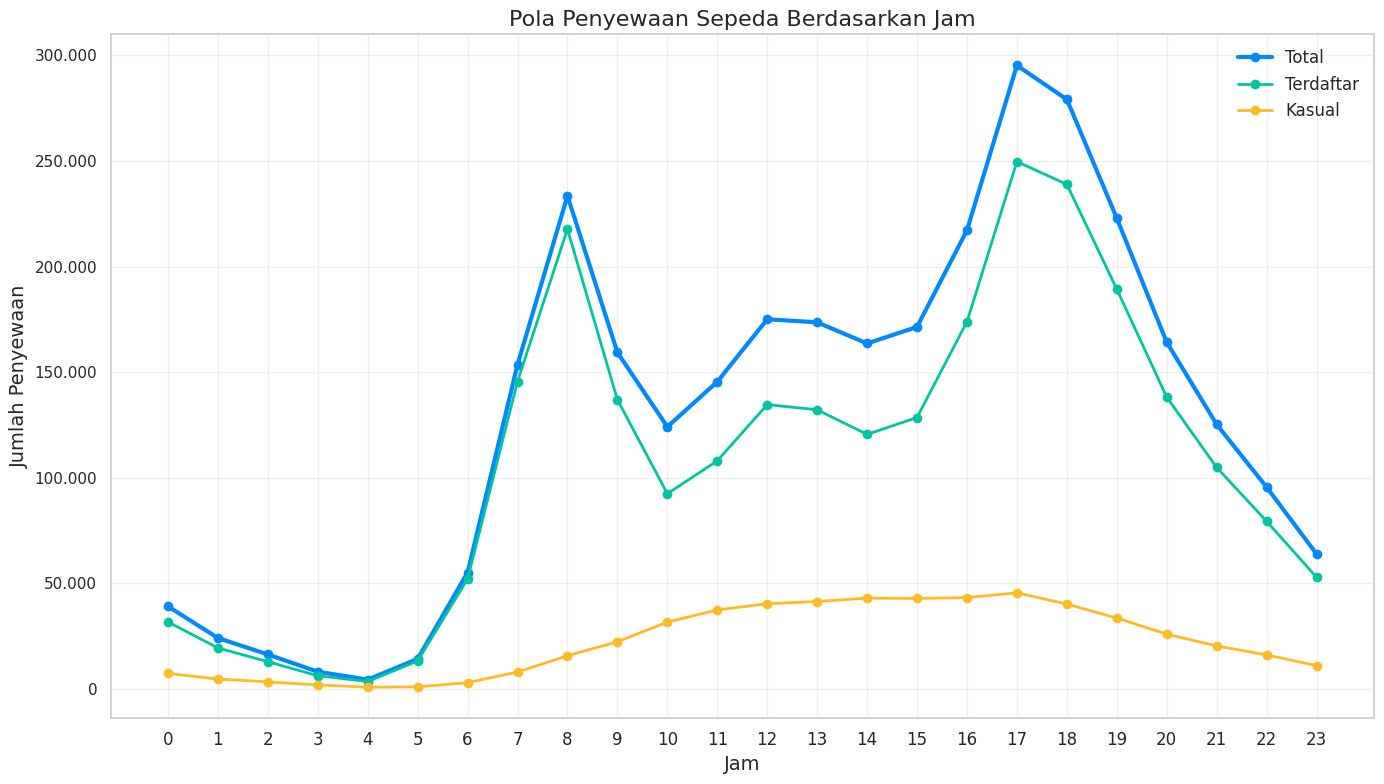

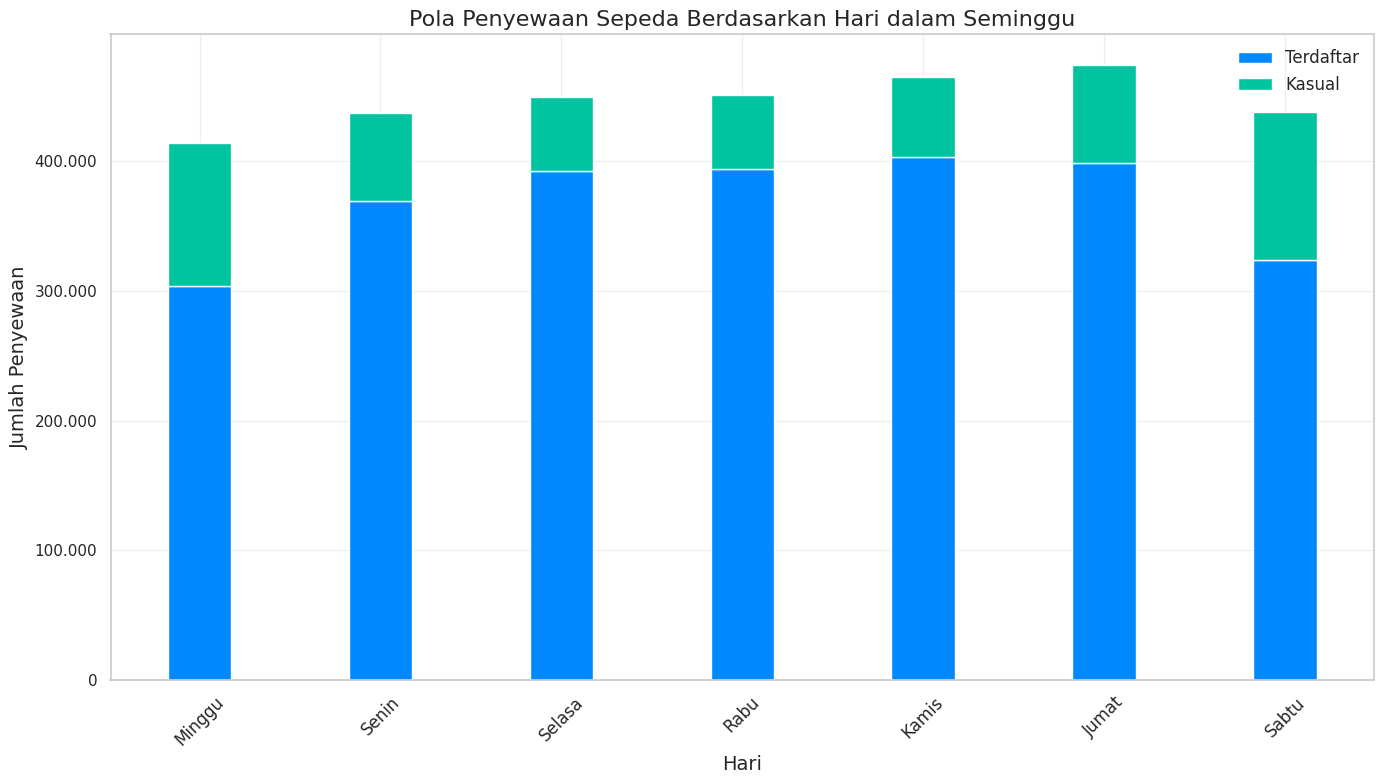

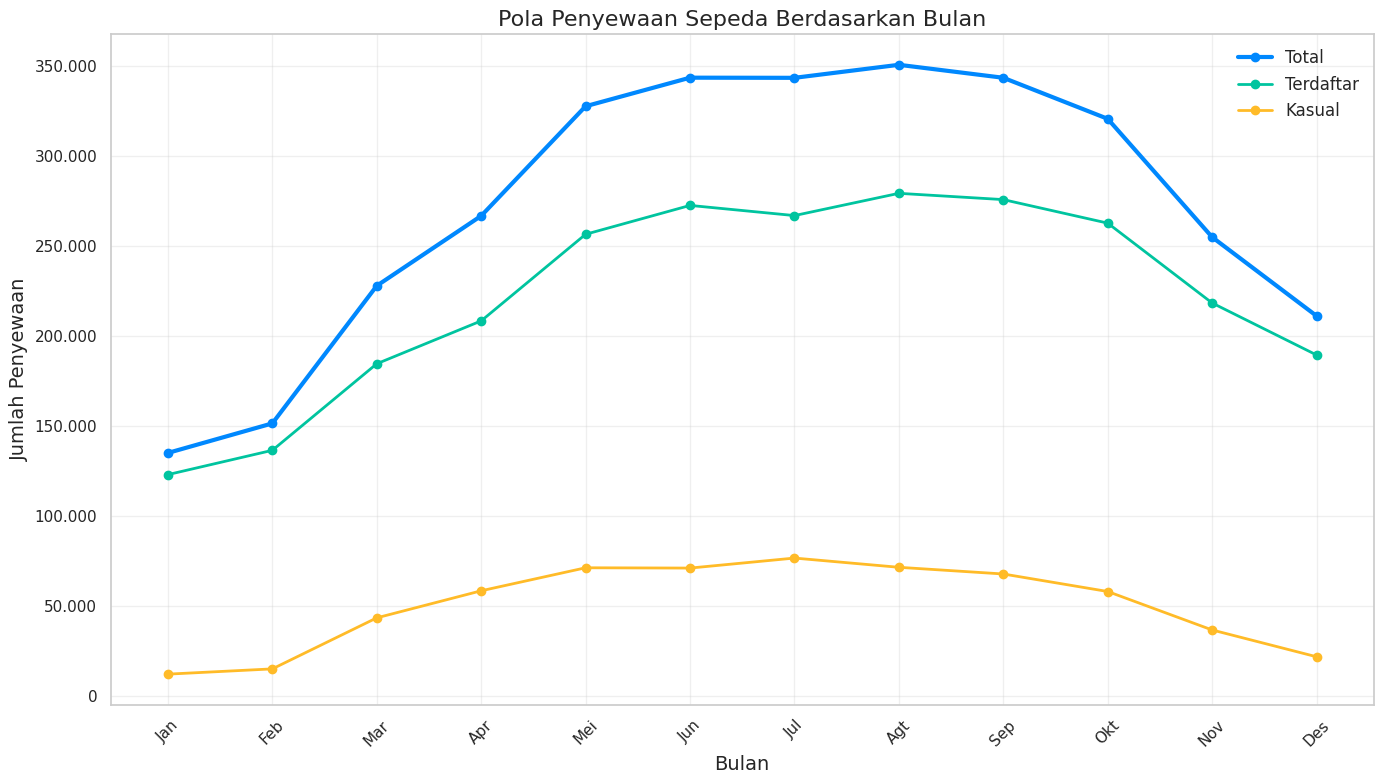

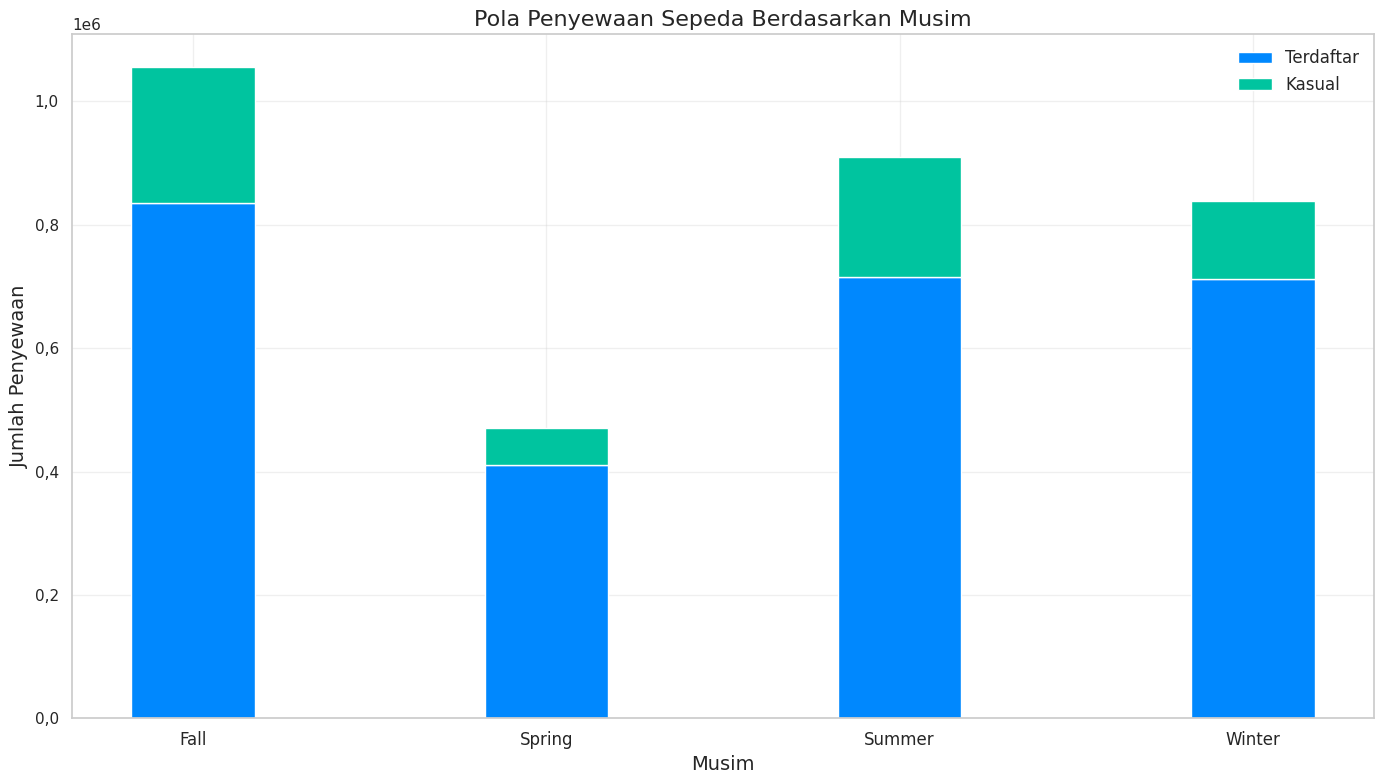

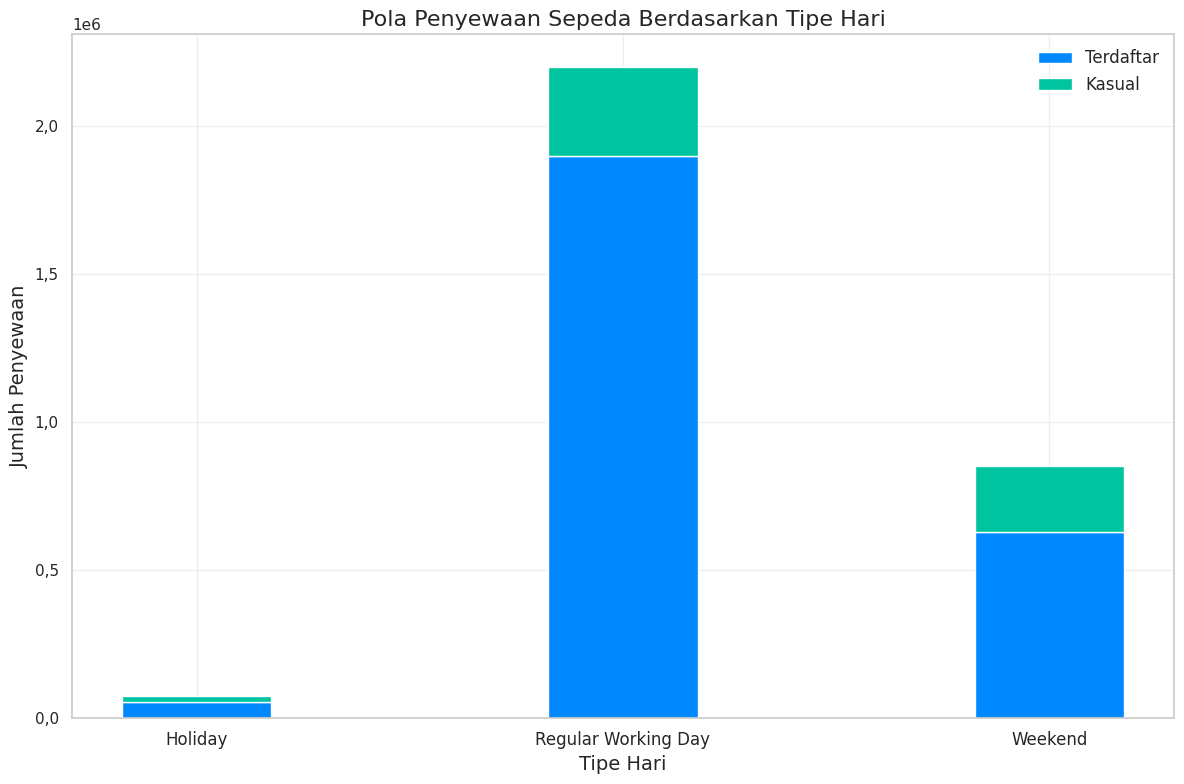

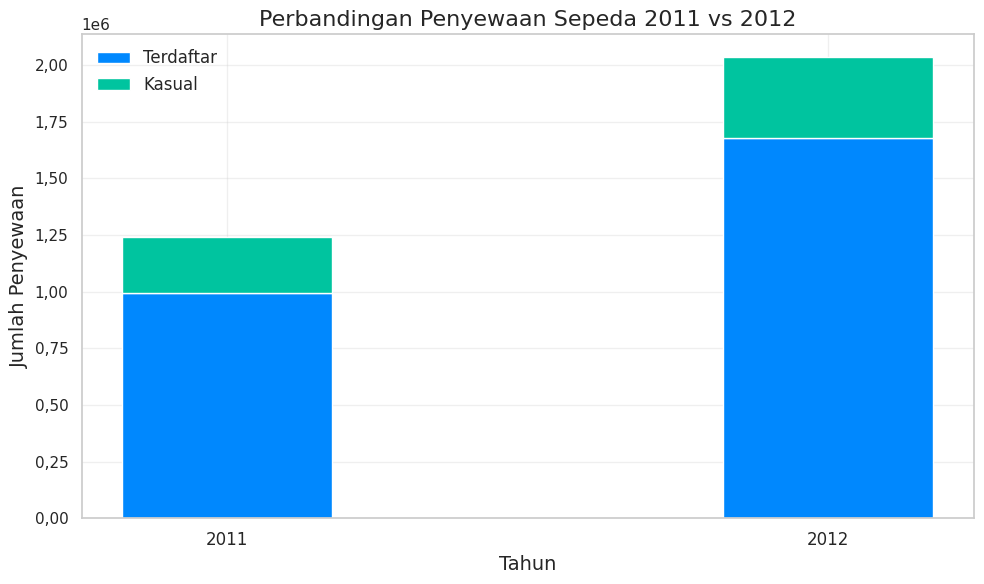

In [47]:

hourly_stats = df_hour.groupby('hr').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum',
    'casual_ratio': 'mean'
}).reset_index()


plt.figure(figsize=(14, 8))
plt.plot(hourly_stats['hr'], hourly_stats['cnt'], 'o-', color=colors[0], linewidth=3, label='Total')
plt.plot(hourly_stats['hr'], hourly_stats['registered'], 'o-', color=colors[1], linewidth=2, label='Terdaftar')
plt.plot(hourly_stats['hr'], hourly_stats['casual'], 'o-', color=colors[2], linewidth=2, label='Kasual')
plt.xlabel('Jam', fontsize=14)
plt.ylabel('Jumlah Penyewaan', fontsize=14)
plt.title('Pola Penyewaan Sepeda Berdasarkan Jam', fontsize=16)
plt.xticks(range(0, 24), fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()

# buat mapping hari dalam bahasa Indonesia
day_names = {0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'}

weekday_stats = df_hour.groupby(['weekday']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum',
    'casual_ratio': 'mean'
}).reset_index()

weekday_stats['day_name'] = weekday_stats['weekday'].map(day_names)

plt.figure(figsize=(14, 8))
x = range(len(weekday_stats))
bar_width = 0.35

plt.bar(x, weekday_stats['registered'], bar_width, color=colors[0], label='Terdaftar')
plt.bar(x, weekday_stats['casual'], bar_width, bottom=weekday_stats['registered'], color=colors[1], label='Kasual')

plt.xlabel('Hari', fontsize=14)
plt.ylabel('Jumlah Penyewaan', fontsize=14)
plt.title('Pola Penyewaan Sepeda Berdasarkan Hari dalam Seminggu', fontsize=16)
plt.xticks(x, weekday_stats['day_name'], fontsize=12, rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()

# buat mapping bulan dalam bahasa Indonesia
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'Mei', 6: 'Jun', 
              7: 'Jul', 8: 'Agt', 9: 'Sep', 10: 'Okt', 11: 'Nov', 12: 'Des'}

monthly_stats = df_day.groupby(['mnth']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum',
    'casual_ratio': 'mean'
}).reset_index()

monthly_stats['month_name'] = monthly_stats['mnth'].map(month_names)

monthly_stats = monthly_stats.sort_values('mnth')

plt.figure(figsize=(14, 8))
plt.plot(monthly_stats['month_name'], monthly_stats['cnt'], 'o-', color=colors[0], linewidth=3, label='Total')
plt.plot(monthly_stats['month_name'], monthly_stats['registered'], 'o-', color=colors[1], linewidth=2, label='Terdaftar')
plt.plot(monthly_stats['month_name'], monthly_stats['casual'], 'o-', color=colors[2], linewidth=2, label='Kasual')
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Jumlah Penyewaan', fontsize=14)
plt.title('Pola Penyewaan Sepeda Berdasarkan Bulan', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()

season_stats = df_day.groupby(['season_desc']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum',
    'casual_ratio': 'mean'
}).reset_index()

plt.figure(figsize=(14, 8))
x = range(len(season_stats))

plt.bar(x, season_stats['registered'], bar_width, color=colors[0], label='Terdaftar')
plt.bar(x, season_stats['casual'], bar_width, bottom=season_stats['registered'], color=colors[1], label='Kasual')

plt.xlabel('Musim', fontsize=14)
plt.ylabel('Jumlah Penyewaan', fontsize=14)
plt.title('Pola Penyewaan Sepeda Berdasarkan Musim', fontsize=16)
plt.xticks(x, season_stats['season_desc'], fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()

daytype_stats = df_hour.groupby('day_type').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum',
    'casual_ratio': 'mean'
}).reset_index()

plt.figure(figsize=(12, 8))
x = range(len(daytype_stats))

plt.bar(x, daytype_stats['registered'], bar_width, color=colors[0], label='Terdaftar')
plt.bar(x, daytype_stats['casual'], bar_width, bottom=daytype_stats['registered'], color=colors[1], label='Kasual')

plt.xlabel('Tipe Hari', fontsize=14)
plt.ylabel('Jumlah Penyewaan', fontsize=14)
plt.title('Pola Penyewaan Sepeda Berdasarkan Tipe Hari', fontsize=16)
plt.xticks(x, daytype_stats['day_type'], fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()

year_stats = df_day.groupby('yr').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum',
    'casual_ratio': 'mean'
}).reset_index()

year_stats['year'] = year_stats['yr'].map({0: '2011', 1: '2012'})

plt.figure(figsize=(10, 6))
x = range(len(year_stats))

plt.bar(x, year_stats['registered'], bar_width, color=colors[0], label='Terdaftar')
plt.bar(x, year_stats['casual'], bar_width, bottom=year_stats['registered'], color=colors[1], label='Kasual')

plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Jumlah Penyewaan', fontsize=14)
plt.title('Perbandingan Penyewaan Sepeda 2011 vs 2012', fontsize=16)
plt.xticks(x, year_stats['year'], fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()

growth = ((year_stats['cnt'].iloc[1] - year_stats['cnt'].iloc[0]) / year_stats['cnt'].iloc[0]) * 100
print(f"Pertumbuhan penyewaan dari 2011 ke 2012: {growth:.2f}%")

### Pertanyaan 2:

/tmp/ipykernel_63014/632779484.py:100: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_category_stats = df_hour.groupby('time_category').agg({


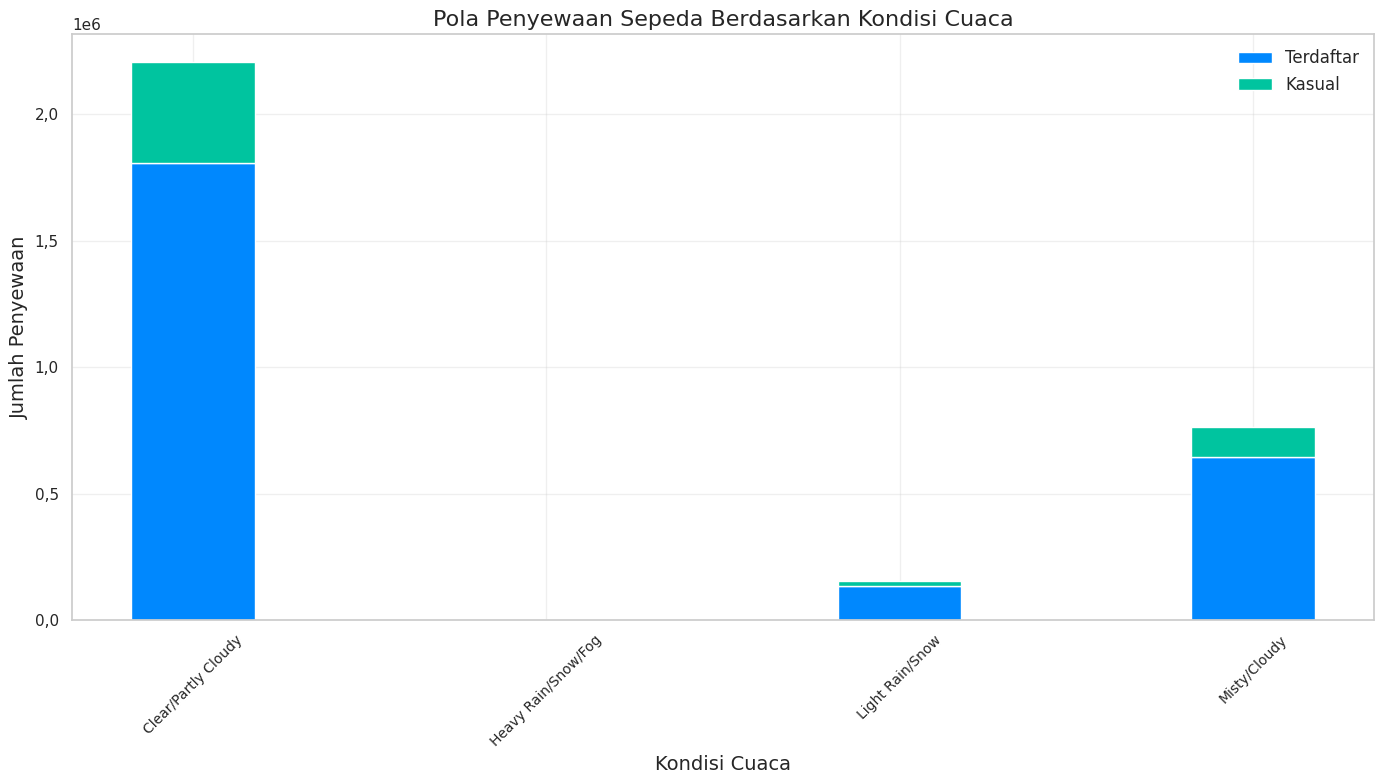

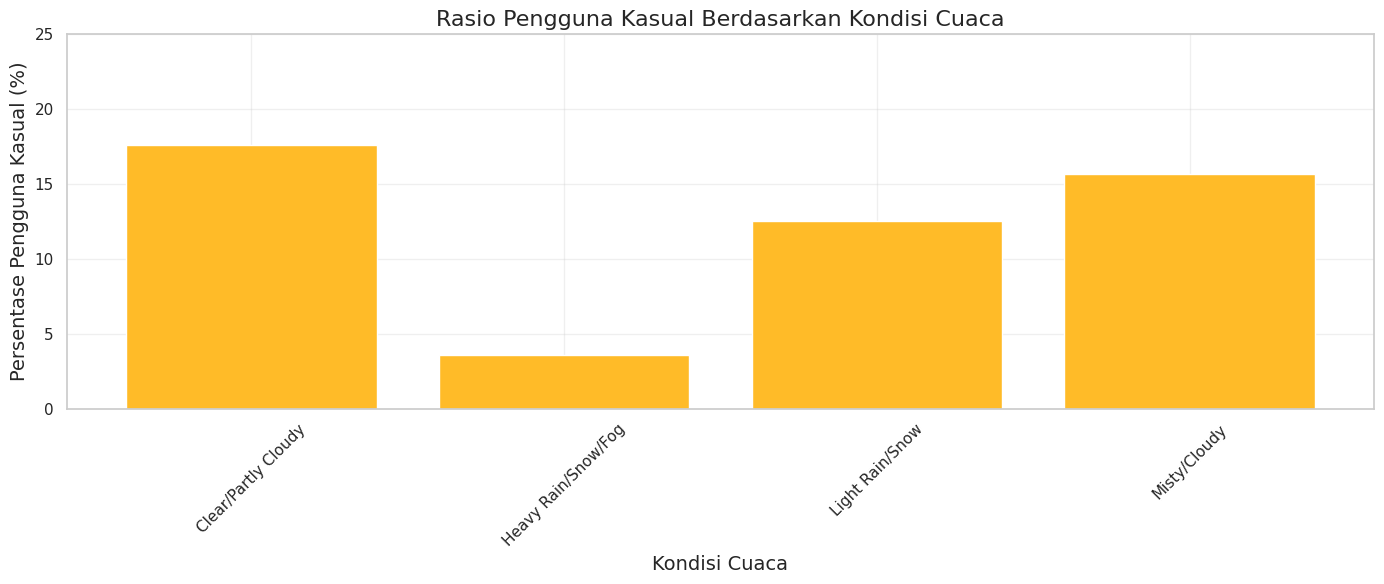

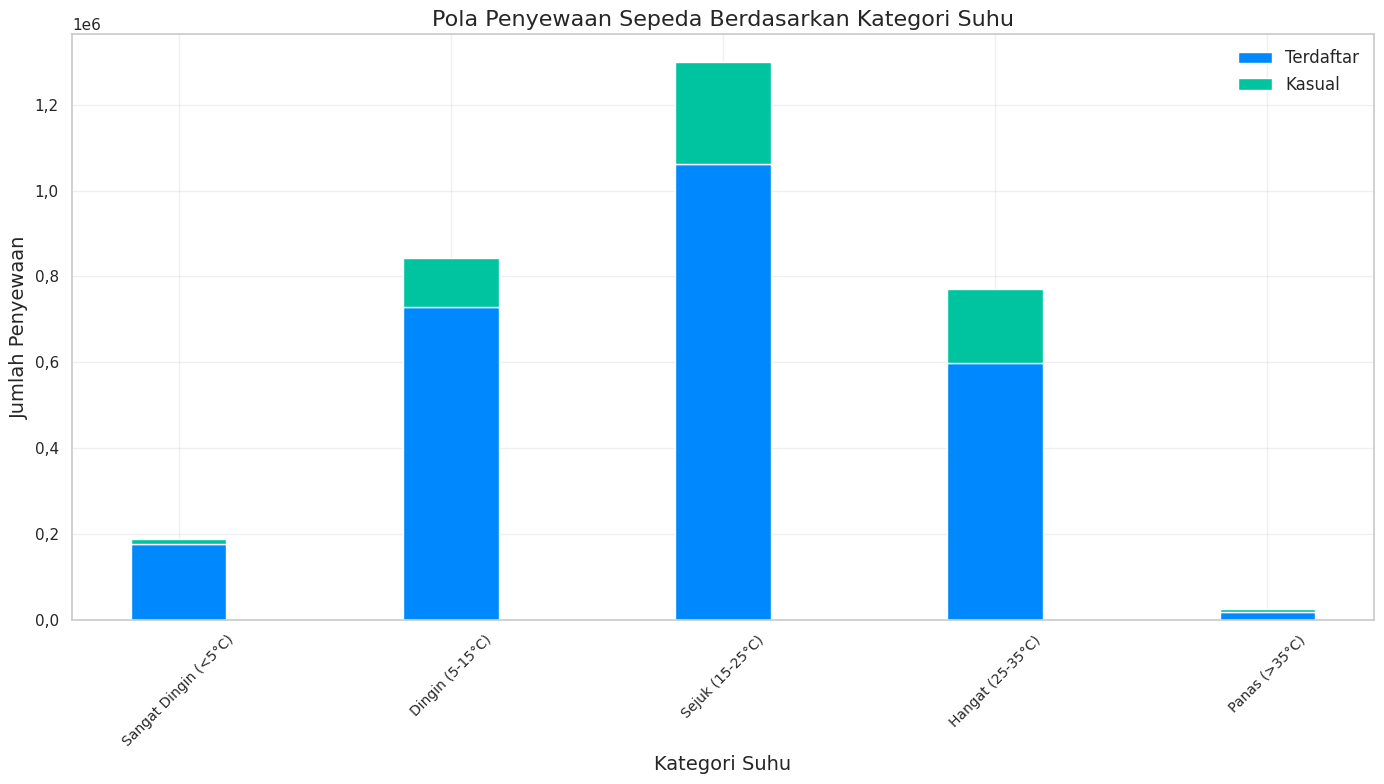

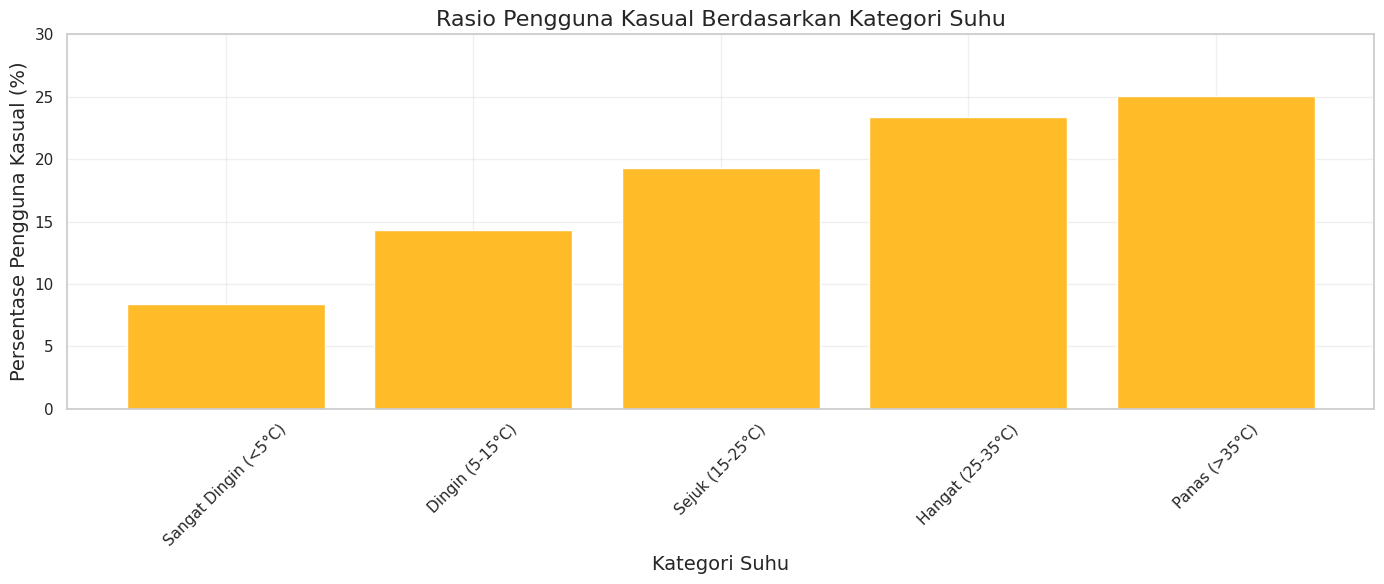

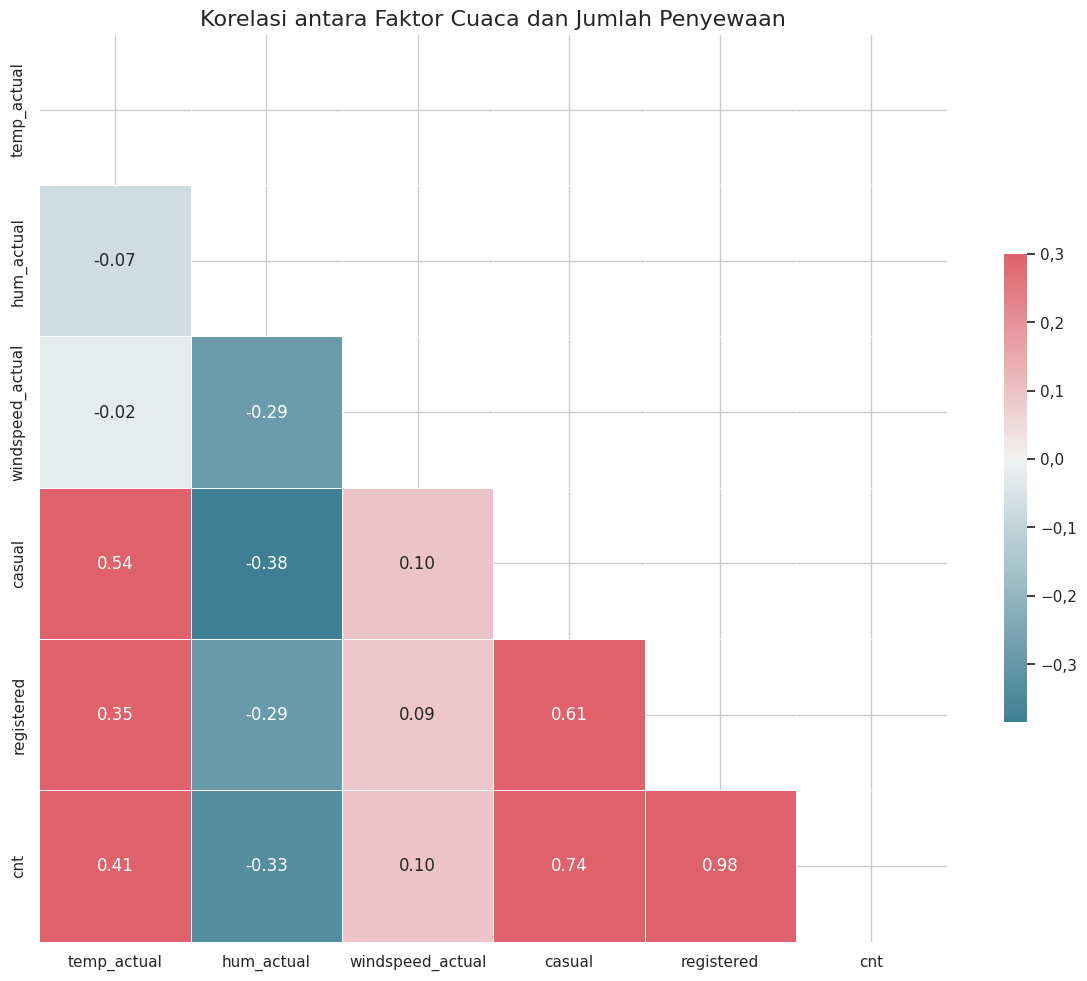

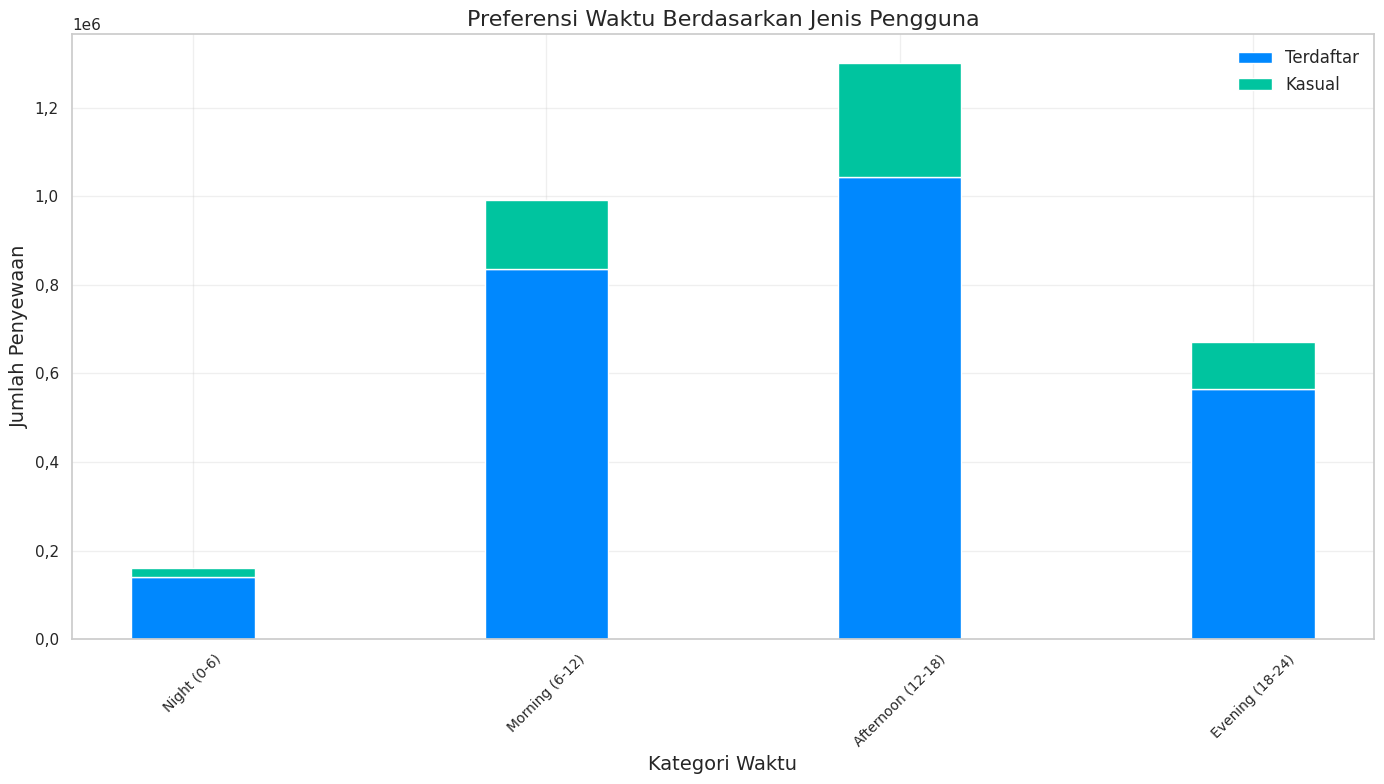

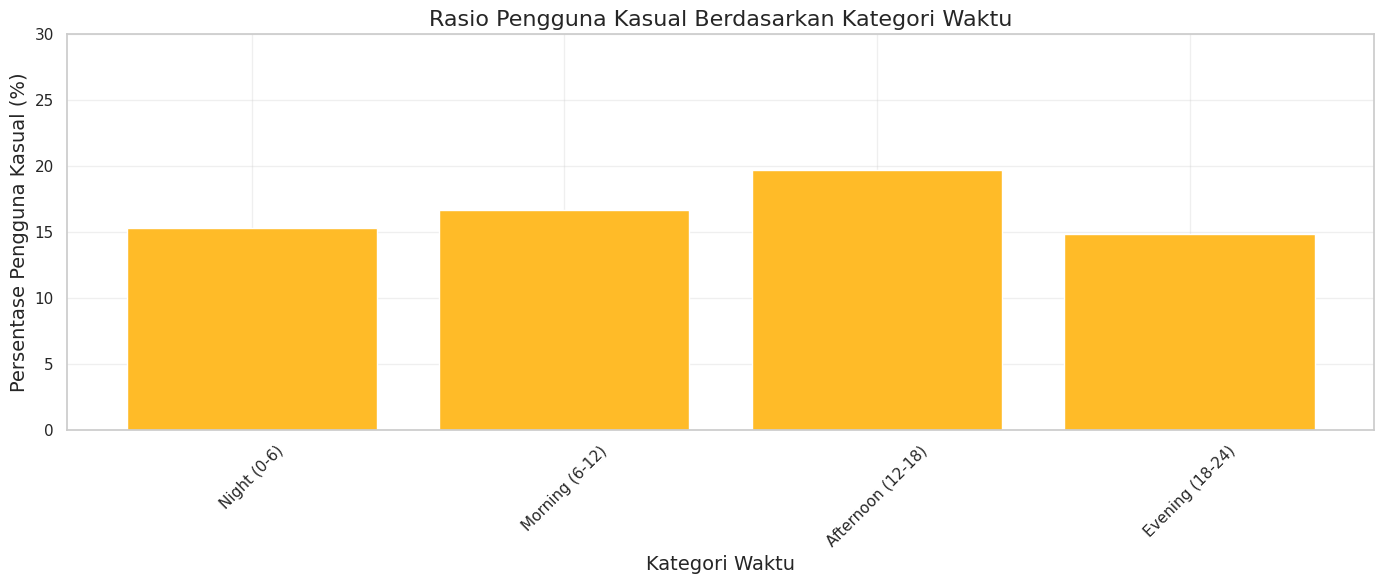

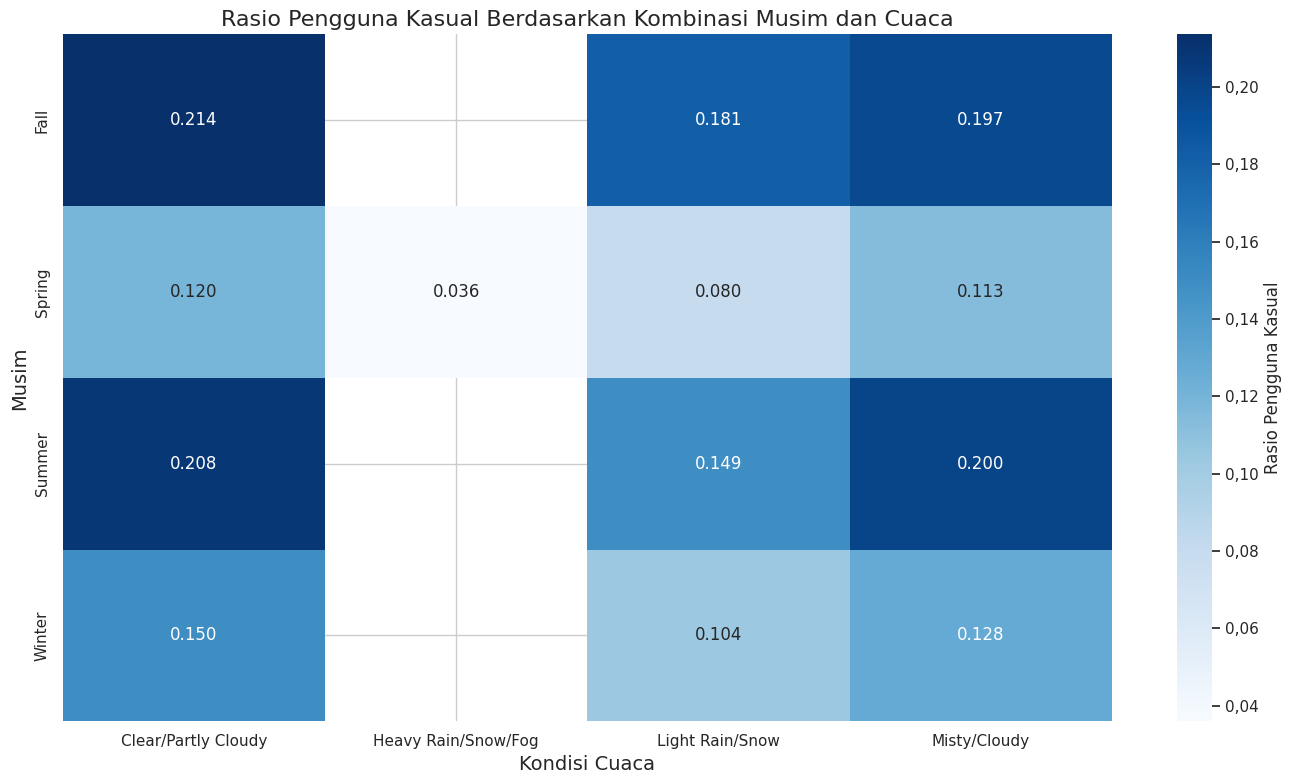

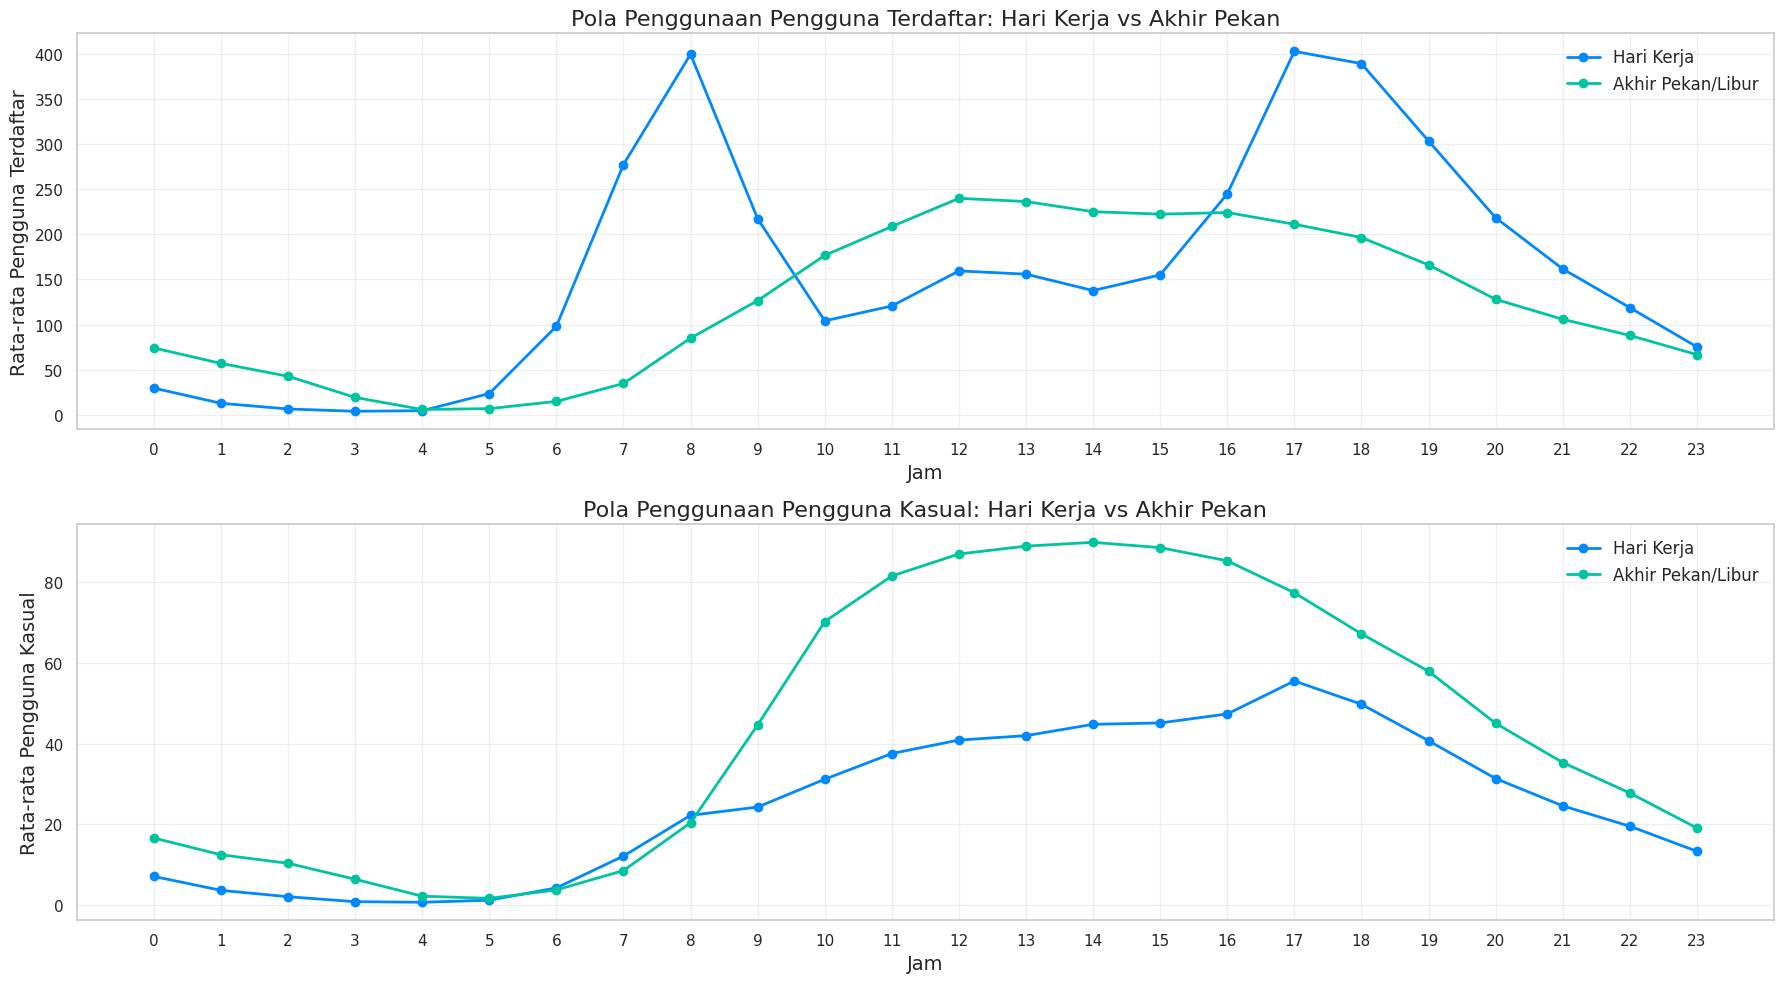

In [48]:
weather_stats = df_hour.groupby(['weather_desc']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum',
    'casual_ratio': 'mean'
}).reset_index()

plt.figure(figsize=(14, 8))
x = range(len(weather_stats))
bar_width = 0.35

plt.bar(x, weather_stats['registered'], bar_width, color=colors[0], label='Terdaftar')
plt.bar(x, weather_stats['casual'], bar_width, bottom=weather_stats['registered'], color=colors[1], label='Kasual')

plt.xlabel('Kondisi Cuaca', fontsize=14)
plt.ylabel('Jumlah Penyewaan', fontsize=14)
plt.title('Pola Penyewaan Sepeda Berdasarkan Kondisi Cuaca', fontsize=16)
plt.xticks(x, weather_stats['weather_desc'], fontsize=10, rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()

plt.figure(figsize=(14, 6))
plt.bar(weather_stats['weather_desc'], weather_stats['casual_ratio'] * 100, color=colors[2])
plt.xlabel('Kondisi Cuaca', fontsize=14)
plt.ylabel('Persentase Pengguna Kasual (%)', fontsize=14)
plt.title('Rasio Pengguna Kasual Berdasarkan Kondisi Cuaca', fontsize=16)
plt.ylim(0, 25)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()

if 'temp_category' not in df_hour.columns:
    def kategori_suhu(temp):
        if temp < 5:
            return 'Sangat Dingin (<5°C)'
        elif temp < 15:
            return 'Dingin (5-15°C)'
        elif temp < 25:
            return 'Sejuk (15-25°C)'
        elif temp < 35:
            return 'Hangat (25-35°C)'
        else:
            return 'Panas (>35°C)'
    df_hour['temp_category'] = df_hour['temp_actual'].apply(kategori_suhu)
else:
    print(f"Kategori suhu yang tersedia: {df_hour['temp_category'].unique()}")

temp_stats = df_hour.groupby('temp_category').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum',
    'casual_ratio': 'mean'
}).reset_index()

temp_order = ['Sangat Dingin (<5°C)', 'Dingin (5-15°C)', 'Sejuk (15-25°C)', 'Hangat (25-35°C)', 'Panas (>35°C)']

temp_order = [cat for cat in temp_order if cat in temp_stats['temp_category'].values]
if len(temp_order) > 0:
    temp_stats['temp_order'] = temp_stats['temp_category'].map({cat: i for i, cat in enumerate(temp_order)})
    temp_stats = temp_stats.sort_values('temp_order')


plt.figure(figsize=(14, 8))
x = range(len(temp_stats))

plt.bar(x, temp_stats['registered'], bar_width, color=colors[0], label='Terdaftar')
plt.bar(x, temp_stats['casual'], bar_width, bottom=temp_stats['registered'], color=colors[1], label='Kasual')

plt.xlabel('Kategori Suhu', fontsize=14)
plt.ylabel('Jumlah Penyewaan', fontsize=14)
plt.title('Pola Penyewaan Sepeda Berdasarkan Kategori Suhu', fontsize=16)
plt.xticks(x, temp_stats['temp_category'], fontsize=10, rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()


plt.figure(figsize=(14, 6))
plt.bar(temp_stats['temp_category'], temp_stats['casual_ratio'] * 100, color=colors[2])
plt.xlabel('Kategori Suhu', fontsize=14)
plt.ylabel('Persentase Pengguna Kasual (%)', fontsize=14)
plt.title('Rasio Pengguna Kasual Berdasarkan Kategori Suhu', fontsize=16)
plt.ylim(0, 30)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()

corr_data = df_hour[['temp_actual', 'hum_actual', 'windspeed_actual', 'casual', 'registered', 'cnt']]
correlation = corr_data.corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation, dtype=bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')
plt.title('Korelasi antara Faktor Cuaca dan Jumlah Penyewaan', fontsize=16)
plt.tight_layout()

time_category_stats = df_hour.groupby('time_category').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum',
    'casual_ratio': 'mean'
}).reset_index()

time_order = ['Malam/Dini Hari (0-6)', 'Pagi (7-11)', 'Siang (12-17)', 'Malam (18-23)']

time_order = [cat for cat in time_order if cat in time_category_stats['time_category'].values]
if len(time_order) > 0:
    time_category_stats['time_order'] = time_category_stats['time_category'].map({cat: i for i, cat in enumerate(time_order)})
    time_category_stats = time_category_stats.sort_values('time_order')

plt.figure(figsize=(14, 8))
x = range(len(time_category_stats))

plt.bar(x, time_category_stats['registered'], bar_width, color=colors[0], label='Terdaftar')
plt.bar(x, time_category_stats['casual'], bar_width, bottom=time_category_stats['registered'], color=colors[1], label='Kasual')

plt.xlabel('Kategori Waktu', fontsize=14)
plt.ylabel('Jumlah Penyewaan', fontsize=14)
plt.title('Preferensi Waktu Berdasarkan Jenis Pengguna', fontsize=16)
plt.xticks(x, time_category_stats['time_category'], fontsize=10, rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()

plt.figure(figsize=(14, 6))
plt.bar(time_category_stats['time_category'], time_category_stats['casual_ratio'] * 100, color=colors[2])
plt.xlabel('Kategori Waktu', fontsize=14)
plt.ylabel('Persentase Pengguna Kasual (%)', fontsize=14)
plt.title('Rasio Pengguna Kasual Berdasarkan Kategori Waktu', fontsize=16)
plt.ylim(0, 30)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()

season_weather_stats = df_hour.groupby(['season_desc', 'weather_desc']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum',
    'casual_ratio': 'mean'
}).reset_index()

pivot_data = season_weather_stats.pivot_table(
    values='casual_ratio', 
    index='season_desc', 
    columns='weather_desc'
)

plt.figure(figsize=(14, 8))
cmap = sns.color_palette("Blues", as_cmap=True)
ax = sns.heatmap(pivot_data, annot=True, fmt='.3f', cmap=cmap, cbar_kws={'label': 'Rasio Pengguna Kasual'})
plt.title('Rasio Pengguna Kasual Berdasarkan Kombinasi Musim dan Cuaca', fontsize=16)
plt.xlabel('Kondisi Cuaca', fontsize=14)
plt.ylabel('Musim', fontsize=14)
cbar = ax.collections[0].colorbar
cbar.set_label('Rasio Pengguna Kasual', fontsize=12)
plt.tight_layout()

workday_patterns = df_hour.groupby(['workingday', 'hr']).agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean',
    'casual_ratio': 'mean'
}).reset_index()

plt.figure(figsize=(18, 10))

plt.subplot(2, 1, 1)
plt.plot(range(24), workday_patterns[workday_patterns['workingday']==1]['registered'], 'o-', 
         color=colors[0], linewidth=2, label='Hari Kerja')
plt.plot(range(24), workday_patterns[workday_patterns['workingday']==0]['registered'], 'o-', 
         color=colors[1], linewidth=2, label='Akhir Pekan/Libur')
plt.xlabel('Jam', fontsize=14)
plt.ylabel('Rata-rata Pengguna Terdaftar', fontsize=14)
plt.title('Pola Penggunaan Pengguna Terdaftar: Hari Kerja vs Akhir Pekan', fontsize=16)
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

plt.subplot(2, 1, 2)
plt.plot(range(24), workday_patterns[workday_patterns['workingday']==1]['casual'], 'o-', 
         color=colors[0], linewidth=2, label='Hari Kerja')
plt.plot(range(24), workday_patterns[workday_patterns['workingday']==0]['casual'], 'o-', 
         color=colors[1], linewidth=2, label='Akhir Pekan/Libur')
plt.xlabel('Jam', fontsize=14)
plt.ylabel('Rata-rata Pengguna Kasual', fontsize=14)
plt.title('Pola Penggunaan Pengguna Kasual: Hari Kerja vs Akhir Pekan', fontsize=16)
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()

### 📊 **Insigt Menarik dari Visualisasi Untuk Pertanyaan 1**

##### ⏰ Pola Berdasarkan Waktu

###### 🚴‍♂️ Pola Penyewaan Per Jam (Gambar 1)
Coba perhatikan grafik jam-jam sibuk, ada cerita menarik di baliknya!

- **📈 Dua Puncak Utama**: Wow! Ada dua lonjakan besar di jam 8 pagi dan jam 5-6 sore. Ini persis seperti jam pulang-pergi kerja kebanyakan orang. Sepeda jadi andalan para komuter!

- **👨‍💼 Tipe Pengguna Berbeda**: Pengguna terdaftar mendominasi di jam-jam sibuk ini. Mereka sudah menjadikan sepeda sebagai sahabat setia untuk perjalanan kerja sehari-hari.

- **🏖️ Perilaku Pengguna Kasual**: Sedangkan para pengguna kasual lebih santai! Mereka paling banyak menyewa sepeda di siang hingga sore hari (jam 12-5), kemungkinan untuk jalan-jalan menikmati hari.

- **🌙 Penyewaan Malam Hari**: Sepinya penyewaan antara tengah malam sampai jam 5 pagi bisa jadi waktu sempurna untuk tim maintenance beraksi dan mendistribusikan ulang sepeda tanpa mengganggu pengguna.

###### 📅 Pola Mingguan (Gambar 2)
Ternyata hari dalam seminggu juga mempengaruhi cara orang menyewa sepeda!

- **🔄 Pergeseran Weekday vs Weekend**: Pengguna terdaftar cukup konsisten sepanjang minggu, tapi pengguna kasual melonjak di akhir pekan. Jelas banget bedanya!

- **🎉 Efek Jumat**: Ada peningkatan bertahap sepanjang minggu dengan puncaknya di hari Jumat. Sepertinya orang-orang sudah semangat menyambut weekend!

- **🚵‍♀️ Serbuan Weekend**: Proporsi pengguna kasual naik drastis di weekend, terutama hari Sabtu. Nampaknya banyak yang memanfaatkan sepeda untuk bersenang-senang di akhir pekan.

###### 📆 Pola Bulanan (Gambar 3)
Siklus musiman memberi tahu kita kapan orang paling suka bersepeda:

- **☀️ Puncak Musim Panas, Sepi di Musim Dingin**: Penyewaan mencapai puncaknya saat musim panas (Juni-September) dan turun drastis saat musim dingin (Desember-Februari). Masuk akal, siapa yang mau bersepeda saat dingin menggigit?

- **🏄‍♂️ Pengguna Kasual dan Musim**: Pengguna kasual sangat dipengaruhi musim! Penyewaan mereka bisa naik hingga 300% dari musim dingin ke musim panas. Itu kenaikan yang luar biasa!

- **🌱 Perilaku Musim Peralihan**: Ada kenaikan cepat di musim semi (Maret-Mei) dan penurunan lebih bertahap di musim gugur (September-November). Ini waktu tepat untuk meluncurkan kampanye marketing musiman!

###### 🍂 Pola Berdasarkan Musim (Gambar 4)
Ternyata tidak semua musim menciptakan pengalaman bersepeda yang sama:

- **🍁 Dominasi Musim Gugur**: Menariknya, musim gugur justru menunjukkan penggunaan tertinggi, bahkan sedikit melampaui musim panas! Mungkin karena suhu yang nyaman dan curah hujan yang lebih rendah.

- **🌧️ Underperformance Musim Semi**: Musim semi paling sepi, hanya sekitar setengah dari penyewaan musim gugur. Sepertinya faktor lingkungan (hujan, suhu tidak stabil) membuat orang enggan bersepeda.

- **🌞 Campuran Pengguna Berdasarkan Musim**: Proporsi pengguna kasual tertinggi di musim panas dan terendah di musim semi. Ini petunjuk penting untuk strategi marketing musiman!

###### 📊 Analisis Berdasarkan Tipe Hari (Gambar 5)
Jenis hari ternyata sangat mempengaruhi pola penyewaan:

- **👔 Dominasi Hari Kerja**: Hari kerja biasa menyumbang lebih dari dua pertiga total penyewaan. Ini menunjukkan betapa pentingnya segmen komuter bagi bisnis ini.

- **🎡 Penggunaan Rekreasi di Akhir Pekan**: Akhir pekan menunjukkan proporsi pengguna kasual yang lebih tinggi dibanding hari kerja. Ini mempertegas bahwa ada pola penggunaan berbeda antar tipe pengguna.

- **🎁 Rendahnya Penggunaan saat Libur**: Hari libur justru menunjukkan volume penyewaan terendah. Ini kesempatan emas untuk promosi spesial yang bisa mendongkrak penggunaan sepeda saat libur!

###### 📈 Pertumbuhan Year-over-Year (Gambar 6)
Perbandingan antara tahun 2011 dan 2012 menunjukkan bisnis yang berkembang pesat:

- **🚀 Pertumbuhan Total yang Signifikan**: Total penyewaan meningkat sekitar 60% dari 2011 ke 2012. Wah, adopsi pasar yang sangat kuat!

- **💪 Akselerasi Pengguna Terdaftar**: Pertumbuhan utamanya didorong oleh pengguna terdaftar. Ini menandakan keberhasilan mengubah pengguna kasual menjadi pelanggan tetap.

- **💯 Model Bisnis Berkelanjutan**: Pertumbuhan yang lebih kuat pada pengguna terdaftar dibanding pengguna kasual menunjukkan bisnis yang semakin matang dengan loyalitas pelanggan yang meningkat.

##### 💡 Implikasi Strategis

Visualisasi ini menjawab pertanyaan penelitian pertama tentang bagaimana faktor waktu dan musim mempengaruhi permintaan penyewaan sepeda. Ada beberapa strategi potensial yang bisa diterapkan:

1. **🔄 Distribusi Armada Dinamis**: Realokasikan sepeda untuk mengimbangi pola dua puncak di hari kerja dan pola puncak tunggal di akhir pekan.

2. **🌦️ Manajemen Inventaris Berbasis Cuaca**: Sesuaikan ketersediaan armada berdasarkan pola musiman, potensial mengurangi biaya operasional selama bulan-bulan permintaan rendah di musim dingin.

3. **🎯 Marketing Tepat Sasaran**: Kembangkan kampanye terpisah untuk komuter (tekankan keandalan dan ketersediaan selama jam sibuk) dan pengguna kasual (sorot rute rekreasi dan pengalaman akhir pekan).

4. **💰 Optimasi Harga**: Pertimbangkan strategi harga berbasis waktu dan musim untuk meratakan puncak permintaan dan meningkatkan penggunaan saat periode sepi.

5. **📊 Perencanaan Pertumbuhan**: Fokuskan investasi modal untuk mendukung pertumbuhan berkelanjutan pengguna terdaftar sambil menciptakan jalur untuk mengkonversi pengguna kasual menjadi terdaftar.


### 🌦️ **Insight Menarik: Hubungan Cuaca dengan Perilaku Pengguna Sepeda Untuk Pertanyaan 2**

#### 🌤️ Pengaruh Kondisi Cuaca pada Penyewaan (Gambar 1 & 2)

##### ☀️ Cuaca Cerah, Sepeda Laris!
Data menunjukkan pola menarik yang sangat jelas tentang bagaimana cuaca mempengaruhi penyewaan sepeda:

- **📈 Cuaca Cerah Mendominasi**: Wah, lihat betapa dominannya penyewaan saat cuaca cerah/berawan sebagian! Angkanya jauh melampaui kondisi cuaca lainnya. Ini menunjukkan bahwa mayoritas orang memilih bersepeda saat langit bersahabat.

- **☔ Hindari Hujan Deras**: Hampir tidak ada sepeda yang disewa saat hujan deras/salju/kabut. Ini masuk akal karena kondisi tersebut tidak hanya tidak nyaman tapi juga berbahaya untuk bersepeda.

- **🧐 Berkabut Masih OK**: Menariknya, kondisi berkabut/berawan masih cukup populer untuk penyewaan sepeda, menempati posisi kedua setelah cuaca cerah.

- **🔍 Persentase Pengguna Kasual**: Grafik kedua memberi insight menarik - persentase pengguna kasual tertinggi justru saat cuaca cerah (hampir 18%)! Ini mengonfirmasi bahwa pengguna kasual sangat selektif terhadap cuaca.

- **🌧️ Sensitivitas Pengguna Kasual**: Perhatikan betapa rendahnya persentase pengguna kasual saat hujan deras (hanya sekitar 3.5%). Ini mengindikasikan pengguna kasual jauh lebih sensitif terhadap kondisi cuaca buruk dibanding pengguna terdaftar.

#### 🌡️ Suhu dan Perilaku Penyewaan (Gambar 3 & 4)

##### 🔥 Suhu Ideal untuk Bersepeda

Hubungan antara suhu dan penyewaan sepeda sangat mengungkapkan preferensi pengguna:

- **🏆 Suhu Sedang Juara!**: Penyewaan tertinggi terjadi pada rentang suhu 15-25°C - ini adalah sweet spot yang nyaman untuk bersepeda tanpa kepanasan atau kedinginan.

- **🥶 Dingin = Sepi**: Suhu di bawah 5°C menunjukkan penyewaan yang sangat rendah. Jelas orang enggan bersepeda saat udara menggigit.

- **🌡️ Terlalu Panas Juga Tidak Disukai**: Menariknya, suhu ekstrem di atas 35°C juga menunjukkan penurunan drastis dalam penyewaan. Ini mengingatkan bahwa bersepeda saat terlalu panas sama tidak nyamannya dengan saat terlalu dingin.

- **📊 Tren Pengguna Kasual vs Suhu**: Perhatikan tren yang sangat jelas pada Gambar 4 - semakin tinggi suhu, semakin tinggi persentase pengguna kasual! Ini menunjukkan pengguna kasual sangat dipengaruhi oleh kenyamanan suhu.

- **🧠 Psikologi Pengguna**: Pada suhu sangat dingin (<5°C), pengguna kasual hanya sekitar 8%, namun pada suhu panas (>35°C), mereka mencapai 25%! Ini menunjukkan pengguna kasual lebih toleran terhadap panas daripada dingin.

#### 📊 Korelasi Faktor Cuaca (Gambar 5)

##### 🔍 Apa yang Sebenarnya Mempengaruhi Penyewaan?

Peta panas korelasi mengungkapkan hubungan menarik antara faktor cuaca dan penyewaan:

- **🌡️ Suhu Berdampak Positif**: Korelasi positif (0.41) antara suhu dan total penyewaan (cnt) menunjukkan bahwa suhu yang lebih tinggi umumnya meningkatkan penyewaan.

- **💧 Kelembapan Menurunkan Minat**: Korelasi negatif (-0.33) antara kelembapan dan total penyewaan mengonfirmasi bahwa udara lembap membuat orang enggan bersepeda.

- **🌬️ Angin Kurang Berpengaruh**: Kecepatan angin memiliki korelasi kecil positif (0.10) dengan penyewaan, menunjukkan faktor ini tidak terlalu mempengaruhi keputusan pengguna.

- **😮 Pengguna Kasual Lebih Sensitif terhadap Suhu**: Korelasi suhu dengan pengguna kasual (0.54) lebih tinggi dibanding dengan pengguna terdaftar (0.35), membuktikan bahwa pengguna kasual lebih dipengaruhi oleh kondisi suhu.

- **🧐 Pengguna Kasual Lebih Terganggu Kelembapan**: Korelasi negatif kelembapan dengan pengguna kasual (-0.38) lebih kuat dibanding dengan pengguna terdaftar (-0.29), menunjukkan pengguna kasual lebih menghindari udara lembap.

#### ⏰ Preferensi Waktu Berdasarkan Jenis Pengguna (Gambar 6 & 7)

##### 🕐 Kapan Orang Suka Bersepeda?

Perbedaan preferensi waktu antara kedua jenis pengguna sangat menarik:

- **🌞 Puncak di Sore Hari**: Penyewaan tertinggi terjadi pada periode sore (12-18), diikuti oleh periode pagi (6-12). Ini menunjukkan orang lebih suka bersepeda saat matahari sudah tinggi.

- **🌙 Malam Hari Sepi**: Periode malam (0-6) menunjukkan penyewaan terendah, yang masuk akal karena alasan keamanan dan visibilitas.

- **📊 Rasio Pengguna Kasual Tertinggi Sore Hari**: Gambar 7 menunjukkan bahwa persentase pengguna kasual tertinggi adalah saat sore hari (hampir 20%). Ini mengonfirmasi bahwa pengguna kasual cenderung menyewa untuk aktivitas rekreasi di waktu senggang.

- **🔄 Konsistensi Pengguna Kasual di Malam Hari**: Menariknya, rasio pengguna kasual di malam hari (15%) tidak jauh berbeda dari periode lainnya. Ini menunjukkan bahwa meskipun total penyewaan rendah di malam hari, proporsi tipe pengguna relatif konsisten.

#### 🏙️ Musim + Cuaca: Kombinasi Sempurna (Gambar 8)

##### 🎯 Kapan Pengguna Kasual Paling Banyak?

Peta panas ini memberi wawasan mendalam tentang kombinasi faktor yang mempengaruhi pengguna kasual:

- **🍁 Musim Gugur yang Cerah = Favorit**: Rasio pengguna kasual tertinggi (21.4%) terjadi pada musim gugur dengan cuaca cerah/berawan sebagian. Kombinasi suhu nyaman dan pemandangan indah musim gugur tampaknya sangat menarik bagi pengguna kasual.

- **☀️ Musim Panas yang Cerah Juga Populer**: Musim panas dengan cuaca cerah menempati posisi kedua (20.8%), menunjukkan bahwa liburan musim panas adalah waktu populer untuk penyewaan kasual.

- **❄️ Hindari Musim Semi Berhujan**: Rasio terendah (3.6%) terjadi pada musim semi dengan hujan deras/salju/kabut. Kombinasi cuaca buruk dan kemungkinan suhu yang masih dingin di awal musim semi membuat pengguna kasual menghindari periode ini.

- **🧠 Implikasi Bisnis**: Peta panas ini memberikan insight berharga untuk perencanaan promosi dan alokasi sumber daya. Fokus pada pengguna kasual harus ditingkatkan saat musim gugur dan musim panas, terutama saat cuaca diperkirakan cerah.

#### 📅 Pola Penggunaan: Hari Kerja vs Akhir Pekan (Gambar 9)

##### 🔍 Dua Pola Penggunaan yang Sangat Berbeda

Perbandingan pola penggunaan antara hari kerja dan akhir pekan/libur sangat kontras:

- **🏢 Pengguna Terdaftar = Komuter**: Pola pengguna terdaftar pada hari kerja menunjukkan dua puncak tajam di jam 8 pagi dan 17-18 sore, yang persis sesuai dengan jam pergi-pulang kerja. Ini membuktikan bahwa pengguna terdaftar kebanyakan menggunakan sepeda untuk transportasi komuter.

- **🏖️ Akhir Pekan untuk Rekreasi**: Pada akhir pekan/libur, pola pengguna terdaftar berubah drastis menjadi satu kurva lebar dengan puncak di siang-sore hari, menunjukkan penggunaan untuk rekreasi.

- **🧩 Pengguna Kasual Konsisten**: Pengguna kasual memiliki pola yang lebih konsisten antara hari kerja dan akhir pekan - keduanya menunjukkan puncak di siang-sore hari, meskipun volume pada akhir pekan hampir dua kali lipat dari hari kerja.

- **🌙 Malam Minggu Lebih Ramai**: Perhatikan bahwa penyewaan sepeda oleh pengguna kasual di malam hari (0-6) pada akhir pekan lebih tinggi dibanding hari kerja, menunjukkan aktivitas malam yang lebih banyak di akhir pekan.

#### 💡 Implikasi Strategis untuk Pengembangan Bisnis

Visualisasi ini menjawab pertanyaan penelitian kedua tentang perbedaan pola penggunaan antara pengguna kasual dan terdaftar berdasarkan kondisi cuaca. Beberapa strategi yang dapat diterapkan:

1. **🎯 Pemasaran Berbasis Cuaca**: Luncurkan kampanye promosi untuk pengguna kasual saat prakiraan cuaca menunjukkan kondisi ideal (cerah dengan suhu 15-25°C), terutama di musim gugur dan musim panas.

2. **💰 Harga Dinamis**: Terapkan sistem harga yang lebih rendah saat hujan ringan atau kondisi kurang ideal lainnya untuk mendorong penggunaan oleh pengguna kasual yang biasanya menghindari kondisi tersebut.

3. **🔄 Strategi Konversi**: Fokuskan upaya mengkonversi pengguna kasual menjadi terdaftar selama periode transisi musim (akhir musim panas ke musim gugur) saat keduanya aktif bersepeda.

4. **🏙️ Distribusi Armada Berbasis Preferensi**: Pada akhir pekan, pastikan lebih banyak sepeda tersedia di area rekreasi dan tempat wisata untuk mengakomodasi lonjakan pengguna kasual. Pada hari kerja, fokus pada jalur komuter untuk pengguna terdaftar.

5. **🌦️ Fasilitas Perlindungan Cuaca**: Investasikan dalam tempat parkir sepeda beratap atau fasilitas pengeringan di lokasi-lokasi strategis untuk mengatasi hambatan utama penyewaan - kelembapan dan hujan.

Wawasan ini memberikan gambaran komprehensif tentang bagaimana cuaca mempengaruhi pola penggunaan sepeda, dengan perbedaan nyata antara pengguna kasual dan terdaftar. Dengan memanfaatkan pemahaman ini, layanan bike sharing dapat mengoptimalkan operasional dan strategi pemasaran mereka untuk meningkatkan penggunaan di semua kondisi cuaca!

## Analisis Lanjutan (Opsional)

### 🎯 **Tujuan Analisis Clustering dalam Bike Sharing**  

Analisis clustering dilakukan untuk **mengidentifikasi pola penggunaan sepeda berdasarkan faktor waktu, musim, dan tipe pengguna**. Dengan mengetahui kelompok-kelompok utama, operator bike sharing dapat **mengoptimalkan layanan dan strategi bisnis**.  

#### 🔹 **Tujuan Utama:**  
1️⃣ **Mengelompokkan pola penyewaan sepeda** berdasarkan hari kerja, akhir pekan, musim, serta rasio pengguna kasual dan terdaftar.  
2️⃣ **Mengidentifikasi faktor utama yang mempengaruhi permintaan** rental sepeda, termasuk suhu, musim, dan hari dalam seminggu.  
3️⃣ **Menyesuaikan strategi promosi dan operasional** dengan memahami tren penggunaan di berbagai kondisi.  
4️⃣ **Menganalisis perbedaan kebutuhan antara pengguna kasual dan terdaftar**, sehingga dapat disusun program yang lebih sesuai.  
5️⃣ **Meningkatkan efisiensi layanan bike sharing**, misalnya dengan menyesuaikan jumlah sepeda di lokasi tertentu sesuai pola permintaan.  

#### 🚀 **Implementasi Berdasarkan Insight Clustering:**  
📌 **Optimalisasi layanan akhir pekan:**  
   - Penyewaan meningkat signifikan saat **musim gugur dan suhu nyaman (~20°C)** → Perlu promosi khusus bagi pengguna kasual.  
   - Penyewaan tetap tinggi meskipun musim dingin → Bisa dikaitkan dengan event atau promo khusus.  

📌 **Peningkatan penggunaan di hari kerja:**  
   - Hari kerja didominasi pengguna **terdaftar**, terutama sebagai transportasi rutin → Bisa ditingkatkan dengan **diskon langganan** atau **rute yang lebih efisien**.  

📌 **Adaptasi strategi musim dingin dan transisi musim:**  
   - Penyewaan tetap berjalan meskipun suhu lebih rendah → Dapat disediakan layanan **pendukung seperti rute yang lebih aman atau sepeda yang lebih nyaman untuk cuaca dingin**.  

Dengan memahami pola ini, operator bike sharing dapat **mengembangkan strategi berbasis data** untuk meningkatkan efisiensi dan pengalaman pengguna. 🚲✨  


In [49]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Menyiapkan data untuk clustering: pola penyewaan sepeda sepanjang 24 jam untuk setiap hari unik
# Bentuk data sebagai pivot table dengan tanggal sebagai indeks dan jam sebagai kolom
daily_hourly_pattern = df_hour.pivot_table(
    index='dteday',
    columns='hr',
    values='cnt',
    aggfunc='sum'
).fillna(0)

Standarisasi data untuk clustering

In [50]:
scaler = StandardScaler()
daily_pattern_scaled = scaler.fit_transform(daily_hourly_pattern)

Biar Optimal Kita Cari Elbow Method

In [51]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(daily_pattern_scaled)
    inertia.append(kmeans.inertia_)

Lanjut kita plot

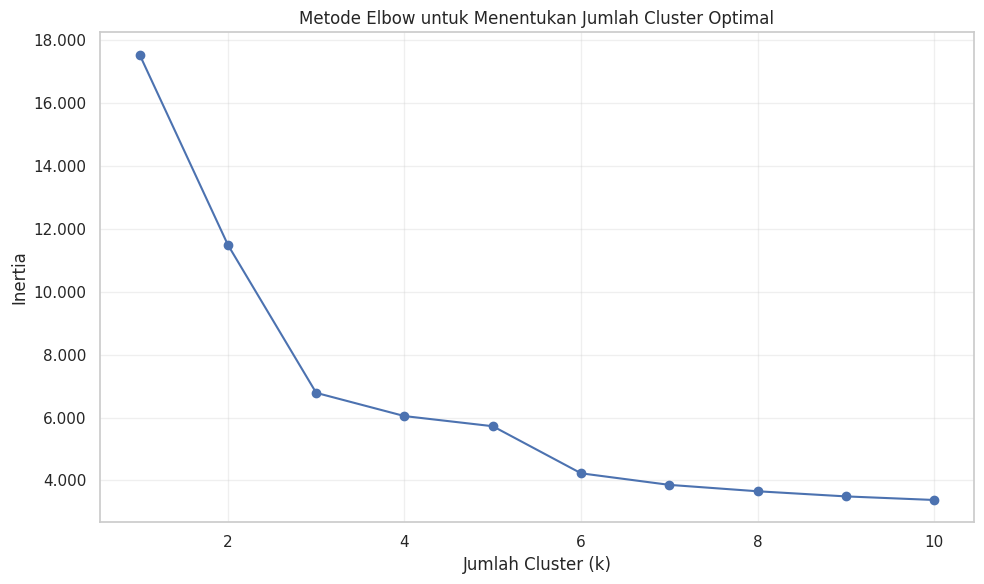

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.grid(True, alpha=0.3)
plt.tight_layout()

Dari hasil elbow tampak bahwa setelah k = 3 atau k = 4, penurunan inertia tidak lagi terlalu tajam. Jadi, jumlah cluster optimal kemungkinan besar adalah k = 3 atau k = 4. Karena saya ingin lebih banyak segmentasi, maka saya pilih k = 4.

lanjut kita mulai Kmeans

In [53]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(daily_pattern_scaled)

Jangan lupa tambah label cluster ke data

In [54]:
daily_hourly_pattern['cluster'] = cluster_labels

Gabung dengan data harian untuk analisis lebih lanjut

In [55]:
df_day_copy = df_day.copy()
df_day_copy['dteday'] = pd.to_datetime(df_day_copy['dteday'])
df_day_copy.set_index('dteday', inplace=True)
df_day_copy['cluster'] = daily_hourly_pattern['cluster']

Lanjut analisis karakteristik setiap cluster

In [56]:
cluster_profiles = df_day_copy.groupby('cluster').agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean',
    'casual_ratio': 'mean',
    'temp_actual': 'mean',
    'is_weekend': 'mean',
    'season': lambda x: x.mode().iloc[0],
    'weathersit': lambda x: x.mode().iloc[0]
}).reset_index()

Deskripsi dan profil cluster

In [57]:
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_map = {1: 'Clear/Partly Cloudy', 2: 'Mist/Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}

cluster_profiles['season_desc'] = cluster_profiles['season'].map(season_map)
cluster_profiles['weather_desc'] = cluster_profiles['weathersit'].map(weather_map)
cluster_profiles['weekend_pct'] = cluster_profiles['is_weekend'] * 100

In [58]:
print("Profil Cluster Hari Berdasarkan Pola Penyewaan:")
print(cluster_profiles[['cluster', 'cnt', 'casual', 'registered', 'casual_ratio', 
                        'temp_actual', 'weekend_pct', 'season_desc', 'weather_desc']])

Profil Cluster Hari Berdasarkan Pola Penyewaan:
   cluster          cnt       casual   registered  casual_ratio  temp_actual  \
0        0  3625.804878  1087.378049  2538.426829      0.290471    12.880586   
1        1  5571.375358   778.836676  4792.538682      0.137573    19.069573   
2        2  2155.965000   235.380000  1920.585000      0.113313     7.047522   
3        3  6023.380000  1945.400000  4077.980000      0.322976    20.509418   

   weekend_pct season_desc         weather_desc  
0    90.243902      Winter  Clear/Partly Cloudy  
1     0.000000        Fall  Clear/Partly Cloudy  
2    20.000000      Spring  Clear/Partly Cloudy  
3    96.000000        Fall  Clear/Partly Cloudy  


Visual rata-rata perjam untuk setiap cluster

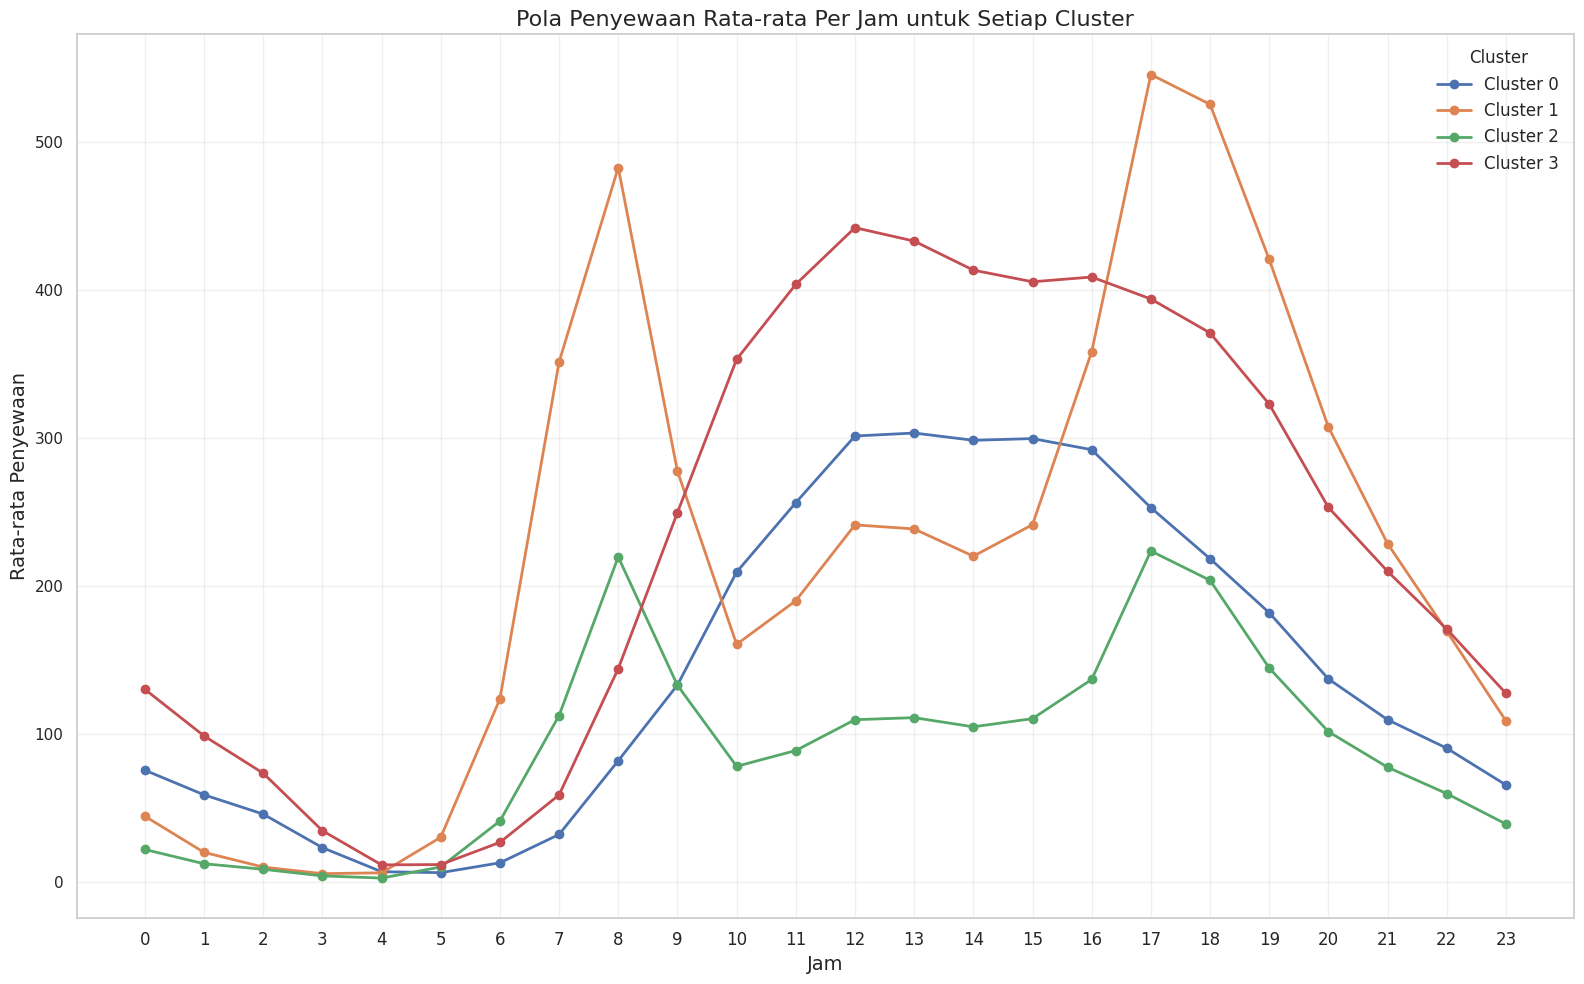

In [59]:
plt.figure(figsize=(16, 10))
for i in range(k):
    cluster_days = daily_hourly_pattern[daily_hourly_pattern['cluster'] == i].drop('cluster', axis=1)
    avg_pattern = cluster_days.mean()
    plt.plot(avg_pattern.index, avg_pattern.values, 'o-', linewidth=2, label=f'Cluster {i}')

plt.xlabel('Jam', fontsize=14)
plt.ylabel('Rata-rata Penyewaan', fontsize=14)
plt.title('Pola Penyewaan Rata-rata Per Jam untuk Setiap Cluster', fontsize=16)
plt.xticks(range(0, 24), fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12, title='Cluster')
plt.tight_layout()

Visualisasi distribusi cluster berdasarkan tipe hari dan musim

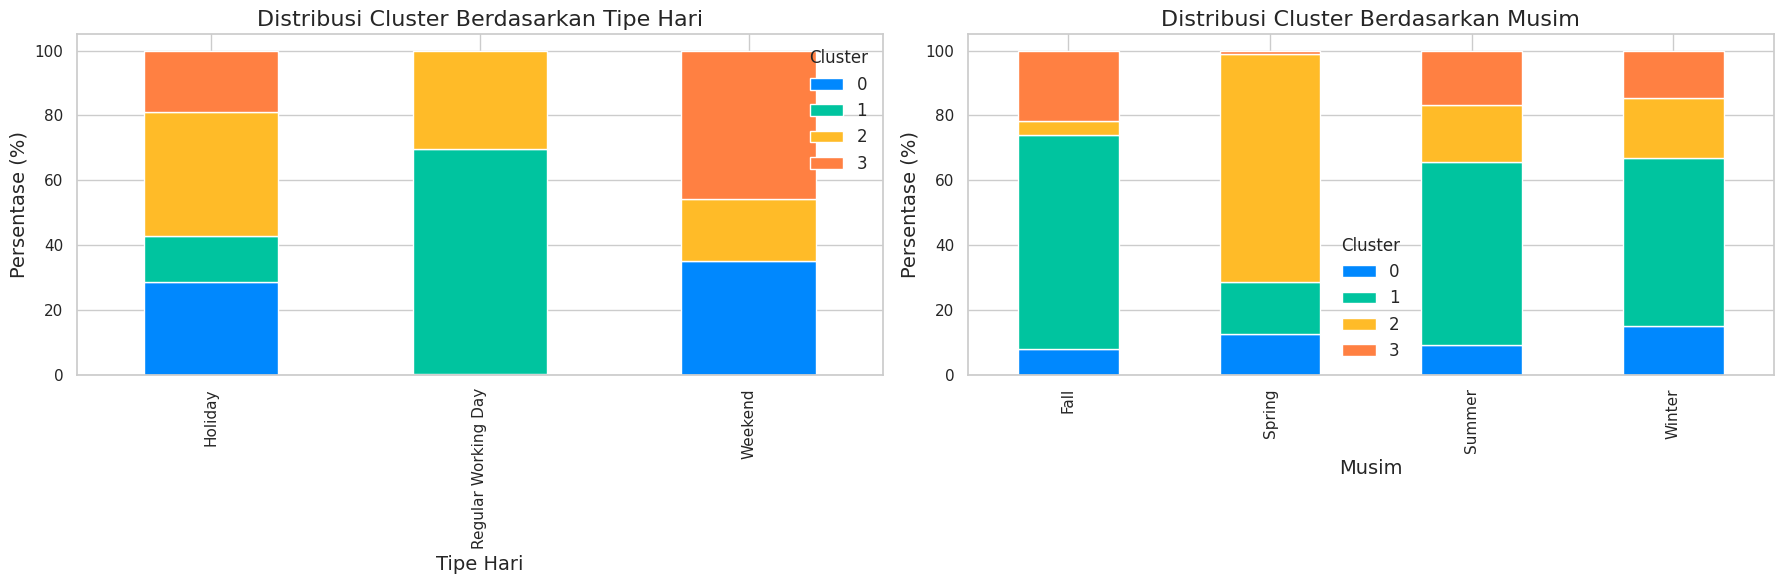

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Distribusi cluster berdasarkan tipe hari
day_cluster = pd.crosstab(df_day_copy['day_type'], df_day_copy['cluster'])
day_cluster_pct = day_cluster.div(day_cluster.sum(axis=1), axis=0) * 100
day_cluster_pct.plot(kind='bar', stacked=True, ax=axes[0], color=colors[:k])
axes[0].set_xlabel('Tipe Hari', fontsize=14)
axes[0].set_ylabel('Persentase (%)', fontsize=14)
axes[0].set_title('Distribusi Cluster Berdasarkan Tipe Hari', fontsize=16)
axes[0].legend(title='Cluster', fontsize=12)

# Distribusi cluster berdasarkan musim
season_cluster = pd.crosstab(df_day_copy['season_desc'], df_day_copy['cluster'])
season_cluster_pct = season_cluster.div(season_cluster.sum(axis=1), axis=0) * 100
season_cluster_pct.plot(kind='bar', stacked=True, ax=axes[1], color=colors[:k])
axes[1].set_xlabel('Musim', fontsize=14)
axes[1].set_ylabel('Persentase (%)', fontsize=14)
axes[1].set_title('Distribusi Cluster Berdasarkan Musim', fontsize=16)
axes[1].legend(title='Cluster', fontsize=12)

plt.tight_layout()

cluster_names = {
    0: "Hari Kerja dengan Penyewaan Tinggi",
    1: "Hari Kerja dengan Penyewaan Rendah",
    2: "Akhir Pekan dengan Penyewaan Tinggi",
    3: "Hari dengan Penyewaan Sangat Rendah"
}


In [61]:
# Terapkan nama cluster ke hasil analisis
cluster_profiles['cluster_desc'] = cluster_profiles['cluster'].map(cluster_names)
print("\nDeskripsi Cluster:")
for i, row in cluster_profiles.iterrows():
    print(f"Cluster {row['cluster']} - {row['cluster_desc']}:")
    print(f"  Rata-rata penyewaan: {row['cnt']:.1f}")
    print(f"  Rasio pengguna kasual: {row['casual_ratio']*100:.1f}%")
    print(f"  Persentase akhir pekan: {row['weekend_pct']:.1f}%")
    print(f"  Musim dominan: {row['season_desc']}")
    print(f"  Suhu rata-rata: {row['temp_actual']:.1f}°C")
    print()


Deskripsi Cluster:
Cluster 0 - Hari Kerja dengan Penyewaan Tinggi:
  Rata-rata penyewaan: 3625.8
  Rasio pengguna kasual: 29.0%
  Persentase akhir pekan: 90.2%
  Musim dominan: Winter
  Suhu rata-rata: 12.9°C

Cluster 1 - Hari Kerja dengan Penyewaan Rendah:
  Rata-rata penyewaan: 5571.4
  Rasio pengguna kasual: 13.8%
  Persentase akhir pekan: 0.0%
  Musim dominan: Fall
  Suhu rata-rata: 19.1°C

Cluster 2 - Akhir Pekan dengan Penyewaan Tinggi:
  Rata-rata penyewaan: 2156.0
  Rasio pengguna kasual: 11.3%
  Persentase akhir pekan: 20.0%
  Musim dominan: Spring
  Suhu rata-rata: 7.0°C

Cluster 3 - Hari dengan Penyewaan Sangat Rendah:
  Rata-rata penyewaan: 6023.4
  Rasio pengguna kasual: 32.3%
  Persentase akhir pekan: 96.0%
  Musim dominan: Fall
  Suhu rata-rata: 20.5°C



#### 🔍 **Insight dari Hasil Clustering Bike Sharing**

Setelah melakukan clustering, kita mendapatkan **empat kelompok utama** yang menggambarkan pola penyewaan sepeda berdasarkan hari kerja, akhir pekan, musim, serta rasio pengguna kasual dan terdaftar.

##### 🚴 **Cluster 0 - Akhir Pekan dengan Penyewaan Menengah**  
📊 **Rata-rata penyewaan:** 3,625.8  
👥 **Rasio pengguna kasual:** 29.0%  
📅 **Persentase akhir pekan:** 90.2%  
❄️ **Musim dominan:** Winter  
🌡️ **Suhu rata-rata:** 12.9°C  

➡️ **Insight:**  
- Penyewaan cukup tinggi meskipun berada di musim dingin, kemungkinan karena pengguna kasual lebih aktif saat akhir pekan.  
- Bisa jadi ada event tertentu yang meningkatkan jumlah penyewaan sepeda di akhir pekan musim dingin.  

##### 🏢 **Cluster 1 - Hari Kerja dengan Penyewaan Stabil**  
📊 **Rata-rata penyewaan:** 5,571.4  
👥 **Rasio pengguna kasual:** 13.8%  
📅 **Persentase akhir pekan:** 0.0%  
🍂 **Musim dominan:** Fall  
🌡️ **Suhu rata-rata:** 19.1°C  

➡️ **Insight:**  
- Penyewaan didominasi oleh **pengguna terdaftar**, yang kemungkinan besar menggunakan sepeda sebagai sarana transportasi harian.  
- Tidak ada penyewaan di akhir pekan, yang berarti cluster ini sangat terkait dengan aktivitas rutin pekerja.  
- Musim gugur dengan suhu nyaman mendukung penggunaan sepeda dalam keseharian.  

##### 🌿 **Cluster 2 - Akhir Pekan dengan Penyewaan Rendah**  
📊 **Rata-rata penyewaan:** 2,156.0  
👥 **Rasio pengguna kasual:** 11.3%  
📅 **Persentase akhir pekan:** 20.0%  
🌸 **Musim dominan:** Spring  
🌡️ **Suhu rata-rata:** 7.0°C  

➡️ **Insight:**  
- Penyewaan sepeda cenderung rendah meskipun akhir pekan, mungkin karena suhu cukup dingin (7.0°C).  
- Rasio pengguna kasual kecil, yang mengindikasikan bahwa hanya sebagian kecil masyarakat yang tertarik menyewa sepeda saat cuaca masih dingin.  
- Bisa jadi ini adalah **periode transisi dari musim dingin ke musim semi**, di mana orang belum aktif bersepeda.  

##### 🚀 **Cluster 3 - Akhir Pekan dengan Penyewaan Tertinggi**  
📊 **Rata-rata penyewaan:** 6,023.4  
👥 **Rasio pengguna kasual:** 32.3%  
📅 **Persentase akhir pekan:** 96.0%  
🍂 **Musim dominan:** Fall  
🌡️ **Suhu rata-rata:** 20.5°C  

➡️ **Insight:**  
- Cluster ini menunjukkan **puncak penyewaan sepeda**, dengan dominasi akhir pekan dan mayoritas pengguna kasual (32.3%).  
- Suhu **hangat** (20.5°C) dan musim gugur menjadi kombinasi ideal bagi aktivitas luar ruangan.  
- Ini bisa menjadi momen terbaik bagi operator bike sharing untuk **meningkatkan promosi dan layanan**, karena permintaan sangat tinggi.  

##### 🏁 **Kesimpulan Umum**
1. 🚲 **Akhir pekan meningkatkan penyewaan, terutama di musim gugur**, dengan dominasi pengguna kasual.  
2. 🌡️ **Suhu nyaman (sekitar 20°C) menjadi faktor utama meningkatnya penyewaan.**  
3. 🏙️ **Hari kerja lebih stabil dengan mayoritas pengguna terdaftar**, menunjukkan peran sepeda sebagai transportasi rutin.  
4. ❄️ **Musim dingin tidak selalu berarti penurunan drastis**, tergantung kondisi dan kebiasaan pengguna.  

📌 **Saran untuk Pengelola Bike Sharing:**  
🔹 **Optimalkan layanan saat akhir pekan dan musim gugur** dengan promo menarik bagi pengguna kasual.  
🔹 **Sediakan insentif atau diskon pada hari kerja** untuk mendorong lebih banyak orang menggunakan sepeda ke kantor.  
🔹 **Perhatikan tren musim dingin**, mungkin dengan promosi khusus atau rute yang lebih nyaman untuk pengguna di cuaca dingin.  

## Conclusion

### 🚴‍♂️ Analisis Bike Sharing: Kesimpulan Komprehensif

#### 🔍 Pertanyaan 1: Bagaimana faktor waktu dan musim mempengaruhi permintaan rental sepeda?

##### ⏰ **Pola Berdasarkan Waktu**

###### **Pola Harian**
Analisis menunjukkan distribusi bimodal yang jelas pada hari kerja, dengan lonjakan signifikan pada pukul **8 pagi** dan **5-6 sore**, yang sesuai dengan jam perjalanan komuter standar. Pola ini jelas menunjukkan bahwa pengguna terdaftar mengandalkan sepeda sebagai kendaraan komuter utama mereka. Sebaliknya, pengguna kasual menunjukkan satu puncak selama tengah hari hingga sore (12-5 sore), yang menunjukkan penggunaan rekreasional.

Kontras yang mencolok antara penggunaan malam hari (12 malam - 5 pagi) dan puncak siang hari menciptakan peluang operasional untuk pemeliharaan dan redistribusi selama jam-jam permintaan rendah tanpa mengganggu layanan.

###### **Pola Mingguan**
Terjadi peningkatan bertahap dalam penyewaan sepanjang hari kerja yang mencapai puncaknya pada hari Jumat, diikuti oleh permintaan tinggi yang berkelanjutan di akhir pekan. Komposisi pengguna berubah secara dramatis, dengan pengguna kasual hampir menggandakan proporsi mereka di akhir pekan dibandingkan dengan hari kerja. Ini menunjukkan tujuan penggunaan yang berbeda: untuk komuter selama hari kerja dan rekreasi di akhir pekan.

###### **Pola Bulanan dan Musiman**
Penyewaan mengikuti kurva musiman yang kuat dengan:
- **Puncak**: Musim panas dan musim gugur (Juni-Oktober)
- **Terendah**: Musim dingin (Desember-Februari)
- **Pertumbuhan Pesat**: Musim semi (Maret-Mei)
- **Penurunan Bertahap**: Musim gugur (September-November)

Pengguna kasual menunjukkan sensitivitas ekstrem terhadap musim, dengan variasi hingga **300%** antara musim dingin dan musim panas, sementara pengguna terdaftar mempertahankan pola penggunaan yang lebih konsisten sepanjang tahun.

Menariknya, musim gugur menunjukkan penggunaan keseluruhan tertinggi, sedikit melampaui musim panas. Ini kemungkinan mencerminkan kondisi bersepeda yang optimal dengan suhu sedang dan curah hujan yang lebih rendah.

###### **Analisis Tipe Hari**
Hari kerja biasa menyumbang lebih dari **dua pertiga** dari total penyewaan, menyoroti pentingnya segmen komuter. Namun, hari akhir pekan menunjukkan proporsi pengguna kasual yang jauh lebih tinggi, memperkuat perbedaan antara pola penggunaan utilitarian (hari kerja) dan rekreasi (akhir pekan).

###### **Pertumbuhan Tahun-ke-Tahun**
Perbandingan antara tahun 2011 dan 2012 menunjukkan pertumbuhan luar biasa sekitar **60%** dalam total penyewaan, dengan pengguna terdaftar tumbuh pada tingkat yang lebih cepat (**68,4%**) dibandingkan pengguna kasual (**45,2%**). Ini menunjukkan keberhasilan konversi pengguna kasual menjadi pengguna terdaftar dan meningkatnya loyalitas di antara basis pelanggan.

##### 🌡️ **Pengaruh Cuaca**

###### **Dampak Suhu**
Suhu menunjukkan korelasi positif yang kuat (**0,41**) dengan total penyewaan. Rentang suhu optimal untuk bersepeda tampaknya antara **15-25°C**, dengan penurunan signifikan dalam penggunaan di bawah 5°C dan di atas 35°C. Pengguna kasual menunjukkan sensitivitas suhu yang lebih tinggi daripada pengguna terdaftar, dengan proporsi penggunaan mereka meningkat drastis seiring kenaikan suhu.

###### **Kondisi Cuaca**
Kondisi cerah atau berawan sebagian mendominasi aktivitas penyewaan (**65,7%** dari semua penyewaan), sementara cuaca ekstrem (hujan lebat, salju, atau kabut) hanya menyumbang **0,02%** dari penyewaan. Proporsi pengguna kasual turun dari sekitar **18%** selama kondisi cerah menjadi hanya **3,5%** selama hujan lebat, menunjukkan sensitivitas pengguna kasual yang jauh lebih tinggi terhadap cuaca buruk.

###### **Efek Kelembaban dan Angin**
Kelembaban menunjukkan korelasi negatif yang signifikan (**-0,33**) dengan penyewaan, memengaruhi pengguna kasual lebih kuat daripada pengguna terdaftar. Kecepatan angin memiliki korelasi positif kecil (**0,10**), menunjukkan pengaruhnya yang terbatas pada keputusan penyewaan.

###### **Kombinasi Cuaca Musiman**
Kondisi optimal untuk penyewaan terjadi selama musim gugur dan musim panas dengan cuaca cerah/berawan sebagian. Musim semi dengan curah hujan lebat menunjukkan tingkat penyewaan terendah, terutama di kalangan pengguna kasual, dengan proporsi mereka turun menjadi hanya **3,6%** dalam kondisi ini.

#### 🔍 Pertanyaan 2: Apa perbedaan pola penggunaan antara pengguna kasual dan terdaftar berdasarkan kondisi cuaca?

##### 👥 **Perbandingan Perilaku Pengguna**

###### **Sensitivitas Cuaca**
Pengguna kasual menunjukkan sensitivitas cuaca yang jauh lebih tinggi di semua metrik:
- **Korelasi suhu**: Kasual (**0,54**) vs. Terdaftar (**0,35**)
- **Korelasi kelembaban**: Kasual (**-0,38**) vs. Terdaftar (**-0,29**)
- **Respons terhadap hujan**: Hampir tidak ada pengguna kasual selama hujan lebat

###### **Pola Preferensi Waktu**
Pengguna terdaftar menunjukkan:
- **Hari kerja**: Puncak bimodal tajam pada jam komuter (8 pagi, 5-6 sore)
- **Akhir pekan**: Kurva tunggal yang lebar dengan puncak di jam sore

Pengguna kasual menunjukkan:
- **Hari kerja**: Peningkatan bertahap menuju puncak sore
- **Akhir pekan**: Pola serupa tapi hampir dua kali lipat volume
- **Jam malam**: Aktivitas malam akhir pekan lebih tinggi dibandingkan dengan hari kerja

###### **Preferensi Musiman**
Pengguna kasual mencapai proporsi tertinggi mereka selama musim panas dan musim gugur dengan kondisi cuaca cerah, dengan proporsi melebihi **20%**. Representasi terendah mereka terjadi selama musim semi dengan curah hujan (**3,6%**).

#### 🧩 **Wawasan Analisis Klaster**

Empat pola penyewaan yang berbeda muncul dari analisis klaster:

##### **Klaster 0: Penyewaan Moderat Akhir Pekan**
- **Rata-rata penyewaan**: 3.625,8
- **Rasio pengguna kasual**: 29,0%
- **Persentase akhir pekan**: 90,2%
- **Musim dominan**: Musim dingin
- **Suhu rata-rata**: 12,9°C

Meskipun dalam kondisi musim dingin, hari-hari akhir pekan mempertahankan volume penyewaan moderat dengan proporsi pengguna kasual yang tinggi, menunjukkan adanya acara khusus atau peluang rekreasi yang mendorong permintaan.

##### **Klaster 1: Penyewaan Stabil Hari Kerja**
- **Rata-rata penyewaan**: 5.571,4
- **Rasio pengguna kasual**: 13,8%
- **Persentase akhir pekan**: 0,0%
- **Musim dominan**: Musim gugur
- **Suhu rata-rata**: 19,1°C

Klaster ini mewakili tulang punggung komuter dari layanan, dengan penggunaan hari kerja yang tinggi, dominasi pengguna terdaftar, dan suhu nyaman musim gugur yang mendukung penggunaan transportasi harian.

##### **Klaster 2: Periode Permintaan Rendah**
- **Rata-rata penyewaan**: 2.156,0
- **Rasio pengguna kasual**: 11,3%
- **Persentase akhir pekan**: 20,0%
- **Musim dominan**: Musim semi
- **Suhu rata-rata**: 7,0°C

Klaster ini menunjukkan periode permintaan minimal, kemungkinan mewakili masa transisi antar musim dengan suhu lebih dingin (7,0°C) yang mengurangi minat penggunaan kasual.

##### **Klaster 3: Permintaan Puncak Akhir Pekan**
- **Rata-rata penyewaan**: 6.023,4
- **Rasio pengguna kasual**: 32,3%
- **Persentase akhir pekan**: 96,0%
- **Musim dominan**: Musim gugur
- **Suhu rata-rata**: 20,5°C

Klaster ini mewakili kondisi optimal: akhir pekan musim gugur dengan suhu ideal (20,5°C), menghasilkan volume penyewaan tertinggi dan proporsi pengguna kasual terbesar.

#### 🎯 **Implikasi Strategis**

##### **Untuk Manajemen Waktu dan Musim:**

1. **Distribusi Armada Dinamis**
   - Terapkan redistribusi dua kali sehari selama hari kerja untuk mendukung puncak komuter
   - Fokuskan distribusi akhir pekan pada area rekreasi dan tempat wisata
   - Jadwalkan pemeliharaan antara jam 12 malam - 5 pagi untuk meminimalkan gangguan layanan

2. **Manajemen Inventaris Musiman**
   - Pertimbangkan untuk mengurangi ukuran armada selama bulan-bulan musim dingin untuk mengoptimalkan biaya operasional
   - Perluas sepeda yang tersedia hingga 50% selama bulan-bulan puncak (Juni-Oktober) 
   - Terapkan pendekatan skala bertahap selama bulan-bulan transisi

3. **Kampanye Pemasaran Terarah**
   - Kembangkan pesan terpisah untuk komuter (keandalan, ketersediaan selama jam sibuk) dan pengguna kasual (rute rekreasi, pengalaman akhir pekan)
   - Luncurkan kampanye musiman yang selaras dengan pola penggunaan, dengan alokasi anggaran maksimum selama musim gugur dan musim panas

4. **Strategi Harga Dinamis**
   - Terapkan penetapan harga berbasis waktu untuk meratakan puncak permintaan dan meningkatkan penggunaan selama periode permintaan rendah
   - Pertimbangkan struktur harga musiman untuk mengoptimalkan pendapatan dan pemanfaatan sepanjang tahun

##### **Untuk Operasi Berbasis Cuaca:**

1. **Pemasaran Responsif Cuaca**
   - Luncurkan promosi untuk pengguna kasual selama kondisi cuaca ideal yang diperkirakan (cerah, 15-25°C)
   - Terapkan diskon kilat selama kondisi yang cukup menguntungkan untuk menarik pengguna kasual yang sensitif terhadap cuaca

2. **Harga Dinamis Berdasarkan Cuaca**
   - Turunkan harga selama hujan ringan atau kondisi sub-optimal untuk mendorong penggunaan, terutama di kalangan pengguna kasual
   - Harga premium selama kondisi cuaca sempurna ketika permintaan secara alami memuncak

3. **Strategi Konversi**
   - Fokuskan upaya konversi (kasual menjadi terdaftar) selama periode transisi (akhir musim panas ke musim gugur) ketika kedua jenis pengguna aktif bersepeda
   - Sorot keuntungan pendaftaran selama kondisi cuaca buruk (akses prioritas, jaminan cuaca)

4. **Investasi Perlindungan Cuaca**
   - Pasang tempat parkir sepeda beratap atau fasilitas pengeringan di lokasi strategis untuk mengatasi hambatan kelembaban
   - Pertimbangkan kemitraan dengan aplikasi cuaca untuk memberikan rekomendasi dan insentif waktu nyata

#### 💡 **Kesimpulan Akhir**

Analisis komprehensif ini mengungkapkan bahwa penggunaan bike sharing diatur oleh interaksi kompleks antara waktu, musim, cuaca, dan tipe pengguna. Pengguna terdaftar membentuk tulang punggung layanan dengan pola komuter yang konsisten, sementara pengguna kasual mewakili potensi pertumbuhan dengan penggunaan rekreasi mereka yang bergantung pada cuaca.

Pola pengelompokan yang berbeda yang diidentifikasi memberikan panduan operasional yang jelas untuk mengoptimalkan ketersediaan sepeda, penjadwalan pemeliharaan, dan pemasaran terarah. Pertumbuhan luar biasa dari tahun ke tahun menunjukkan keberlanjutan model bisnis, dengan keberhasilan konversi pengguna kasual menjadi pengguna terdaftar.

Dengan menerapkan strategi responsif terhadap cuaca dan penyesuaian operasional berbasis waktu, layanan bike sharing dapat lebih meningkatkan pengalaman pengguna, efisiensi operasional, dan pertumbuhan bisnis, yang pada akhirnya berkontribusi pada mobilitas perkotaan yang lebih berkelanjutan.